In [1]:
# all useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python
import re # regular expression
import string # for finding punctuation in text
import nltk # preprocessing text
from collections import Counter 
from textblob import TextBlob

In [2]:
#Import dataset from previously obtained CSV file
restaurants_reviews = pd.read_csv("yelp_2010_2012.csv",index_col=0)
restaurants_reviews.head()

review_body        Date  \
0  Unlike Next, which we'd eaten at the previous ...  2012-09-22   
1  Probably one of the best meals I've had ever. ...  2012-09-22   
2  Service was impeccable. Experience and present...  2012-09-19   
3  The problem with places like this, given the e...  2012-09-06   
4  I have no idea how to write my review - dining...  2012-09-09   

                review ID             reviewer ID              product ID  \
0  GtwU21YOQn-wf4vWRUIx6w  bNYesZ944s6IJVowOnB0iA  pbEiXam9YJL3neCYHGwLUA   
1                 0LpVTc3  TRKxLC3y-ZvP45e5iilMtw  pbEiXam9YJL3neCYHGwLUA   
2           tljtLzf68Fkwf  0EMm8umAqXZzyhxNpL4M9g  pbEiXam9YJL3neCYHGwLUA   
3                     iSN  DlwexC7z88ymAzu45skODw  pbEiXam9YJL3neCYHGwLUA   
4                  Jmwrh7  kW2dk1CWihmh3g7k9N2G8A  pbEiXam9YJL3neCYHGwLUA   

   useful  funny  cool  star_rating  Year  Month  Day  
0       0      0     0            5  2012      9   22  
1       0      0     0            5  2012      9   22  
2       0      0     2            3  2012      9   19  
3       3      0     8            3  2012      9    6  
4       0      2     1            5  2012      9    9

In [3]:
#Shape of the dataset
restaurants_reviews.shape

(40491, 12)

## 2. Cleaning the data

In [4]:
restaurants_reviews.dtypes

review_body    object
Date           object
review ID      object
reviewer ID    object
product ID     object
useful          int64
funny           int64
cool            int64
star_rating     int64
Year            int64
Month           int64
Day             int64
dtype: object

In [5]:
# We check for null values in columns
restaurants_reviews.columns[restaurants_reviews.isnull().any()].tolist()

[]

In [6]:
# We check for empty strings
restaurants_reviews.columns[(restaurants_reviews=='').any()].tolist()

/anaconda3/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


[]

## 3. Understanding what's in the data

### a. Distributions

In [7]:
# number of restaurants
print('we are dealing with', restaurants_reviews.groupby('product ID').count().shape[0], 'restaurants.')

we are dealing with 127 restaurants.


In [8]:
# We add a new column to get the distribution of reviews over the years
restaurants_reviews['year_of_review'] = restaurants_reviews.Date.map(lambda x : int(x[:4]))

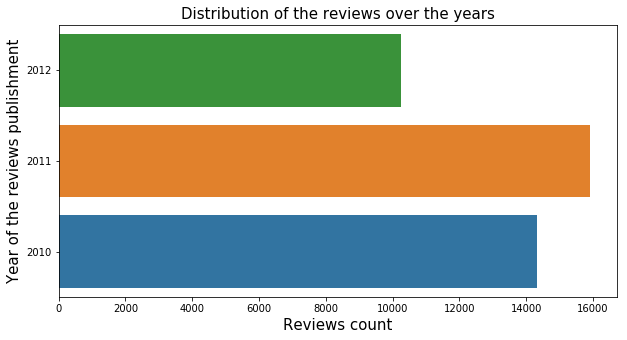

In [9]:
# Plotting the distribution of the reviews over the years
plt.figure(figsize=(10, 5))
p = sns.countplot(data = restaurants_reviews, y = 'year_of_review', orient="h").invert_yaxis()
plt.title("Distribution of the reviews over the years",fontsize=15)
plt.xlabel('Reviews count',fontsize=15)
plt.ylabel('Year of the reviews publishment',fontsize=15);

### b. Business with most Five Star Reviews 

In [10]:
# We analyse ratings of reviews by getting the restaurants with most Five Star rating scores. 
ratings = restaurants_reviews[restaurants_reviews.star_rating == 5].groupby(['product ID', 'star_rating']).agg('size').to_frame('count').reset_index().sort_values(by='count', ascending=False)
ratings[:20]

product ID  star_rating  count
38   HOJqzz1WvOmeR9oESJ4d9A            5    812
70   boE4Ahsssqic7o5wQLI04w            5    512
83   jGiKIJCVLZHXQDSNnSLPsw            5    505
98   pbEiXam9YJL3neCYHGwLUA            5    447
86   m5_GCJP2W4zEJnyVgxa3eA            5    425
44   LMaoM2Ue2BR_HI9ba3JsZg            5    367
93   o54U2VkQama8FI30qDkWvw            5    367
31   DXwSYgiXqIVNdO9dazel6w            5    351
59   WBU0yq9J8qiYQfI_fh2P1Q            5    344
21   8d_DiHWB-pjBVW3a7D8EWg            5    341
95   oEFJ29zAQaCNnQzebHQvpg            5    303
64   Z2nOMPedr7XYhgYhILJjEA            5    303
40   IvdOI86_CSCRFpid2atnyA            5    291
52   OKOfoisduqP24uK3WYvx7Q            5    262
25   AqgG-1aD6JYj9D6OmBWO3w            5    257
13   43rd1LKcZRIunySzbMsyLQ            5    249
35   F7IQngaDDBgYvhA3U31q-g            5    237
107  sR4EOfPuI-at41uIxIZPhw            5    232
105  sDYjKyI_67eUhFAqVneYjA            5    219
76   euO3-H92LCivH2B0CQPlnw            5    215

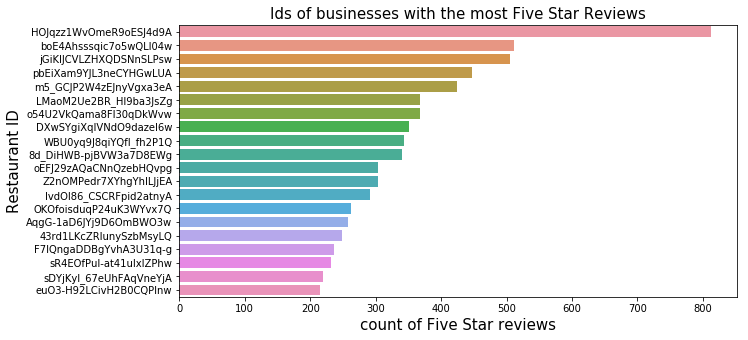

In [11]:
plt.figure(figsize=(10, 5))
#p = sns.barplot(x ='alias', y = 'count', data = ratings[:10], orient="h").invert_yaxis();
p = sns.barplot(data = ratings[:20], x='count', y = 'product ID', orient="h")
plt.title("Ids of businesses with the most Five Star Reviews",fontsize=15)
plt.xlabel('count of Five Star reviews',fontsize=15)
plt.ylabel('Restaurant ID',fontsize=15);

### c. Useful, funny and cool reviews

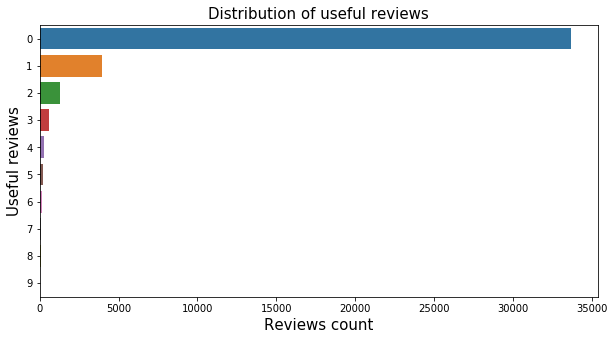

In [12]:
# Plotting the distribution of useful reviews and count
plt.figure(figsize=(10, 5))
sns.countplot(data = restaurants_reviews, y = 'useful', orient="h",order=pd.value_counts(restaurants_reviews['useful']).iloc[:10].index)
plt.title("Distribution of useful reviews",fontsize=15)
plt.xlabel('Reviews count',fontsize=15)
plt.ylabel('Useful reviews',fontsize=15);

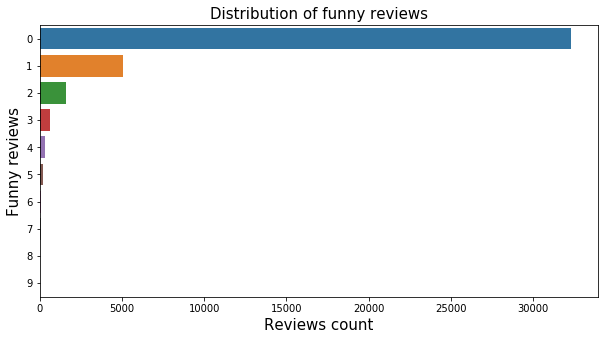

In [13]:
# Plotting the distribution of funny reviews and count
plt.figure(figsize=(10, 5))
sns.countplot(data = restaurants_reviews, y = 'funny', orient="h",order=pd.value_counts(restaurants_reviews['funny']).iloc[:10].index)
plt.title("Distribution of funny reviews",fontsize=15)
plt.xlabel('Reviews count',fontsize=15)
plt.ylabel('Funny reviews',fontsize=15);

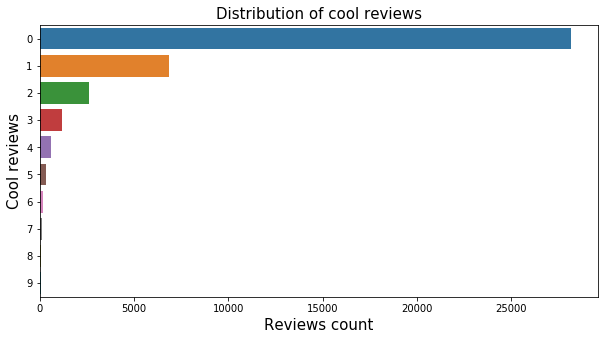

In [14]:
# Plotting the distribution of cool reviews and count
plt.figure(figsize=(10, 5))
sns.countplot(data = restaurants_reviews, y = 'cool', orient="h",order=pd.value_counts(restaurants_reviews['cool']).iloc[:10].index)
plt.title("Distribution of cool reviews",fontsize=15)
plt.xlabel('Reviews count',fontsize=15)
plt.ylabel('Cool reviews',fontsize=15);

In [15]:
l = [restaurants_reviews.funny.sum(), restaurants_reviews.useful.sum(), restaurants_reviews.cool.sum()]

In [16]:
restaurants_reviews.funny.sum()

16284

In [17]:
restaurants_reviews.useful.sum()

15370

In [18]:
restaurants_reviews.cool.sum()

26942

In [19]:
df = pd.DataFrame(dict(x=['useful','funny','cool'], y=l))

<Figure size 720x360 with 0 Axes>

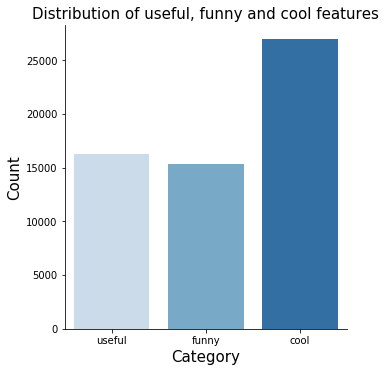

In [20]:
plt.figure(figsize=(10, 5))
sns.catplot("x","y", data=df,kind="bar",palette="Blues")
plt.title("Distribution of useful, funny and cool features",fontsize=15)
plt.xlabel('Category',fontsize=15)
plt.ylabel('Count',fontsize=15);

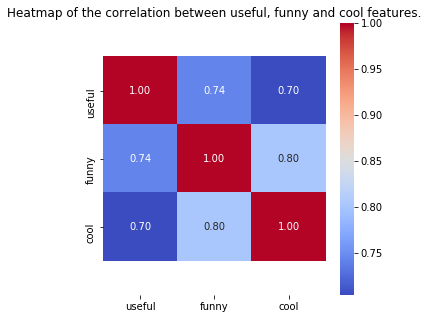

In [21]:
# Plotting the heatmap.
plt.figure(figsize=(5,5))
ax = sns.heatmap(restaurants_reviews[['useful','funny','cool']].corr(), annot=True, fmt=".2f", cmap = "coolwarm")

# This is a small fix to have the heatmap not be cropped on the top and bottom parts.
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Heatmap of the correlation between useful, funny and cool features.')

ax;

In [22]:
restaurants_reviews.head()

review_body        Date  \
0  Unlike Next, which we'd eaten at the previous ...  2012-09-22   
1  Probably one of the best meals I've had ever. ...  2012-09-22   
2  Service was impeccable. Experience and present...  2012-09-19   
3  The problem with places like this, given the e...  2012-09-06   
4  I have no idea how to write my review - dining...  2012-09-09   

                review ID             reviewer ID              product ID  \
0  GtwU21YOQn-wf4vWRUIx6w  bNYesZ944s6IJVowOnB0iA  pbEiXam9YJL3neCYHGwLUA   
1                 0LpVTc3  TRKxLC3y-ZvP45e5iilMtw  pbEiXam9YJL3neCYHGwLUA   
2           tljtLzf68Fkwf  0EMm8umAqXZzyhxNpL4M9g  pbEiXam9YJL3neCYHGwLUA   
3                     iSN  DlwexC7z88ymAzu45skODw  pbEiXam9YJL3neCYHGwLUA   
4                  Jmwrh7  kW2dk1CWihmh3g7k9N2G8A  pbEiXam9YJL3neCYHGwLUA   

   useful  funny  cool  star_rating  Year  Month  Day  year_of_review  
0       0      0     0            5  2012      9   22            2012  
1       0      0     0            5  2012      9   22            2012  
2       0      0     2            3  2012      9   19            2012  
3       3      0     8            3  2012      9    6            2012  
4       0      2     1            5  2012      9    9            2012

## 4. Enriching, filtering, transforming the data according to your needs.

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a. Enriching the data

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b. Transforming the text in reviews to remove noise

In [23]:
# Introduce a preprocessing function to get rid of stopwords in the description of reviews
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again

In [24]:
#Constructing a list of stopwords

#download all stopwords from the nltk library
nltk.download('stopwords')

#get a list of all english stopwords
i = nltk.corpus.stopwords.words('english')

#get a list of all punctuations
j = list(string.punctuation)

stopwords = set(i).union(j)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aymenayadi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# filter the column description according to the stopwords 
restaurants_reviews["review_body_filtered"]= restaurants_reviews.apply(lambda row : preprocess(row["review_body"]) , axis = 1)
restaurants_reviews

review_body        Date  \
0      Unlike Next, which we'd eaten at the previous ...  2012-09-22   
1      Probably one of the best meals I've had ever. ...  2012-09-22   
2      Service was impeccable. Experience and present...  2012-09-19   
3      The problem with places like this, given the e...  2012-09-06   
4      I have no idea how to write my review - dining...  2012-09-09   
...                                                  ...         ...   
61535  If you want seafood this is place to go. It is...  2011-10-08   
61536  I've passed this place a bunch of times on my ...  2012-04-07   
61538  This place is amazing. The food is great and y...  2012-05-06   
61539  OK went back the next day as I was driving by ...  2011-01-08   
61540  Delicious, rather authentic Mexican food, must...  2010-01-25   

                    review ID             reviewer ID              product ID  \
0      GtwU21YOQn-wf4vWRUIx6w  bNYesZ944s6IJVowOnB0iA  pbEiXam9YJL3neCYHGwLUA   
1                     0LpVTc3  TRKxLC3y-ZvP45e5iilMtw  pbEiXam9YJL3neCYHGwLUA   
2               tljtLzf68Fkwf  0EMm8umAqXZzyhxNpL4M9g  pbEiXam9YJL3neCYHGwLUA   
3                         iSN  DlwexC7z88ymAzu45skODw  pbEiXam9YJL3neCYHGwLUA   
4                      Jmwrh7  kW2dk1CWihmh3g7k9N2G8A  pbEiXam9YJL3neCYHGwLUA   
...                       ...                     ...                     ...   
61535           BOxgSHru1VycS  kHIFPG3NLehDo-6uRUjWYA  _KI0Y2UO68kJuTFUKucaXQ   
61536           I6pazvTPUqRtU  fUXNHG4x1AN9oPpBSpCtUw  _KI0Y2UO68kJuTFUKucaXQ   
61538                 hLwn6zw  OXRKydSyzC35n2fNUnbopg  XvP-kanjF6SpchosRk0N5g   
61539              KEkOzeO9YJ  NE8ULc362aFvnkTDgvZbcA  XvP-kanjF6SpchosRk0N5g   
61540     xYkvLLWMyyYO3JEX68H  VaPi2-eXcgIpRF_LGSJ_cA  XvP-kanjF6SpchosRk0N5g   

       useful  funny  cool  star_rating  Year  Month  Day  year_of_review  \
0           0      0     0            5  2012      9   22            2012   
1           0      0     0            5  2012      9   22            2012   
2           0      0     2            3  2012      9   19            2012   
3           3      0     8            3  2012      9    6            2012   
4           0      2     1            5  2012      9    9            2012   
...       ...    ...   ...          ...   ...    ...  ...             ...   
61535       0      0     1            5  2011     10    8            2011   
61536       1      0     0            5  2012      4    7            2012   
61538       0      0     0            5  2012      5    6            2012   
61539       0      1     2            2  2011      1    8            2011   
61540       0      0     0            5  2010      1   25            2010   

                                    review_body_filtered  
0      unlike next wed eaten previous night dish comp...  
1      probably one best meals ive ever performance f...  
2      service impeccable experience presentation coo...  
3      problem places like given exhorbitant cost med...  
4      idea write review dining alinea brings whole d...  
...                                                  ...  
61535  want seafood place go warehouse man help nice ...  
61536  ive passed place bunch times way olympic north...  
61538  place amazing food great cannot beat price unf...  
61539  ok went back next day driving lunchtime steak ...  
61540  delicious rather authentic mexican food must t...  

[40491 rows x 14 columns]

## 4. Deep dive analysis of top Five Stars rated businesses 

### HOJqzz1WvOmeR9oESJ4d9A

In [26]:
# Get all the reviews of BBQ Supply CO restaurant
restau1 = restaurants_reviews[restaurants_reviews['product ID'] == 'HOJqzz1WvOmeR9oESJ4d9A']
restau1.head()

review_body        Date  \
751  UMMMMMM YEAAAAAAAAAAAAA this is the best joint...  2012-09-21   
752  I'm not sure what to say that hasn't been said...  2012-09-20   
753  A unique experience.... Went here recently aft...  2012-09-20   
754  First of all, just make peace with the fact th...  2012-09-14   
755  Ok, so I am going to state up front that I am ...  2012-09-01   

                  review ID             reviewer ID              product ID  \
751  R7rUKkrkO6O-ymK5Svtc-w  rGeb9gC4FDtUqFt5PfKbeg  HOJqzz1WvOmeR9oESJ4d9A   
752  uacV8gZEFuuquXlaWr5qxw  9JUezU-3ytiyBSUnWZvR0g  HOJqzz1WvOmeR9oESJ4d9A   
753  866BauokCfO3I7bGwBgsHQ  9Zu4BPDntg_52YmNwViyOA  HOJqzz1WvOmeR9oESJ4d9A   
754                      8Z  Fni24umaCsmdjYPEsB_W1Q  HOJqzz1WvOmeR9oESJ4d9A   
755  v7MYqQhoFrSoeHGUNUd1iA  1krzsfsDAyAd9CGGBOhvFw  HOJqzz1WvOmeR9oESJ4d9A   

     useful  funny  cool  star_rating  Year  Month  Day  year_of_review  \
751       0      2     0            5  2012      9   21            2012   
752       0      0     1            5  2012      9   20            2012   
753       0      0     1            4  2012      9   20            2012   
754       0      0     2            5  2012      9   14            2012   
755       2      2     2            5  2012      9    1            2012   

                                  review_body_filtered  
751  ummmmmm yeaaaaaaaaaaaaa best joint earth hot d...  
752  im sure say hasnt said expect wait expect get ...  
753  unique experience went recently reading yelp f...  
754  first make peace fact youre going standing lin...  
755  ok going state front hot dog fan tough time pa...

### Word Cloud of most Five Stars rated restaurant

We make a word cloud of this restaurant reviews to have an idea about most used words over the reviews

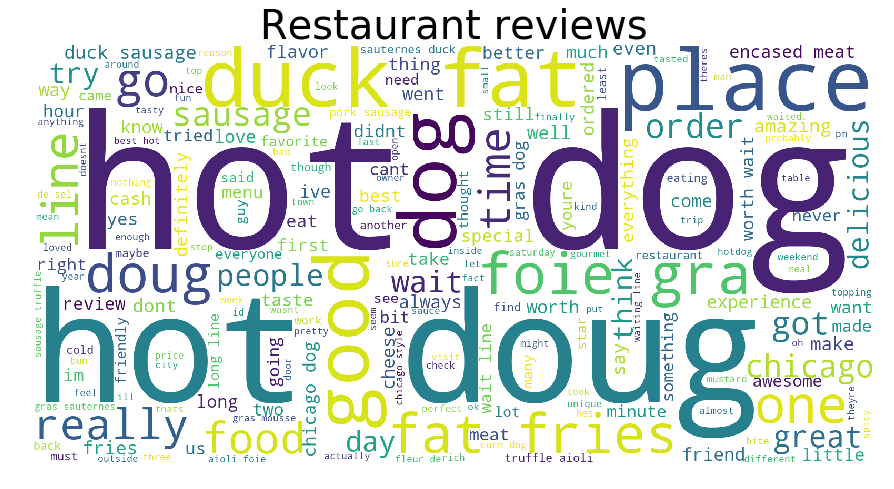

In [27]:
wc = WordCloud(background_color="white",width=1600, height=800, random_state=1, max_words=200)
# Join all strings together from the filtered description column to obtain all review text for the restaurant
wc.generate(' '.join(restau1['review_body_filtered']))


plt.figure(figsize=(15,10))
# Add title to figure
plt.title("Restaurant reviews", fontsize=40)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=10)

In [28]:
# We get the 20 most occuring words over the reviews. 

# Pass the split_it list to instance of Counter class. 
splitted = restau1['review_body_filtered'].apply(lambda x: x.split()).to_list()
flatten = [item for sublist in splitted for item in sublist]
counter = Counter(flatten) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = counter.most_common(20) 
most_occur

[('hot', 2104),
 ('dog', 1528),
 ('fries', 1127),
 ('line', 1078),
 ('duck', 1052),
 ('sausage', 1009),
 ('dougs', 953),
 ('dogs', 882),
 ('wait', 864),
 ('place', 791),
 ('good', 783),
 ('chicago', 729),
 ('fat', 697),
 ('get', 674),
 ('gras', 629),
 ('foie', 606),
 ('doug', 589),
 ('go', 550),
 ('one', 546),
 ('worth', 535)]

In [29]:
#Now we add a column which has the sentiment values of the each review posted for BBQ Supply Co, to see how the 
#author of this review feels about the restaurant.

#Create Text Blob Object and draw out the sentiment of each review by returning a value between -1.0 (extreme negative) 
#and 1.0 (extreme positive).
restau1['sentiment_analysis'] = restau1['review_body_filtered'].apply(lambda x: TextBlob(x).sentiment.polarity)
restau1 = restau1.sort_values(by='sentiment_analysis', ascending=False)
restau1[:10]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


review_body        Date  \
53414  awesome food. hits the spot whenever i have a ...  2010-12-18   
53296       perfect everytime. doug will you marry me?\n  2012-05-17   
2125                  Best food baby maker in Chicago.\n  2010-11-22   
2221   What can I say that hasn't been said already? ...  2010-11-14   
53576  BEST SAUSAGES in town! I recommend you go here...  2010-01-28   
53327  anyone who doesnt give this place 5 stars must...  2011-11-08   
53548  Why bother even writing a review. It's all bee...  2010-03-22   
53565             Best dogs in the city! Great service\n  2010-02-10   
53525                good dogs! THE fries are the best\n  2010-05-27   
2012                       delicious and a good price!\n  2012-06-12   

                    review ID             reviewer ID              product ID  \
53414  Z7oH42ttzgP5JKcmAVsrIg  x7wIQTZJ13kyvTMGXCZIFg  HOJqzz1WvOmeR9oESJ4d9A   
53296  WWnS0Otqb4x-adkoY8J6mQ  hsgzMownXatnpH8KZbwl_A  HOJqzz1WvOmeR9oESJ4d9A   
2125   WRVHNk74erdgi8AlBlSbTg  qHniQVr0ej3vYZZY-7_JnQ  HOJqzz1WvOmeR9oESJ4d9A   
2221   vJm9zALoSJeOiNDQa4xowQ  G1BBiiot4W5Wa7xdEXEpFg  HOJqzz1WvOmeR9oESJ4d9A   
53576  ohvqe_fydEAkZXUCJpex9w  AQqPycLRwSdSwhRtGCPUBw  HOJqzz1WvOmeR9oESJ4d9A   
53327  jrc6k_TLVIhdIRT74p5-2w  veeqDsGCsQ8nmMTib50I_A  HOJqzz1WvOmeR9oESJ4d9A   
53548  axjPYtR431-lP766WSkmyw  xARYlm1px6NzIrrkkwQV6g  HOJqzz1WvOmeR9oESJ4d9A   
53565  gwXd0IqG8HnXzGS4CgH_Rw  L-XTWkepNmyg2aLODzZAig  HOJqzz1WvOmeR9oESJ4d9A   
53525  oUW9TyYubj_O79461ZQM6A  nWqNypEUD2p9H0FyzbNg2w  HOJqzz1WvOmeR9oESJ4d9A   
2012   JWI61FgQqiGfZ1Z2Iz2fWA  ofZzcj1oiHS64f7jbGCXxQ  HOJqzz1WvOmeR9oESJ4d9A   

       useful  funny  cool  star_rating  Year  Month  Day  year_of_review  \
53414       0      0     0            5  2010     12   18            2010   
53296       0      0     0            5  2012      5   17            2012   
2125        2      1     0            5  2010     11   22            2010   
2221        0      1     0            5  2010     11   14            2010   
53576       0      0     0            5  2010      1   28            2010   
53327       0      0     0            5  2011     11    8            2011   
53548       0      0     0            5  2010      3   22            2010   
53565       0      0     0            5  2010      2   10            2010   
53525       0      0     0            4  2010      5   27            2010   
2012        0      0     0            5  2012      6   12            2012   

                                    review_body_filtered  sentiment_analysis  
53414            awesome food hits spot whenever craving                1.00  
53296                       perfect everytime doug marry                1.00  
2125                        best food baby maker chicago                1.00  
2221                   say hasnt said already place best                1.00  
53576             best sausages town recommend go expire                1.00  
53327  anyone doesnt give place stars must developmen...                1.00  
53548  bother even writing review said delicious inve...                1.00  
53565                       best dogs city great service                0.90  
53525                               good dogs fries best                0.85  
2012                                delicious good price                0.85

In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

#import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [31]:
# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in restau1['review_body_filtered']]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aymenayadi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

[('awesome', 'food'),
 ('food', 'hits'),
 ('hits', 'spot'),
 ('spot', 'whenever'),
 ('whenever', 'craving')]

In [33]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('hot', 'dougs'), 839),
 (('duck', 'fat'), 673),
 (('hot', 'dog'), 664),
 (('foie', 'gras'), 567),
 (('fat', 'fries'), 566),
 (('hot', 'dogs'), 443),
 (('duck', 'sausage'), 241),
 (('chicago', 'dog'), 150),
 (('worth', 'wait'), 136),
 (('wait', 'line'), 118),
 (('gras', 'dog'), 117),
 (('encased', 'meats'), 100),
 (('pork', 'sausage'), 97),
 (('truffle', 'aioli'), 96),
 (('sauternes', 'duck'), 94),
 (('gras', 'sauternes'), 93),
 (('best', 'hot'), 84),
 (('gras', 'mousse'), 80),
 (('long', 'line'), 78),
 (('encased', 'meat'), 77)]

In [34]:
bigram_df = pd.DataFrame(bigram_counts.most_common(10),
                             columns=['bigram', 'count'])

bigram_df

bigram  count
0     (hot, dougs)    839
1      (duck, fat)    673
2       (hot, dog)    664
3     (foie, gras)    567
4     (fat, fries)    566
5      (hot, dogs)    443
6  (duck, sausage)    241
7   (chicago, dog)    150
8    (worth, wait)    136
9     (wait, line)    118

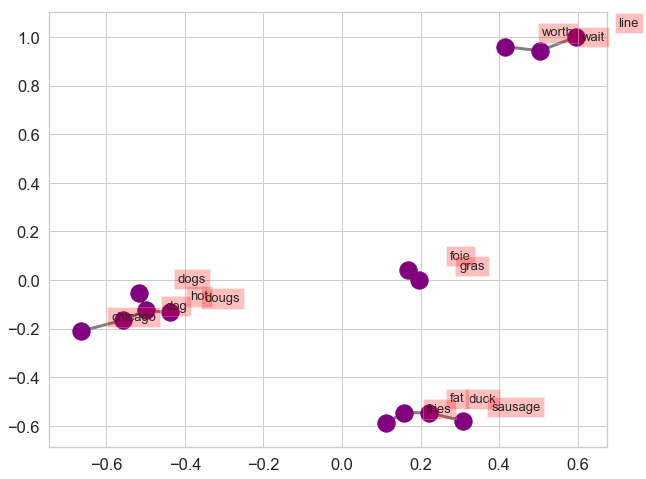

In [35]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

### boE4Ahsssqic7o5wQLI04w

In [36]:
# Get all the reviews of BBQ Supply CO restaurant
restau2 = restaurants_reviews[restaurants_reviews['product ID'] == 'boE4Ahsssqic7o5wQLI04w']
restau2.head()

review_body        Date  \
4564  I never get tired of going here. It's definite...  2012-09-20   
4565  It was our first time here and the waitstaff w...  2012-09-21   
4566  Service: 5; even though the place was packed, ...  2012-09-18   
4567  Came here for lunch and was pleasantly surpris...  2012-09-13   
4568  I work blocks away and had been wanting to try...  2012-09-14   

                   review ID             reviewer ID              product ID  \
4564  qXniFNnJx5Lfy3UMpXQUUg  JCVqRDQHeSJl0xoevLr1DA  boE4Ahsssqic7o5wQLI04w   
4565  dhYBYfwEJ7YhwFI6zEX0PA  KBLnWYCJd-DHMRJlwr21Ow  boE4Ahsssqic7o5wQLI04w   
4566                stL8VJz9  -3sHuoGtaorjqhZHDSb9eg  boE4Ahsssqic7o5wQLI04w   
4567  I5CTK5MFiomFS4bwLNHXjg  94cmXyxj9-TrtdlL3idleQ  boE4Ahsssqic7o5wQLI04w   
4568     o33aih17iZP1iJtjHdn  Sg_BvnTHsbc1AABiJjaiPA  boE4Ahsssqic7o5wQLI04w   

      useful  funny  cool  star_rating  Year  Month  Day  year_of_review  \
4564       0      0     0            5  2012      9   20            2012   
4565       0      0     0            3  2012      9   21            2012   
4566       0      0     0            5  2012      9   18            2012   
4567       2      3     3            4  2012      9   13            2012   
4568       0      0     0            4  2012      9   14            2012   

                                   review_body_filtered  
4564  never get tired going definitely top favorite ...  
4565  first time waitstaff helpful bit helpful top f...  
4566  service even though place packed well taken ca...  
4567  came lunch pleasantly surprised find line seat...  
4568  work blocks away wanting trying place months w...

### Word Cloud of most Five Stars rated restaurant

We make a word cloud of this restaurant reviews to have an idea about most used words over the reviews

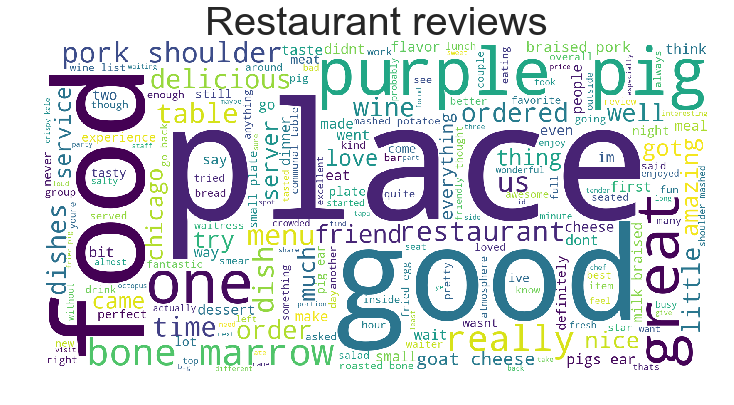

In [37]:
wc = WordCloud(background_color="white",width=1600, height=800, random_state=1, max_words=200)
# Join all strings together from the filtered description column to obtain all review text for the restaurant
wc.generate(' '.join(restau2['review_body_filtered']))

plt.figure(figsize=(15,10))
# Add title to figure
plt.title("Restaurant reviews", fontsize=40)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=10)

In [38]:
# We get the 20 most occuring words over the reviews. 

# Pass the split_it list to instance of Counter class. 
splitted = restau2['review_body_filtered'].apply(lambda x: x.split()).to_list()
flatten = [item for sublist in splitted for item in sublist]
counter = Counter(flatten) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = counter.most_common(20) 
most_occur

[('good', 1074),
 ('pig', 1057),
 ('food', 1040),
 ('pork', 983),
 ('place', 982),
 ('great', 894),
 ('wine', 894),
 ('like', 774),
 ('fried', 690),
 ('purple', 673),
 ('cheese', 660),
 ('bone', 626),
 ('one', 625),
 ('really', 603),
 ('marrow', 599),
 ('wait', 592),
 ('us', 584),
 ('would', 571),
 ('go', 520),
 ('menu', 512)]

In [39]:
#Now we add a column which has the sentiment values of the each review posted for BBQ Supply Co, to see how the 
#author of this review feels about the restaurant.

#Create Text Blob Object and draw out the sentiment of each review by returning a value between -1.0 (extreme negative) 
#and 1.0 (extreme positive).
restau2['sentiment_analysis'] = restau2['review_body_filtered'].apply(lambda x: TextBlob(x).sentiment.polarity)
restau2 = restau2.sort_values(by='sentiment_analysis', ascending=False)
restau2[:10]

review_body        Date  \
5630                                 Simply wonderful\n  2011-10-29   
5499                   2nd time here, simply awesome!\n  2011-05-26   
4824  If you like cheese, try the board of 3 for $19...  2012-06-18   
5329  Best roasted bone marrow since Paris; our othe...  2011-11-06   
5435  Delicious Food, Excellent service, Great ambia...  2011-10-05   
5566  Awesome!!! Everything was great. Bone marrow, ...  2011-02-07   
4807  1st time patron and I was delighted! Roasted B...  2012-06-13   
5521  Loved it!! Espesh the milk braised pork should...  2011-02-27   
5546  YUM....delicious Barcelona-style tapas, and an...  2011-04-03   
4949  PHENOMENAL. Just go. You'll be happy you did. ...  2011-10-09   

                   review ID             reviewer ID              product ID  \
5630  I91z9xKfv0pz3vQj1kN47Q  qG4R3VVM8RkmEaQQVEEVJg  boE4Ahsssqic7o5wQLI04w   
5499  UEyxFR006gnRQuV1b1GclA  s6Co7kYTZCrJQPuuX8enBA  boE4Ahsssqic7o5wQLI04w   
4824               3Tygj6xf8  WTWE5o5InWA_5-v66EfqoQ  boE4Ahsssqic7o5wQLI04w   
5329                     qQY  f3jPNolsqQwHlSGWWaR_zg  boE4Ahsssqic7o5wQLI04w   
5435  Y2O8p7eIsk8YJrzyKUeX3g  xJ0LlAH62RtS9dGc_W2GMg  boE4Ahsssqic7o5wQLI04w   
5566  no8ryNCDQ4FmpWAY-BCQgA  RIVQo_fQvm6EyOJLKwEHeg  boE4Ahsssqic7o5wQLI04w   
4807  wVuIkUscISqgOCcGzFSPHA  eMR-Qu24heVVzFkUtnrXzQ  boE4Ahsssqic7o5wQLI04w   
5521  wDZEDMqADuugsWpKH6DIXQ  pu_Aw_LpqAgUyaZkiY8HyA  boE4Ahsssqic7o5wQLI04w   
5546                     1MO  UvnkH6DyYFAPxwbT4RwzRQ  boE4Ahsssqic7o5wQLI04w   
4949  4zHj14J75rPCXRtYhv858g  mHWX7OowVdndZ0y6q0L4MA  boE4Ahsssqic7o5wQLI04w   

      useful  funny  cool  star_rating  Year  Month  Day  year_of_review  \
5630       0      0     0            5  2011     10   29            2011   
5499       0      0     0            5  2011      5   26            2011   
4824       0      0     0            5  2012      6   18            2012   
5329       0      0     0            5  2011     11    6            2011   
5435       0      0     0            5  2011     10    5            2011   
5566       0      0     0            5  2011      2    7            2011   
4807       0      0     0            4  2012      6   13            2012   
5521       0      0     0            5  2011      2   27            2011   
5546       0      0     0            4  2011      4    3            2011   
4949       0      0     0            5  2011     10    9            2011   

                                   review_body_filtered  sentiment_analysis  
5630                                   simply wonderful            1.000000  
5499                             nd time simply awesome            1.000000  
4824  like cheese try board beets cream cheese antip...            0.950000  
5329  best roasted bone marrow since paris favorites...            0.933333  
5435    delicious food excellent service great ambiance            0.933333  
5566  awesome everything great bone marrow lardo bru...            0.880000  
4807  st time patron delighted roasted bone marrow a...            0.875000  
5521  loved espesh milk braised pork shoulder wasnt ...            0.850000  
5546  yumdelicious barcelonastyle tapas awesome wine...            0.825000  
4949  phenomenal go youll happy tried crispy pig ear...            0.820000

In [40]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

#import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [41]:
# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in restau2['review_body_filtered']]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aymenayadi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
tweets_nsw[0]

['simply', 'wonderful']

In [43]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

[('simply', 'wonderful')]

In [44]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('purple', 'pig'), 628),
 (('bone', 'marrow'), 514),
 (('pork', 'shoulder'), 434),
 (('goat', 'cheese'), 243),
 (('braised', 'pork'), 239),
 (('milk', 'braised'), 203),
 (('pigs', 'ear'), 186),
 (('mashed', 'potatoes'), 154),
 (('wine', 'list'), 149),
 (('roasted', 'bone'), 137),
 (('fried', 'egg'), 136),
 (('small', 'plates'), 133),
 (('go', 'back'), 122),
 (('shoulder', 'mashed'), 101),
 (('pig', 'ears'), 96),
 (('crispy', 'kale'), 84),
 (('bread', 'balls'), 78),
 (('really', 'good'), 77),
 (('pork', 'neck'), 75),
 (('pig', 'ear'), 71)]

In [45]:
bigram_df = pd.DataFrame(bigram_counts.most_common(10),
                             columns=['bigram', 'count'])

bigram_df

bigram  count
0       (purple, pig)    628
1      (bone, marrow)    514
2    (pork, shoulder)    434
3      (goat, cheese)    243
4     (braised, pork)    239
5     (milk, braised)    203
6         (pigs, ear)    186
7  (mashed, potatoes)    154
8        (wine, list)    149
9     (roasted, bone)    137

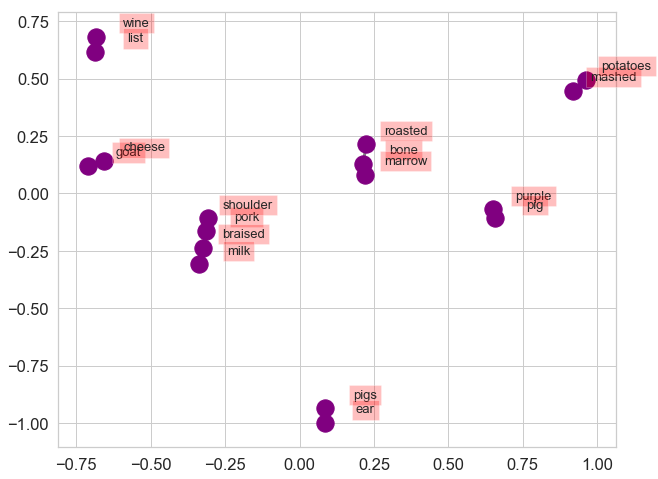

In [46]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

## Food poisoning

In [47]:
# Sentiment Analysis libraries
from textblob import TextBlob
import nltk
from newspaper import Article

In order to find out which business are more likely facing food poisoning, let's make make sentiment analysis over all the reviews.

In [48]:
restaurants_reviews.head()

review_body        Date  \
0  Unlike Next, which we'd eaten at the previous ...  2012-09-22   
1  Probably one of the best meals I've had ever. ...  2012-09-22   
2  Service was impeccable. Experience and present...  2012-09-19   
3  The problem with places like this, given the e...  2012-09-06   
4  I have no idea how to write my review - dining...  2012-09-09   

                review ID             reviewer ID              product ID  \
0  GtwU21YOQn-wf4vWRUIx6w  bNYesZ944s6IJVowOnB0iA  pbEiXam9YJL3neCYHGwLUA   
1                 0LpVTc3  TRKxLC3y-ZvP45e5iilMtw  pbEiXam9YJL3neCYHGwLUA   
2           tljtLzf68Fkwf  0EMm8umAqXZzyhxNpL4M9g  pbEiXam9YJL3neCYHGwLUA   
3                     iSN  DlwexC7z88ymAzu45skODw  pbEiXam9YJL3neCYHGwLUA   
4                  Jmwrh7  kW2dk1CWihmh3g7k9N2G8A  pbEiXam9YJL3neCYHGwLUA   

   useful  funny  cool  star_rating  Year  Month  Day  year_of_review  \
0       0      0     0            5  2012      9   22            2012   
1       0      0     0            5  2012      9   22            2012   
2       0      0     2            3  2012      9   19            2012   
3       3      0     8            3  2012      9    6            2012   
4       0      2     1            5  2012      9    9            2012   

                                review_body_filtered  
0  unlike next wed eaten previous night dish comp...  
1  probably one best meals ive ever performance f...  
2  service impeccable experience presentation coo...  
3  problem places like given exhorbitant cost med...  
4  idea write review dining alinea brings whole d...

### b. Business with most One Star Reviews 

In [49]:
# We analyse ratings of reviews by getting the restaurants with most Five Star rating scores. 
ratings = restaurants_reviews[restaurants_reviews.star_rating == 1].groupby(['product ID', 'star_rating']).agg('size').to_frame('count').reset_index().sort_values(by='count', ascending=False)
ratings[:20]

product ID  star_rating  count
57   _n3OmwreEGPQmiHKklsD8w            1     58
69   ibreTMGGaQSanZttUchjKg            1     50
100  yBRaSkuYwFhYEoucDyD0lA            1     45
21   AqgG-1aD6JYj9D6OmBWO3w            1     44
2    08X_5WTOVNvk4SgPRKBjjQ            1     44
27   DXwSYgiXqIVNdO9dazel6w            1     43
73   m5_GCJP2W4zEJnyVgxa3eA            1     40
12   50gFzdVglOz88eFJ6v-26A            1     40
68   hylBw5ND7XyPldM6BN28vw            1     38
78   n3VjBryfinjRG1W3LWsPBQ            1     38
17   8d_DiHWB-pjBVW3a7D8EWg            1     38
60   cQnY_VneZisfUAqcbuEuKg            1     37
19   ALwH81_sqskLmwfWS-_eeQ            1     35
40   LlHEzxQTiiLJokn2tli35A            1     34
82   oEFJ29zAQaCNnQzebHQvpg            1     34
59   boE4Ahsssqic7o5wQLI04w            1     34
91   sR4EOfPuI-at41uIxIZPhw            1     33
37   KomhK0JD5cleEW55YTw7MQ            1     33
94   tCkwBTuEFvhuaBoEUWqbuQ            1     32
58   bNXpwTSavHBV9zBk2lUlGA            1     32

### _n3OmwreEGPQmiHKklsD8w

In [50]:
restau_pois_1 = restaurants_reviews[restaurants_reviews['product ID'] == '_n3OmwreEGPQmiHKklsD8w']
restau_pois_1.head()

review_body        Date  \
39070  They open a new restaurant Golf rd near Niles,...  2012-09-05   
39071  Last night after unpacking boxes all day my fr...  2012-08-17   
39074  I'm going to have to agree with some of the re...  2012-07-14   
39076                            OK... maybe 3.5 stars\n  2012-09-22   
39078  Great place to eat when you want BBQ! I love t...  2012-09-18   

                    review ID             reviewer ID              product ID  \
39070                x10hzIua  231oec4R58UPf2Bwo0vYaw  _n3OmwreEGPQmiHKklsD8w   
39071  8-MIRcrZaQZqHujHEKRteg  _MAbt_ZCru0MgpR7wpzhTA  _n3OmwreEGPQmiHKklsD8w   
39074  sBGLPc4bm4KkZ4iQZGZDFQ  cCjkjhlH05Fpsef9kna3NA  _n3OmwreEGPQmiHKklsD8w   
39076  cLAvvLXRZvEKm9YMJKtmwg  X6YxH45bscX4Sjqtdy30uA  _n3OmwreEGPQmiHKklsD8w   
39078  u7RIjJacO2FMif4taPmH2A  gwV1JsTSRk0gqg7HlNKpeg  _n3OmwreEGPQmiHKklsD8w   

       useful  funny  cool  star_rating  Year  Month  Day  year_of_review  \
39070       0      0     0            4  2012      9    5            2012   
39071       1      0     1            2  2012      8   17            2012   
39074       0      0     1            2  2012      7   14            2012   
39076       1      1     1            3  2012      9   22            2012   
39078       1      1     1            4  2012      9   18            2012   

                                    review_body_filtered  
39070  open new restaurant golf rd near niles il well...  
39071  last night unpacking boxes day friend decided ...  
39074  im going agree reviews service really suck ser...  
39076                                     ok maybe stars  
39078  great place eat want bbq love fact let cook fr...

In [51]:
# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in restau_pois_1['review_body_filtered']]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aymenayadi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

[('open', 'new'),
 ('new', 'restaurant'),
 ('restaurant', 'golf'),
 ('golf', 'rd'),
 ('rd', 'near'),
 ('near', 'niles'),
 ('niles', 'il'),
 ('il', 'well'),
 ('well', 'like'),
 ('like', 'space'),
 ('space', 'really'),
 ('really', 'like'),
 ('like', 'side'),
 ('side', 'dishes'),
 ('dishes', 'foods'),
 ('foods', 'really'),
 ('really', 'tasty'),
 ('tasty', 'one'),
 ('one', 'best'),
 ('best', 'korean'),
 ('korean', 'place'),
 ('place', 'chicago'),
 ('chicago', 'thing'),
 ('thing', 'grill'),
 ('grill', 'smoky')]

In [53]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('korean', 'bbq'), 170),
 (('side', 'dishes'), 135),
 (('san', 'soo'), 75),
 (('gab', 'san'), 66),
 (('soo', 'gab'), 65),
 (('korean', 'food'), 62),
 (('seafood', 'pancake'), 32),
 (('late', 'night'), 31),
 (('short', 'ribs'), 31),
 (('parking', 'lot'), 29),
 (('first', 'time'), 25),
 (('food', 'good'), 24),
 (('smell', 'like'), 23),
 (('dont', 'know'), 23),
 (('bbq', 'place'), 21),
 (('food', 'great'), 21),
 (('korean', 'restaurant'), 21),
 (('smelling', 'like'), 21),
 (('best', 'korean'), 20),
 (('really', 'good'), 20)]

In [54]:
bigram_df = pd.DataFrame(bigram_counts.most_common(10),
                             columns=['bigram', 'count'])

bigram_df

bigram  count
0       (korean, bbq)    170
1      (side, dishes)    135
2          (san, soo)     75
3          (gab, san)     66
4          (soo, gab)     65
5      (korean, food)     62
6  (seafood, pancake)     32
7       (late, night)     31
8       (short, ribs)     31
9      (parking, lot)     29

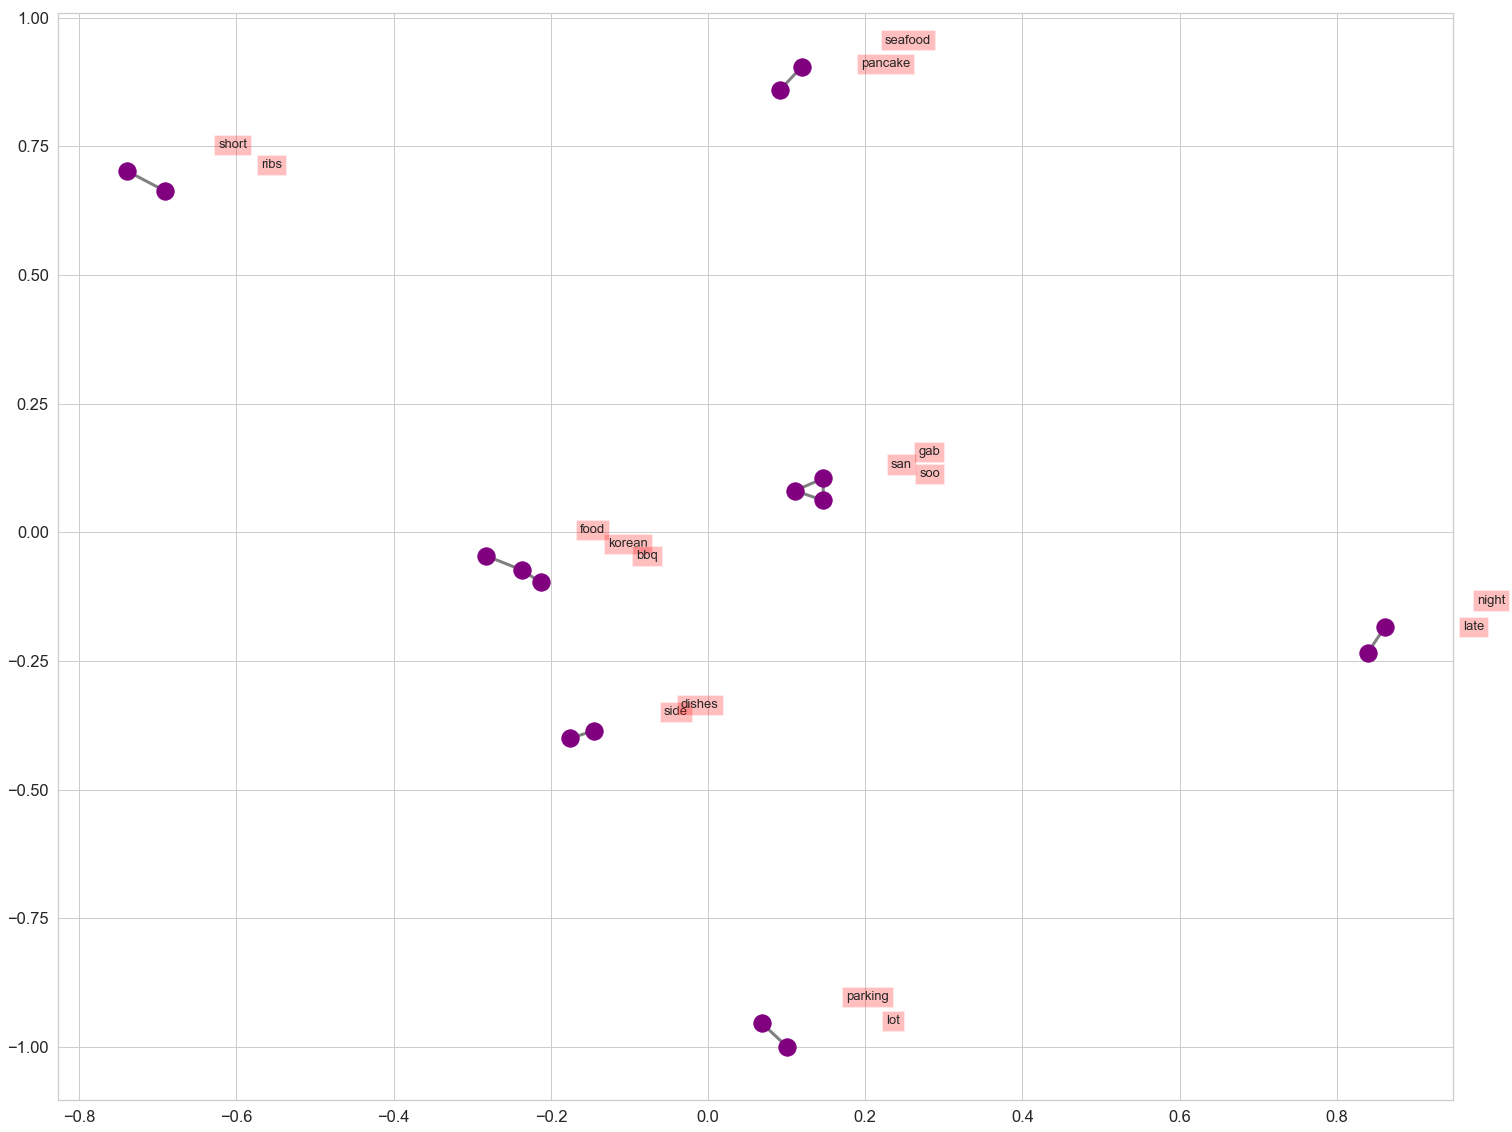

In [55]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(25, 20))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [56]:
# We get sentiment analysis for all reviews and sort them by most negative reviews

#Create Text Blob Object
#NOTE: You can treat TextBlob objects as if they were Python strings that learned how to do Natural Language Processing.
#restaurants_reviews["description_filtered"]= restaurants_reviews.apply(lambda row : preprocess(row["description"]) , axis = 1)
restaurants_reviews['sentiment_analysis'] = restaurants_reviews['review_body_filtered'].apply(lambda x: TextBlob(x).sentiment.polarity)
restaurants_reviews.sort_values(by='sentiment_analysis', ascending=True, inplace=True)
restaurants_reviews[:20]

review_body        Date  \
32215  Brussell sprout salad. Yeah, I know, it sounds...  2011-01-18   
25618     Outrageously yummy! Go for the tasting menu.\n  2011-11-02   
33754                          food so so service evil\n  2012-05-19   
53836  Horrible! Way overpriced for Chicago. Order ne...  2012-08-23   
55471  Very fancy.. Take note of that. Ha, anyways, t...  2011-08-04   
58089  Horrible service. Food comes out one at a time...  2011-02-26   
57890  Horrible service. That by itself is a reason t...  2010-07-08   
57655  I almost slipped and fell twice!! The floor is...  2010-05-17   
31402  It wad horrible. We waited 40minutes for 2 egg...  2011-06-14   
22418  I wouldn't go here again! Problems I have with...  2011-08-21   
52180                                Worst pizza ever!\n  2011-10-17   
57405  DISGUSTING!!!!! don't go here. u r not only wa...  2011-04-08   
55398  Horrible service and would recommend avoidingW...  2010-01-25   
39966  The worst experience ever! The server can't un...  2010-09-10   
9503   I went for pho based on yelp reviews.....small...  2011-10-02   
22464  delivery is terrible. They often forget things...  2012-07-10   
50744    Terrible website with inaccurate information.\n  2011-10-27   
46048                                 Worst food ever.\n  2012-01-18   
37145  So yet again flagged by the those that want to...  2012-07-04   
16345  Disappointed and Over priced. Waitress was mis...  2012-03-17   

                    review ID             reviewer ID              product ID  \
32215  N3V0V-9NdI4qCNEfSRM2VQ  mMhw2UFbTrMpBKMWr6hNMA  8d_DiHWB-pjBVW3a7D8EWg   
25618  FD7tOyhQTXVttFFIQQp5Fg  kvSB3RE7mbIw12oCrTZa8Q  o4NcUfco7JxOcyfKFWyAhg   
33754                   4kKuX  tPA-sADpemoeEXFePGiJrA  6PQTqW9j-sriDBQyQCJbjw   
53836  cqjf2qIwkvwq-xKMn4Zaag  Pt6XYGL4VmtW_7freshicw  boE4Ahsssqic7o5wQLI04w   
55471  enRRaC-75jyUhQ0jEFwwWA  ppnCq6lYLAAR2NccB3ltcw  JMa9cTNQA5mm4GbR2W8Oiw   
58089  Aq5B1JcZ4P2PF1mP-6LeVg  2h1G5ldDBvAaSBG_eye-bw  yBRaSkuYwFhYEoucDyD0lA   
57890  vI5vKjJDVAElfrBBBsUMCg  aKZoKOqwJsDQco_6zgjmTQ  JDNZxz0ud7zhuPo5pqznMA   
57655  MFSuJzVNxBBGYPT804nZhw  3t6WTPGecnAoM36g0TTmXQ  cQnY_VneZisfUAqcbuEuKg   
31402  o71pBDrgvHsGgj4lkT19dw  QjZzl0uIsB12jT7mVPbTXg  DBtXy8wcPsVr80oFfz-CbA   
22418  x92Q5jh2CSGL1EMLn-Z8nA  cJd7HnlATnVtblrfibzhvA  F7IQngaDDBgYvhA3U31q-g   
52180  ffo1sQjjX4GooduReZ-urw  VmqgbJhPcErG6GMb9c-aWQ  ibreTMGGaQSanZttUchjKg   
57405  pLzDUhiIuaSjGaAuFOKRlA  D2w2aqHP_Zf85XdQohYg2g  xXSMc3pDWTRQHLgjBTtTUg   
55398  yhk2KRwOLdEXE7BYQ1DyOA  QRAqizE0uuB1TBTSrjGXhg  8j97C2qR95tvpbGtoFxEAw   
39966     MDAh2VeDb8h-oaNF7f1  CrYW_PUHg_muRotgucVw9g  _n3OmwreEGPQmiHKklsD8w   
9503   -QKn2CawTApWikjesGfKWg  Wn8sC9SoT5DJxlmYa_DIFA  5OtAmmypXvuTbkFBCziF_Q   
22464  PFUmB1DTu4gOjkoQ9VU6xQ  cD0EyIsiDCDfHx2ojHPABw  yBRaSkuYwFhYEoucDyD0lA   
50744  50uksb4jjbSUS8gSJ2e-cw  c75RjirUA_4wzl47TlZEJQ  RYw_no9ohtCg09aKorVffg   
46048     hCQd7wWx5rfz5eAEoPy  UAULEDfAO5LMZh5l4bIVJw  4wreIFjaPMppyEnzKHbozg   
37145    QmQ8cHh3AuA3Mc8r615j  bCmXlwNbeWBaIIodiLLaww  n3VjBryfinjRG1W3LWsPBQ   
16345             9-8MnSNvQUu  ZfBU7Bnk7ul7w7LqdXCkRQ  sfWMOqUEp8S2adDeJp7Kzg   

       useful  funny  cool  star_rating  Year  Month  Day  year_of_review  \
32215       0      0     0            4  2011      1   18            2011   
25618       0      0     0            5  2011     11    2            2011   
33754       0      0     0            2  2012      5   19            2012   
53836       0      0     0            1  2012      8   23            2012   
55471       0      0     0            4  2011      8    4            2011   
58089       0      0     0            1  2011      2   26            2011   
57890       0      0     0            1  2010      7    8            2010   
57655       0      0     0            1  2010      5   17            2010   
31402       0      0     1            1  2011      6   14            2011   
22418       0      0     1            1  2011      8   21   

### 8d_DiHWB-pjBVW3a7D8EWg

In [57]:
restau_pois_2 = restaurants_reviews[restaurants_reviews['product ID'] == '6PQTqW9j-sriDBQyQCJbjw']
restau_pois_2.head()

review_body        Date  \
33754                          food so so service evil\n  2012-05-19   
33810  I feel like a stalwart has just let me down......  2010-03-12   
58008  Been here twice, food and service are solid, a...  2011-07-24   
33868  Solid little Italian place in Lakeview. Went h...  2010-05-06   
58010  Went out for a late meal after a night of club...  2011-05-29   

                    review ID             reviewer ID              product ID  \
33754                   4kKuX  tPA-sADpemoeEXFePGiJrA  6PQTqW9j-sriDBQyQCJbjw   
33810                  W06cyK  WCmaY55rrGuz_igGOxqJ6Q  6PQTqW9j-sriDBQyQCJbjw   
58008  UXeCmMQRDjpg2QdCx12B4Q  3l7FUV_9R0HXceIHrz-XEg  6PQTqW9j-sriDBQyQCJbjw   
33868  pr3cmlA03ZKJW4YDRQq0YA  JGxtSUnA93ZFFOm50Z7J4A  6PQTqW9j-sriDBQyQCJbjw   
58010  NvZuPu52BlKFmSVF1S-s2Q  qjnOKQTD5elgm58YGWYa9A  6PQTqW9j-sriDBQyQCJbjw   

       useful  funny  cool  star_rating  Year  Month  Day  year_of_review  \
33754       0      0     0            2  2012      5   19            2012   
33810       0      0     0            3  2010      3   12            2010   
58008       0      0     0            4  2011      7   24            2011   
33868       0      1     0            4  2010      5    6            2010   
58010       0      0     0            1  2011      5   29            2011   

                                    review_body_filtered  sentiment_analysis  
33754                                  food service evil           -1.000000  
33810  feel like stalwart let downlike chicago instit...           -0.219276  
58008  twice food service solid always come away left...           -0.122024  
33868  solid little italian place lakeview went boy f...           -0.075000  
58010  went late meal night clubbin expecting nice qu...           -0.061538

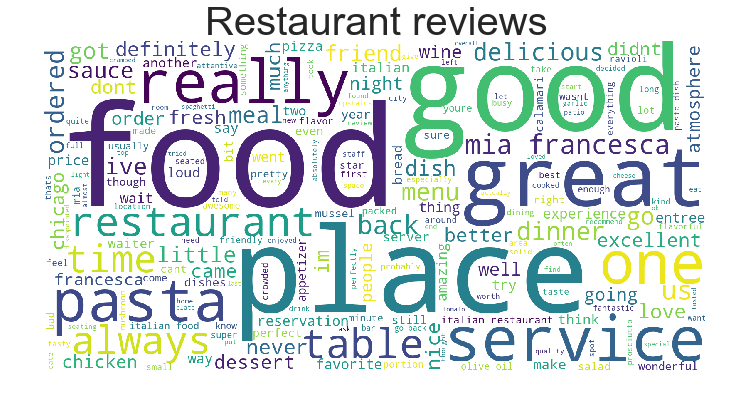

In [58]:
wc = WordCloud(background_color="white",width=1600, height=800, random_state=1, max_words=200)
# Join all strings together from the filtered description column to obtain all review text for the restaurant
wc.generate(' '.join(restau_pois_2['review_body_filtered']))


plt.figure(figsize=(15,10))
# Add title to figure
plt.title("Restaurant reviews", fontsize=40)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=10)

In [59]:
# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in restau_pois_2['review_body_filtered']]

# Download stopwords
nltk.download('stopwords')


# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aymenayadi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

[('food', 'service'), ('service', 'evil')]

In [61]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('mia', 'francesca'), 59),
 (('italian', 'food'), 23),
 (('olive', 'oil'), 22),
 (('pasta', 'dish'), 19),
 (('go', 'back'), 18),
 (('ive', 'ever'), 13),
 (('italian', 'restaurants'), 13),
 (('food', 'service'), 12),
 (('pasta', 'dishes'), 12),
 (('good', 'service'), 12),
 (('good', 'food'), 12),
 (('italian', 'restaurant'), 11),
 (('would', 'definitely'), 11),
 (('one', 'favorite'), 11),
 (('tomato', 'sauce'), 10),
 (('best', 'italian'), 10),
 (('first', 'time'), 10),
 (('one', 'best'), 10),
 (('great', 'food'), 10),
 (('last', 'night'), 10)]

In [62]:
bigram_df = pd.DataFrame(bigram_counts.most_common(10),
                             columns=['bigram', 'count'])

bigram_df

bigram  count
0        (mia, francesca)     59
1         (italian, food)     23
2            (olive, oil)     22
3           (pasta, dish)     19
4              (go, back)     18
5             (ive, ever)     13
6  (italian, restaurants)     13
7         (food, service)     12
8         (pasta, dishes)     12
9         (good, service)     12

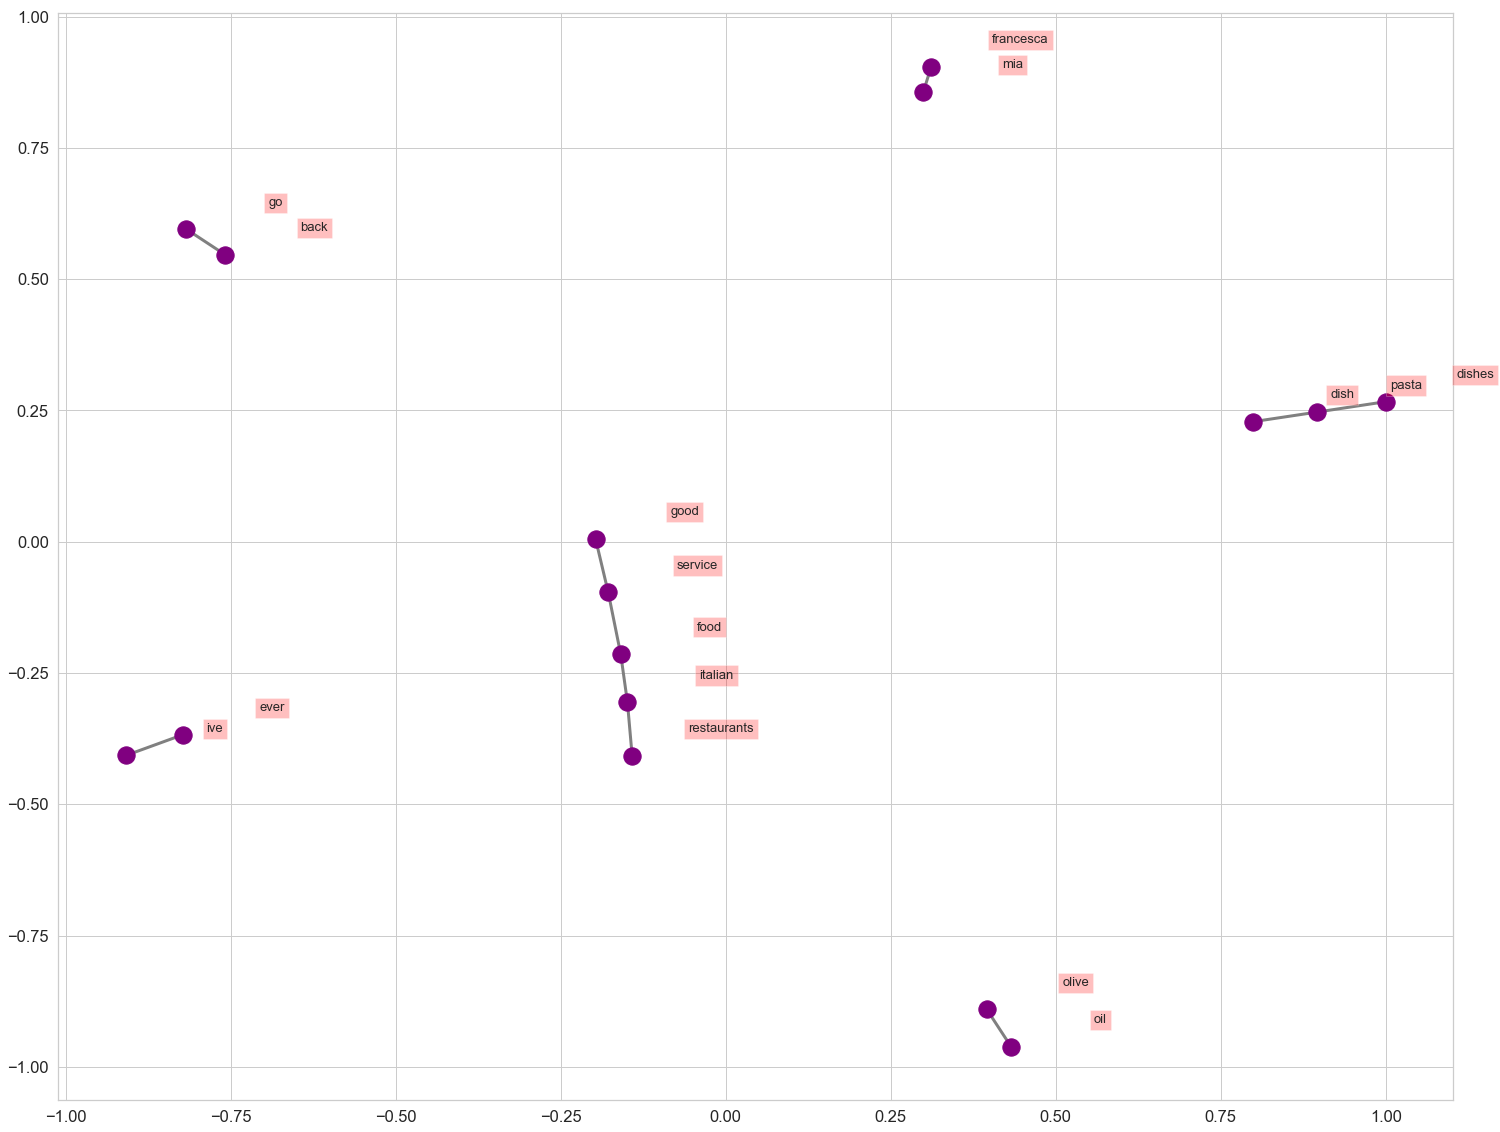

In [63]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(25, 20))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

### Food poisoning restaurants

For the sake of our study, we focus our analysis on restaurants that have failed inspections. The goal is to inspect ratings and reviews related to these restaurants to see if they are negative. Also, a step of the work is to cross them with the food inspection data-set to make analysis of reviews and ratings around inspection dates

#### set up a dataset of negative words

In [738]:
from empath import Empath
lexicon = Empath()
lex = lexicon.create_category("poisoning", ["food_poisoning","dirty","digestion","food","undercooked","disgusting","unsanitary","rotten"], model="nytimes")

["filthy", "dirty", "thirsty", "greasy", "smelly", "smelly", "smelling", "inedible", "vermin", "unhealthy", "smells", "eating", "nutritious", "poisonous", "vomit", "odor", "sterile", "rotten", "sticky", "slime", "fatty", "repellent", "soggy", "maggots", "edible", "tasteless", "bad_food", "reeking", "antiseptic", "food", "healthful", "oily", "grease", "poison_ivy", "excrement", "allergic", "moldy", "smell", "unsanitary", "fed", "inhale", "acrid", "fattening", "slugs", "roaches", "stink", "salty", "cold", "tastes", "nutritionally", "sodden", "flabby", "narcotic", "cockroaches", "nauseating", "junk_food", "unappetizing", "poison", "unwashed", "diseased", "tap_water", "lice", "overcooking", "sugary", "mouthful", "disgusting", "coarse", "fishy", "brew", "acid", "salts", "rubbery", "meat", "tonic", "mite", "caffeine", "unclean", "unpleasant", "filth", "stench", "inhuman", "only_water", "peanut_butter", "bad_breath", "gooey", "messy", "raw_meat", "damp", "harmless", "rotten_eggs", "raw_eggs",

In [743]:
lex = ["filthy", "dirty", "thirsty", "greasy", "smelly", "smelly", "smelling", "inedible", "vermin", "unhealthy", "smells", "eating", "nutritious", "poisonous", "vomit", "odor", "sterile", "rotten", "sticky", "slime", "fatty", "repellent", "soggy", "maggots", "edible", "tasteless", "bad_food", "reeking", "antiseptic", "food", "healthful", "oily", "grease", "poison_ivy", "excrement", "allergic", "moldy", "smell", "unsanitary", "fed", "inhale", "acrid", "fattening", "slugs", "roaches", "stink", "salty", "cold", "tastes", "nutritionally", "sodden", "flabby", "narcotic", "cockroaches", "nauseating", "junk_food", "unappetizing", "poison", "unwashed", "diseased", "tap_water", "lice", "overcooking", "sugary", "mouthful", "disgusting", "coarse", "fishy", "brew", "acid", "salts", "rubbery", "meat", "tonic", "mite", "caffeine", "unclean", "unpleasant", "filth", "stench", "inhuman", "only_water", "peanut_butter", "bad_breath", "gooey", "messy", "raw_meat", "damp", "harmless", "rotten_eggs", "raw_eggs", "eater", "jelly", "sweets", "human_flesh", "dirty"]

In [65]:
negative_words

negative
0       abnormal
1        abolish
2     abominable
3     abominably
4      abominate
...          ...
4776        zaps
4777      zealot
4778     zealous
4779   zealously
4780      zombie

[4781 rows x 1 columns]

In [710]:
shaws = pd.read_csv('data/shaws.csv').drop(columns=['Unnamed: 0'])
giordanos = pd.read_csv('data/Giordanos.csv').drop(columns=['Unnamed: 0'])
ghareeb = pd.read_csv('data/ghareeb.csv').drop(columns=['Unnamed: 0'])
ginos = pd.read_csv('data/ginos.csv').drop(columns=['Unnamed: 0'])
iyanze = pd.read_csv('data/iyanze.csv').drop(columns=['Unnamed: 0'])
chilis = pd.read_csv('data/chilis.csv').drop(columns=['Unnamed: 0'])
dominos = pd.read_csv('data/dominos-pizza-chicago-22.csv').drop(columns=['Unnamed: 0'])
mcdo70 = pd.read_csv('data/mcdonalds-chicago-70.csv').drop(columns=['Unnamed: 0'])
mcdo95 = pd.read_csv('data/mcdonalds-chicago-95.csv').drop(columns=['Unnamed: 0'])
mcdo19 = pd.read_csv('data/mcdonalds-chicago-19.csv').drop(columns=['Unnamed: 0'])
chipotle = pd.read_csv('data/chipotle-mexican-grill-chicago-29.csv').drop(columns=['Unnamed: 0'])
giordanos19 = pd.read_csv('data/giordanos-chicago-19.csv').drop(columns=['Unnamed: 0'])
reviews = pd.concat([shaws, giordanos, ghareeb, ginos, iyanze, chilis, dominos, mcdo70, mcdo95, mcdo19, chipotle,giordanos19])
reviews = reviews.reset_index(drop= True)

#Extract rating from reviewRating
reviews["rating"]=reviews["reviewRating"].str.extract('(\d+)')
reviews = reviews.astype({'rating': 'int32'}).drop(columns=['reviewRating'])
reviews.head()

datePublished                                        description  \
0    2019-12-11  Not only did we have brunch on Sunday, Decembe...   
1    2019-12-07  Shaw's has been around  for quite some time in...   
2    2019-12-05  What a disappointing experience at what used t...   
3    2019-11-22  10,10,10,10,10\nthis is exactly how I feel abo...   
4    2019-10-23  Weekend brunch ... King Crab Legs ... All-You-...   

        author                     alias  rating  
0  Carol A. R.  shaws-crab-house-chicago       5  
1   Richard S.  shaws-crab-house-chicago       4  
2     Emily I.  shaws-crab-house-chicago       1  
3    Ronald S.  shaws-crab-house-chicago       5  
4   Michael S.  shaws-crab-house-chicago       4

In [779]:
# Constructing a list of stopwords

# download all stopwords from the nltk library
nltk.download('stopwords')

# get a list of all english stopwords
i = nltk.corpus.stopwords.words('english')

# get a list of all punctuations
j = list(string.punctuation)

stopwords = set(i).union(j)

# Introduce a preprocessing function to get rid of stopwords in the description of reviews
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aymenayadi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [780]:
# filter the column description according to the stopwords 
reviews["description_filtered"]= reviews.apply(lambda row : preprocess(row['description']) , axis = 1)
reviews

datePublished                                        description  \
0       2019-12-11  Not only did we have brunch on Sunday, Decembe...   
1       2019-12-07  Shaw's has been around  for quite some time in...   
2       2019-12-05  What a disappointing experience at what used t...   
3       2019-11-22  10,10,10,10,10\nthis is exactly how I feel abo...   
4       2019-10-23  Weekend brunch ... King Crab Legs ... All-You-...   
...            ...                                                ...   
9073    2007-04-14  Sauce here is tops.  I like the crust better a...   
9074    2009-05-01  Long wait, of course.  The wait staff was nice...   
9075    2009-09-14  5 stars for the food, and maybe 2 for the serv...   
9076    2009-11-14  Have never had a bad deep dish pizza from this...   
9077    2011-04-01  i visited this location yesterday with my husb...   

           author                     alias  rating  \
0     Carol A. R.  shaws-crab-house-chicago       5   
1      Richard S.  shaws-crab-house-chicago       4   
2        Emily I.  shaws-crab-house-chicago       1   
3       Ronald S.  shaws-crab-house-chicago       5   
4      Michael S.  shaws-crab-house-chicago       4   
...           ...                       ...     ...   
9073      Mark P.      giordanos-chicago-19       4   
9074   Melissa G.      giordanos-chicago-19       3   
9075     Peter O.      giordanos-chicago-19       4   
9076     Lindz B.      giordanos-chicago-19       5   
9077    Grisel V.      giordanos-chicago-19       5   

                                   description_filtered  year_of_review  
0     brunch sunday december family friends marked i...            2019  
1     shaws around quite time chicagoand id consider...            2019  
2     disappointing experience used amazing seafood ...            2019  
3     exactly feel restaurant websites social inform...            2019  
4     weekend brunch king crab legs allyoucaneat per...            2019  
...                                                 ...             ...  
9073            sauce tops like crust better ginos east            2007  
9074  long wait course wait staff nice got veggie de...            2009  
9075  stars food maybe service pizza legendary good ...            2009  
9076  never bad deep dish pizza place bad yet delici...            2009  
9077  visited location yesterday husband service goo...            2011  

[9078 rows x 7 columns]

## Satistics of Ratings

## 3. Understanding what's in the data

### a. Distributions

In [714]:
# number of restaurants
print('we are dealing with', reviews.groupby('alias').count().shape[0], 'restaurants.')

we are dealing with 12 restaurants.


In [715]:
# We add a new column to get the distribution of reviews over the years
reviews['year_of_review'] = reviews.datePublished.map(lambda x : int(x[:4]))

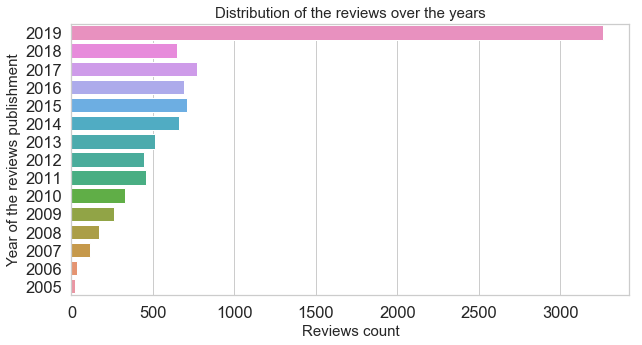

In [716]:
# Plotting the distribution of the reviews over the years
plt.figure(figsize=(10, 5))
p = sns.countplot(data = reviews, y = 'year_of_review', orient="h").invert_yaxis()
plt.title("Distribution of the reviews over the years",fontsize=15)
plt.xlabel('Reviews count',fontsize=15)
plt.ylabel('Year of the reviews publishment',fontsize=15);

### b. Business with most Five Star Reviews 

In [717]:
# We analyse ratings of reviews by getting the restaurants with most Five Star rating scores. 
ratings = reviews[reviews.rating == 5].groupby(['alias', 'rating']).agg('size').to_frame('count').reset_index().sort_values(by='count', ascending=False)
ratings[:20]

alias  rating  count
0                                 Giordano's       5   1197
10                  shaws-crab-house-chicago       5   1091
5        ginos-east-magnificent-mile-chicago       5    729
4                      ghareeb-nawaz-chicago       5    360
6                       giordanos-chicago-19       5    154
2          chipotle-mexican-grill-chicago-29       5     31
7   iyanze-restaurant-bar-and-cafe-chicago-2       5     17
3                   dominos-pizza-chicago-22       5     13
1                       chilis-too-chicago-3       5      9
8                       mcdonalds-chicago-19       5      6
9                       mcdonalds-chicago-95       5      2

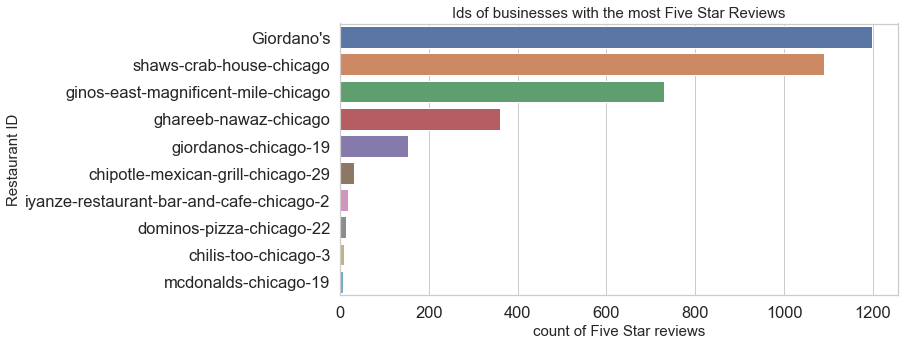

In [718]:
plt.figure(figsize=(10, 5))
#p = sns.barplot(x ='alias', y = 'count', data = ratings[:10], orient="h").invert_yaxis();
p = sns.barplot(data = ratings[:10], x='count', y = 'alias', orient="h")
plt.title("Ids of businesses with the most Five Star Reviews",fontsize=15)
plt.xlabel('count of Five Star reviews',fontsize=15)
plt.ylabel('Restaurant ID',fontsize=15);

## Shaws Crab House Chicago


In [781]:
# Get all the reviews of Shaws Crab House Chicago restaurant
shaws = reviews[reviews['alias'] == 'shaws-crab-house-chicago']

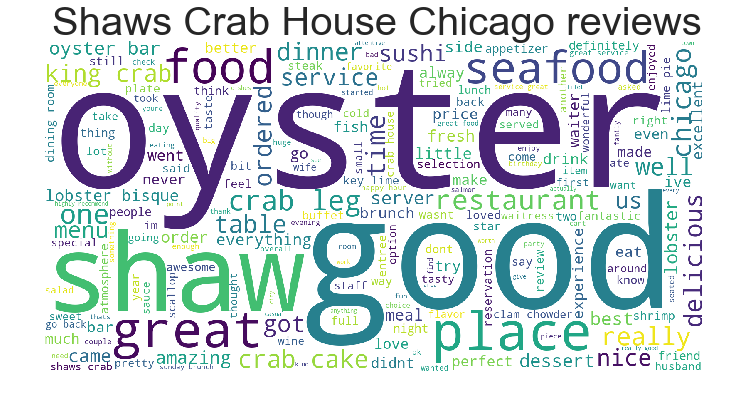

In [782]:
wc = WordCloud(background_color="white",width=1600, height=800, random_state=1, max_words=200)
# Join all strings together from the filtered description column to obtain all review text for the restaurant
wc.generate(' '.join(shaws['description_filtered']))


plt.figure(figsize=(15,10))
# Add title to figure
plt.title("Shaws Crab House Chicago reviews", fontsize=40)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=10)

In [783]:
# We get the 20 most occuring words over the reviews. 

# Pass the split_it list to instance of Counter class. 
splitted = shaws['description_filtered'].apply(lambda x: x.split()).to_list()
flatten = [item for sublist in splitted for item in sublist]
counter = Counter(flatten) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = counter.most_common(20) 
most_occur

[('crab', 1811),
 ('great', 1375),
 ('good', 1327),
 ('food', 1219),
 ('seafood', 1182),
 ('shaws', 1167),
 ('service', 1056),
 ('oysters', 1028),
 ('lobster', 975),
 ('place', 894),
 ('bar', 739),
 ('time', 660),
 ('chicago', 649),
 ('like', 580),
 ('oyster', 580),
 ('fresh', 578),
 ('one', 556),
 ('restaurant', 556),
 ('go', 556),
 ('really', 552)]

In [764]:
#Now we add a column which has the sentiment values of the each review posted for Shaws Crab House Chicago, to see how the 
#authors of this review feel about the restaurant.

#Create Text Blob Object and draw out the sentiment of each review by returning a value between -1.0 (extreme negative) 
#and 1.0 (extreme positive).
shaws['sentiment_analysis'] = shaws['description_filtered'].apply(lambda x: TextBlob(x).sentiment.polarity)
shaws[:10]

datePublished                                        description  \
0    2019-12-11  Not only did we have brunch on Sunday, Decembe...   
1    2019-12-07  Shaw's has been around  for quite some time in...   
2    2019-12-05  What a disappointing experience at what used t...   
3    2019-11-22  10,10,10,10,10\nthis is exactly how I feel abo...   
4    2019-10-23  Weekend brunch ... King Crab Legs ... All-You-...   
5    2019-11-15  Iesha is the best server ever!!! She checked o...   
6    2019-11-28  Last time we were here we had some hiccups. Wh...   
7    2019-12-14  I had pretty mediocre experience at Shaw's. I ...   
8    2019-10-21  There's something for everyone.... crab legs, ...   
9    2019-12-12  Classic nostalgic and fresh seafood every time...   

        author                     alias  rating  \
0  Carol A. R.  shaws-crab-house-chicago       5   
1   Richard S.  shaws-crab-house-chicago       4   
2     Emily I.  shaws-crab-house-chicago       1   
3    Ronald S.  shaws-crab-house-chicago       5   
4   Michael S.  shaws-crab-house-chicago       4   
5     Debor B.  shaws-crab-house-chicago       5   
6      John G.  shaws-crab-house-chicago       4   
7      Olga W.  shaws-crab-house-chicago       3   
8     Padma A.  shaws-crab-house-chicago       5   
9     Laura R.  shaws-crab-house-chicago       5   

                                description_filtered  year_of_review  \
0  brunch sunday december family friends marked i...            2019   
1  shaws around quite time chicagoand id consider...            2019   
2  disappointing experience used amazing seafood ...            2019   
3  exactly feel restaurant websites social inform...            2019   
4  weekend brunch king crab legs allyoucaneat per...            2019   
5  iesha best server ever checked us constant eve...            2019   
6  last time hiccups arrived packed conventioneer...            2019   
7  pretty mediocre experience shaws expect unfort...            2019   
8  theres something everyone crab legs lobster bi...            2019   
9  classic nostalgic fresh seafood every time lon...            2019   

   sentiment_analysis  
0            0.397233  
1            0.414583  
2            0.008343  
3            0.537255  
4            0.182504  
5            0.480519  
6            0.374861  
7            0.051190  
8            0.208705  
9            0.229048

In [767]:
# Now let's consider reviews of authors that gave 1 Star rating and which sentiment analysis was negative:
shaws = shaws.sort_values(by=['rating', 'sentiment_analysis'])
shaws.head()

datePublished                                        description  \
1079    2015-05-19  Worst service ever!  No lobster in lobster bis...   
1624    2011-10-16  Sat at the bar and got served a bad plate of o...   
715     2016-12-02  Ewwww. We had the crab legs with mashed potato...   
21      2019-11-01  Someone from Shaw's reached out and told me th...   
2010    2012-02-13  I ordered a cheddar burger and clam cowder fro...   

         author                     alias  rating  \
1079   Karen J.  shaws-crab-house-chicago       1   
1624   Grace E.  shaws-crab-house-chicago       1   
715     Lisa T.  shaws-crab-house-chicago       1   
21      Jori W.  shaws-crab-house-chicago       1   
2010  Daryll M.  shaws-crab-house-chicago       1   

                                   description_filtered  year_of_review  \
1079  worst service ever lobster lobster bisque butt...            2015   
1624  sat bar got served bad plate oysters oyster fe...            2011   
715   ewwww crab legs mashed potatoes mac cheese cra...            2016   
21    someone shaws reached told general manager kev...            2019   
2010  ordered cheddar burger clam cowder shaws thoug...            2012   

      sentiment_analysis  
1079           -0.916667  
1624           -0.314286  
715            -0.305000  
21             -0.266667  
2010           -0.207778

In [777]:
#shaws[:10].description.values.tolist()[8]

**Worst service ever**! No lobster in lobster bisque, butter spilled on me by waiter and **horrible waitress**.  Been going since 1980's **so disappointed**!!

Sat at the bar and got served a **bad plate** of oysters during oyster fest. The plate of oysters I was served **smelled so bad** that people at the bar several seats over **complained** about it. Told this **horror story** to a couple friends and it turns out that a girlfriend of mine dined there 2 weeks ago and ate sushi at the bar. **The entire group got horrible food poisoning**. Overrated, overpriced. Much better seafood in Chicago.

Ewwww. We had the crab legs with mashed potatoes and the mac and cheese. The crab legs were ok, but the **sides were terrible**.  We had drinks,  which were good. The pumpkin pie...ewwww, **worst pie ever**. **I hated just about everything but the drinks**. Won't waste my money there again. Was highly recommend and the let down was painful.

Someone from Shaw's reached out and told me that the General Manager, Kevin Riordan would be in touch with me to get more information regarding my review... this was nearly 2 months ago. No one ever got in touch with me. Why reach out to me if you really could care less how I feel or about my **horrible experience about this disgusting place**?! They wasted my time and theirs! I must say that all in all I'm happy, my boss said **he too was extremely disappointed and would never return**. My family won't ever give business to this place either, hey **hopefully more people will follow suit**. Try Ocean Prime instead everyone, they're not bad!

I ordered a cheddar burger and clam cowder from Shaw's as i have before. I thought the burger was unusally tough but discovered **they had melted the cheese on the burger without removing its wrapping/backing first**. I hope the 40% of this burger/wrapping i injested passing through me without **making me ill**. The delivery service informed Shaw's manager, who offered to redo the order for free and not charge me for **this crap**, but even though i asked the delivery service to have Shaw's to call me, no one has nor to my knowledge did they apologize. Check your food throughly if you order from here

**AWFUL**! I don't see how anyone can give this place even two stars. The night started out ok. The apps we got were good. Then we ordered cold crab legs for our entree and clam chowder. The clam chowder reminded me of something you'd get in a cafeteria, thick, salty and just gross. Then the crab legs at Shaws CRAB house came...they were warm...not cold enough to be cold not hot enough to be hot...we sent them back and ordered sushi. I have had better sushi at the grocery store. This was by far the **worst meal I've had in a while**. And I **didn't even mention the awful service**!

A tourist trap **to avoid**! **Extremely slow service**, you can tell kitchen is struggling with such an enormous sitting. **Everything is bad**, starting with bread, mushy and falling apart desserts and ending with **arrogant management**. Seafood and fish... you will have a better meal at Bubba Gump Shrimp or Red Lobster. **Total disappointment and waste of time and money**! Do yourself a favor go somewhere else **this place sucks**!

__________________________________________________________________________________________________________________

As observed in the above reviews, our selection got us the most negative reviews about this restaurant. We detected bad signs attesting of a bad service quality, and a bad food quality too.

We need to deepen a little more our analysis of reviews by identifying negative reviews complaining against the food quality.

In [784]:
# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in shaws[:10]['description_filtered']]


# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

In [725]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in reviews_filtered_list]

# View bigrams for the first tweet
terms_bigram[0]

[('worst', 'service'),
 ('service', 'ever'),
 ('ever', 'lobster'),
 ('lobster', 'lobster'),
 ('lobster', 'bisque'),
 ('bisque', 'butter'),
 ('butter', 'spilled'),
 ('spilled', 'waiter'),
 ('waiter', 'horrible'),
 ('horrible', 'waitress'),
 ('waitress', 'going'),
 ('going', 'since'),
 ('since', 'disappointed')]

In [726]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('would', 'never'), 2),
 (('never', 'return'), 2),
 (('plate', 'oysters'), 2),
 (('much', 'better'), 2),
 (('crab', 'legs'), 2),
 (('worst', 'service'), 1),
 (('service', 'ever'), 1),
 (('ever', 'lobster'), 1),
 (('lobster', 'lobster'), 1),
 (('lobster', 'bisque'), 1),
 (('bisque', 'butter'), 1),
 (('butter', 'spilled'), 1),
 (('spilled', 'waiter'), 1),
 (('waiter', 'horrible'), 1),
 (('horrible', 'waitress'), 1),
 (('waitress', 'going'), 1),
 (('going', 'since'), 1),
 (('since', 'disappointed'), 1),
 (('cant', 'go'), 1),
 (('go', 'wrong'), 1)]

In [729]:
bi = []
for i in range(len(bigrams)) :
    if (bigrams[i][0] == 'food' and negative_words.negative.str.contains(bigrams[i][1]).any()) or (negative_words.negative.str.contains(bigrams[i][0]).any() and bigrams[i][1] == 'food') or (bigrams[i][0] == 'food' or bigrams[i][1] == 'food'):
        print(bigrams[i])
        bi.append(bigrams[i])

('marginal', 'food')
('food', 'overpriced')
('lot', 'food')
('food', 'price')
('horrible', 'food')
('food', 'poisoning')
('ppl', 'food')
('food', 'awful')


In [744]:
print(lex)

['filthy', 'dirty', 'thirsty', 'greasy', 'smelly', 'smelly', 'smelling', 'inedible', 'vermin', 'unhealthy', 'smells', 'eating', 'nutritious', 'poisonous', 'vomit', 'odor', 'sterile', 'rotten', 'sticky', 'slime', 'fatty', 'repellent', 'soggy', 'maggots', 'edible', 'tasteless', 'bad_food', 'reeking', 'antiseptic', 'food', 'healthful', 'oily', 'grease', 'poison_ivy', 'excrement', 'allergic', 'moldy', 'smell', 'unsanitary', 'fed', 'inhale', 'acrid', 'fattening', 'slugs', 'roaches', 'stink', 'salty', 'cold', 'tastes', 'nutritionally', 'sodden', 'flabby', 'narcotic', 'cockroaches', 'nauseating', 'junk_food', 'unappetizing', 'poison', 'unwashed', 'diseased', 'tap_water', 'lice', 'overcooking', 'sugary', 'mouthful', 'disgusting', 'coarse', 'fishy', 'brew', 'acid', 'salts', 'rubbery', 'meat', 'tonic', 'mite', 'caffeine', 'unclean', 'unpleasant', 'filth', 'stench', 'inhuman', 'only_water', 'peanut_butter', 'bad_breath', 'gooey', 'messy', 'raw_meat', 'damp', 'harmless', 'rotten_eggs', 'raw_eggs',

In [758]:
bi = []
for i in range(len(bigrams)) :
    if(bigrams[i][0] == 'food' and bigrams[i][1] in lex) or (((bigrams[i][0]) in lex) and bigrams[i][1] == 'food') or (bigrams[i][0] == 'food' or bigrams[i][1] == 'food'):
        print(bigrams[i])
        bi.append(bigrams[i])

('marginal', 'food')
('food', 'overpriced')
('lot', 'food')
('food', 'price')
('horrible', 'food')
('food', 'poisoning')
('ppl', 'food')
('food', 'awful')


In [747]:
bi = []
for i in range(len(bigrams)) :
    if negative_words.negative.str.contains(bigrams[i][0]).any() or negative_words.negative.str.contains(bigrams[i][1]).any():
        print(bigrams[i])
        bi.append(bigrams[i])

('worst', 'service')
('service', 'ever')
('ever', 'lobster')
('waiter', 'horrible')
('horrible', 'waitress')
('going', 'since')
('since', 'disappointed')
('cant', 'go')
('go', 'wrong')
('wrong', 'crab')
('crab', 'leg')
('leg', 'platters')
('platters', 'oh')
('oh', 'oysters')
('never', 'hurt')
('poor', 'service')
('service', 'inattentive')
('inattentive', 'waiters')
('waiters', 'marginal')
('marginal', 'food')
('food', 'overpriced')
('overpriced', 'overrated')
('overrated', 'visitor')
('visitor', 'city')
('city', 'would')
('really', 'disappointing')
('disappointing', 'experience')
('expected', 'lot')
('lot', 'food')
('food', 'price')
('price', 'also')
('also', 'crab')
('crab', 'cakes')
('style', 'disappointing')
('overpriced', 'worst')
('worst', 'dish')
('dish', 'alaskan')
('halibut', 'fish')
('fish', 'dry')
('dry', 'garnish')
('garnish', 'dry')
('dry', 'sauces')
('sauces', 'bland')
('bland', 'wont')
('sat', 'bar')
('bar', 'got')
('got', 'served')
('served', 'bad')
('bad', 'plate')
('oy

In [759]:
bigram_counts = collections.Counter(bi)

In [760]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

bigram  count
0    (marginal, food)      1
1  (food, overpriced)      1
2         (lot, food)      1
3       (food, price)      1
4    (horrible, food)      1
5   (food, poisoning)      1
6         (ppl, food)      1
7       (food, awful)      1

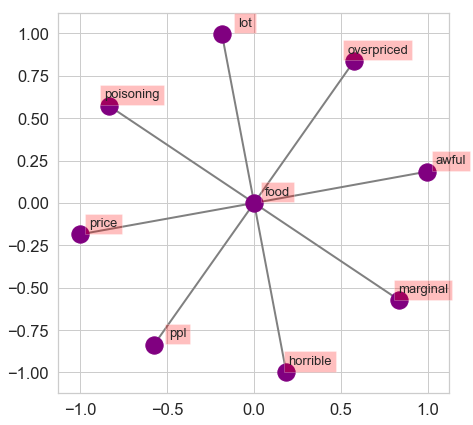

In [788]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 1))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(7, 7))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=20,
                 width=2,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

### plot evolution of ratings per month

In [515]:
shaws.sort_values('datePublished', ascending=True, inplace=True)
shaws['review_month_year'] = shaws.datePublished.apply(lambda x : x[:7])

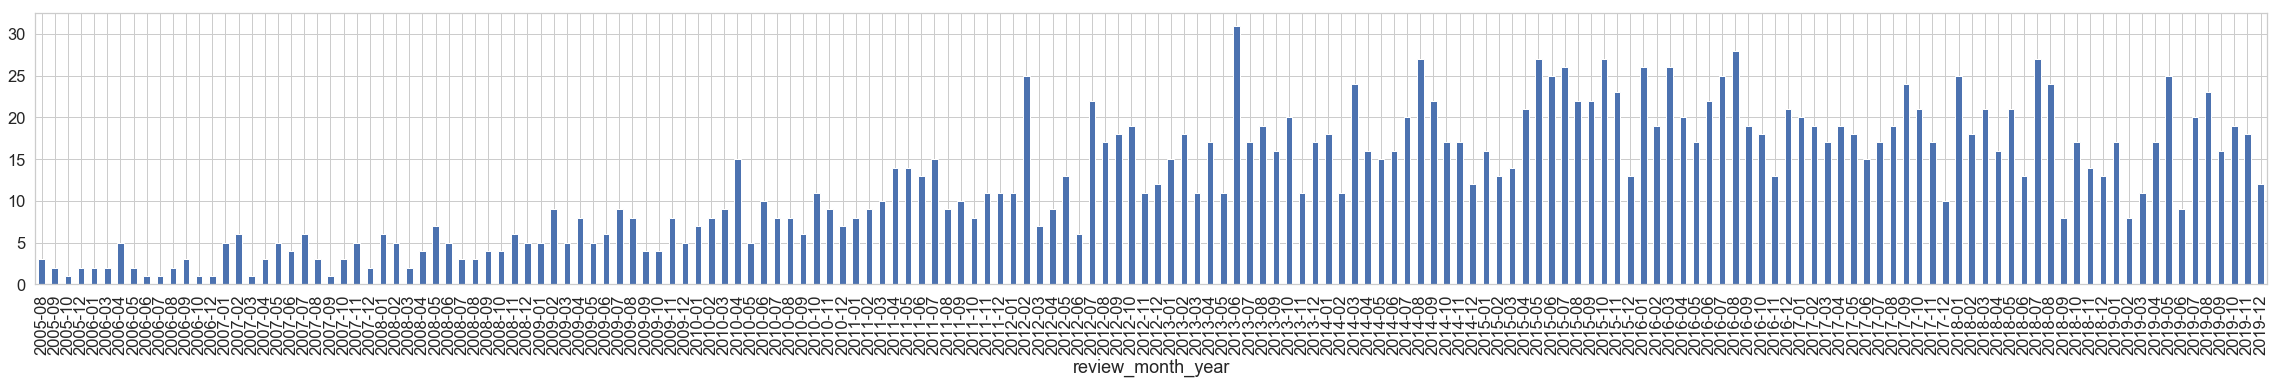

In [516]:
plt.figure(figsize=(40,5))
shaws.groupby('review_month_year')['rating'].count().plot(kind='bar')

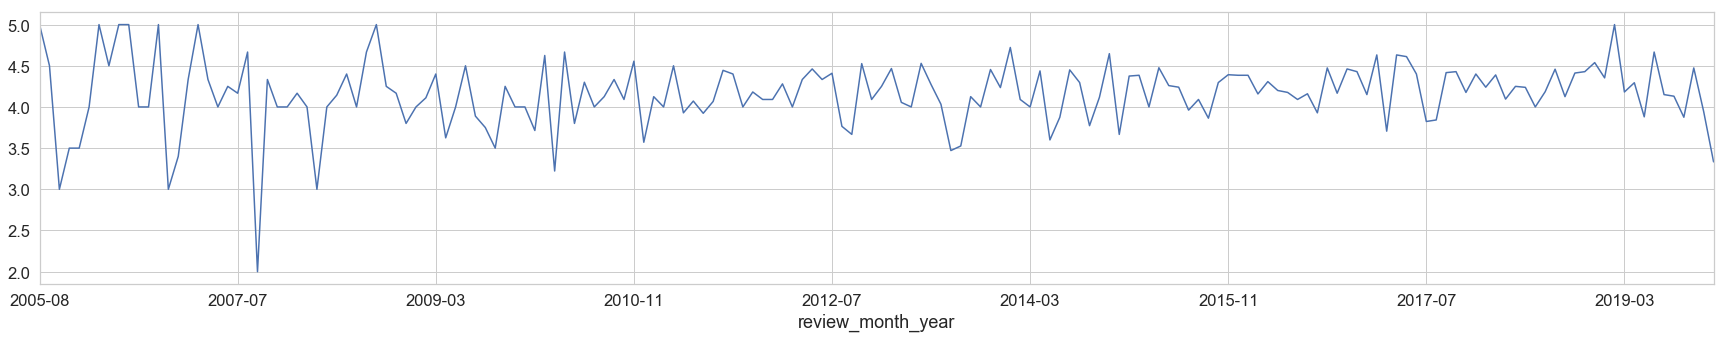

In [517]:
plt.figure(figsize=(30,5))
shaws.groupby('review_month_year')['rating'].mean().plot()

### Adding inspection dates to the plot

In [518]:
shaws_inspections.sort_values('Inspection Date', ascending=True, inplace=True)
shaws_inspections['inspection_month_year'] = shaws_inspections['Inspection Date'].apply(lambda x : x[:7])
shaws_inspections.head()

Inspection ID          DBA Name        AKA Name  License # Facility Type  \
0         413439  shaws crab house  ShawsCrabHouse     9278.0    restaurant   
1         114568  shaws crab house  ShawsCrabHouse     9278.0    restaurant   
2         575218  shaws crab house  ShawsCrabHouse     9278.0    restaurant   
3         634460  shaws crab house  ShawsCrabHouse     9278.0    restaurant   
4        1138501  shaws crab house  ShawsCrabHouse     9278.0    restaurant   

            Risk          Address      Zip Inspection Date Inspection Type  \
0  Risk 1 (High)  21 E HUBBARD ST  60611.0      2010-09-14         canvass   
1  Risk 1 (High)  21 E HUBBARD ST  60611.0      2010-10-04       complaint   
2  Risk 1 (High)  21 E HUBBARD ST  60611.0      2011-08-30         canvass   
3  Risk 1 (High)  21 E HUBBARD ST  60611.0      2011-09-02       complaint   
4  Risk 1 (High)  21 E HUBBARD ST  60611.0      2012-09-19         canvass   

   ...                                 Violation comments  \
0  ...  ['The walls and ceilings shall be in good repa...   
1  ...                                               ['']   
2  ...  ['ALL CUTTING BOARDS WITH DEEP/DARK GROOVES MU...   
3  ...                                               ['']   
4  ...  ['INTERIOR SURFACES OF ICE MAKER NOT CLEAN ARO...   

  Violation score minor  Violation score serious  Violation score critical  \
0                     3                        0                         0   
1                     0                        0                         0   
2                     4                        0                         0   
3                     0                        0                         0   
4                     4                        0                         0   

  Risk number  Inspection Type exact   Fail  Pass Pass w/ Conditions  \
0           1                Canvass  False  True              False   
1           1   Short Form Complaint  False  True              False   
2           1                Canvass  False  True              False   
3           1   Short Form Complaint  False  True              False   
4           1                Canvass  False  True              False   

  inspection_month_year  
0               2010-09  
1               2010-10  
2               2011-08  
3               2011-09  
4               2012-09  

[5 rows x 30 columns]

In [649]:
shaws_inspections1 = shaws_inspections[['Inspection ID','inspection_month_year', 'Inspection Type exact', 'Fail', 'Pass', 'Pass w/ Conditions' ]]
shaws_inspections1

Inspection ID inspection_month_year  \
0          413439               2010-09   
1          114568               2010-10   
2          575218               2011-08   
3          634460               2011-09   
4         1138501               2012-09   
5         1360908               2013-09   
6         1439509               2014-09   
7         1496932               2014-09   
8         1497056               2014-09   
9         1497077               2014-09   
11        1497710               2014-10   
10        1497716               2014-10   
12        1512909               2014-12   
13        1532263               2015-03   
14        1559839               2015-07   
15        1447954               2015-08   
16        1932361               2016-06   
17        1932759               2016-06   
18        1966211               2016-10   
19        2065106               2017-06   
20        2081558               2017-09   
21        2129905               2018-01   
22        2201118               2018-08   
23        2222561               2018-09   

                     Inspection Type exact   Fail   Pass  Pass w/ Conditions  
0                                  Canvass  False   True               False  
1                     Short Form Complaint  False   True               False  
2                                  Canvass  False   True               False  
3                     Short Form Complaint  False   True               False  
4                                  Canvass  False   True               False  
5                                  Canvass  False   True               False  
6                                  Canvass  False   True               False  
7                 Suspected Food Poisoning  False  False                True  
8   Suspected Food Poisoning Re-inspection  False   True               False  
9                     Short Form Complaint  False  False                True  
11                    Short Form Complaint  False  False                True  
10                    Short Form Complaint  False   True               False  
12                    Short Form Complaint  False   True               False  
13                               Complaint  False  False                True  
14                               Complaint  False   True               False  
15                    Short Form Complaint  False   True               False  
16                               Complaint   True  False               False  
17                 Complaint Re-Inspection  False   True               False  
18                               Complaint  False   True               False  
19                                 Canvass  False  False                True  
20                Suspected Food Poisoning  False   True               False  
21                               Complaint  False   True               False  
22                Suspected Food Poisoning  False  False                True  
23                Suspected Food Poisoning  False   True               False

In [650]:
insp_types = shaws_inspections1.groupby(['inspection_month_year'])['Inspection Type exact'].apply(lambda x: ','.join(x)).reset_index()
insp_types

inspection_month_year                              Inspection Type exact
0                2010-09                                            Canvass
1                2010-10                               Short Form Complaint
2                2011-08                                            Canvass
3                2011-09                               Short Form Complaint
4                2012-09                                            Canvass
5                2013-09                                            Canvass
6                2014-09  Canvass,Suspected Food Poisoning,Suspected Foo...
7                2014-10          Short Form Complaint,Short Form Complaint
8                2014-12                               Short Form Complaint
9                2015-03                                          Complaint
10               2015-07                                          Complaint
11               2015-08                               Short Form Complaint
12               2016-06                  Complaint,Complaint Re-Inspection
13               2016-10                                          Complaint
14               2017-06                                            Canvass
15               2017-09                           Suspected Food Poisoning
16               2018-01                                          Complaint
17               2018-08                           Suspected Food Poisoning
18               2018-09                           Suspected Food Poisoning

In [651]:
from matplotlib.pyplot import text

In [653]:
shaws1 = pd.DataFrame(shaws.groupby('review_month_year')['rating'].mean())
shaws1.reset_index(inplace=True)
shaws1[55:]

review_month_year    rating
55            2010-06  4.300000
56            2010-07  4.000000
57            2010-08  4.125000
58            2010-09  4.333333
59            2010-10  4.090909
..                ...       ...
165           2019-08  4.130435
166           2019-09  3.875000
167           2019-10  4.473684
168           2019-11  3.944444
169           2019-12  3.333333

[115 rows x 2 columns]

In [655]:
shaws1 = shaws1[shaws1.review_month_year >= '2010-01']
shaws1

review_month_year    rating
50            2010-01  3.714286
51            2010-02  4.625000
52            2010-03  3.222222
53            2010-04  4.666667
54            2010-05  3.800000
..                ...       ...
165           2019-08  4.130435
166           2019-09  3.875000
167           2019-10  4.473684
168           2019-11  3.944444
169           2019-12  3.333333

[120 rows x 2 columns]

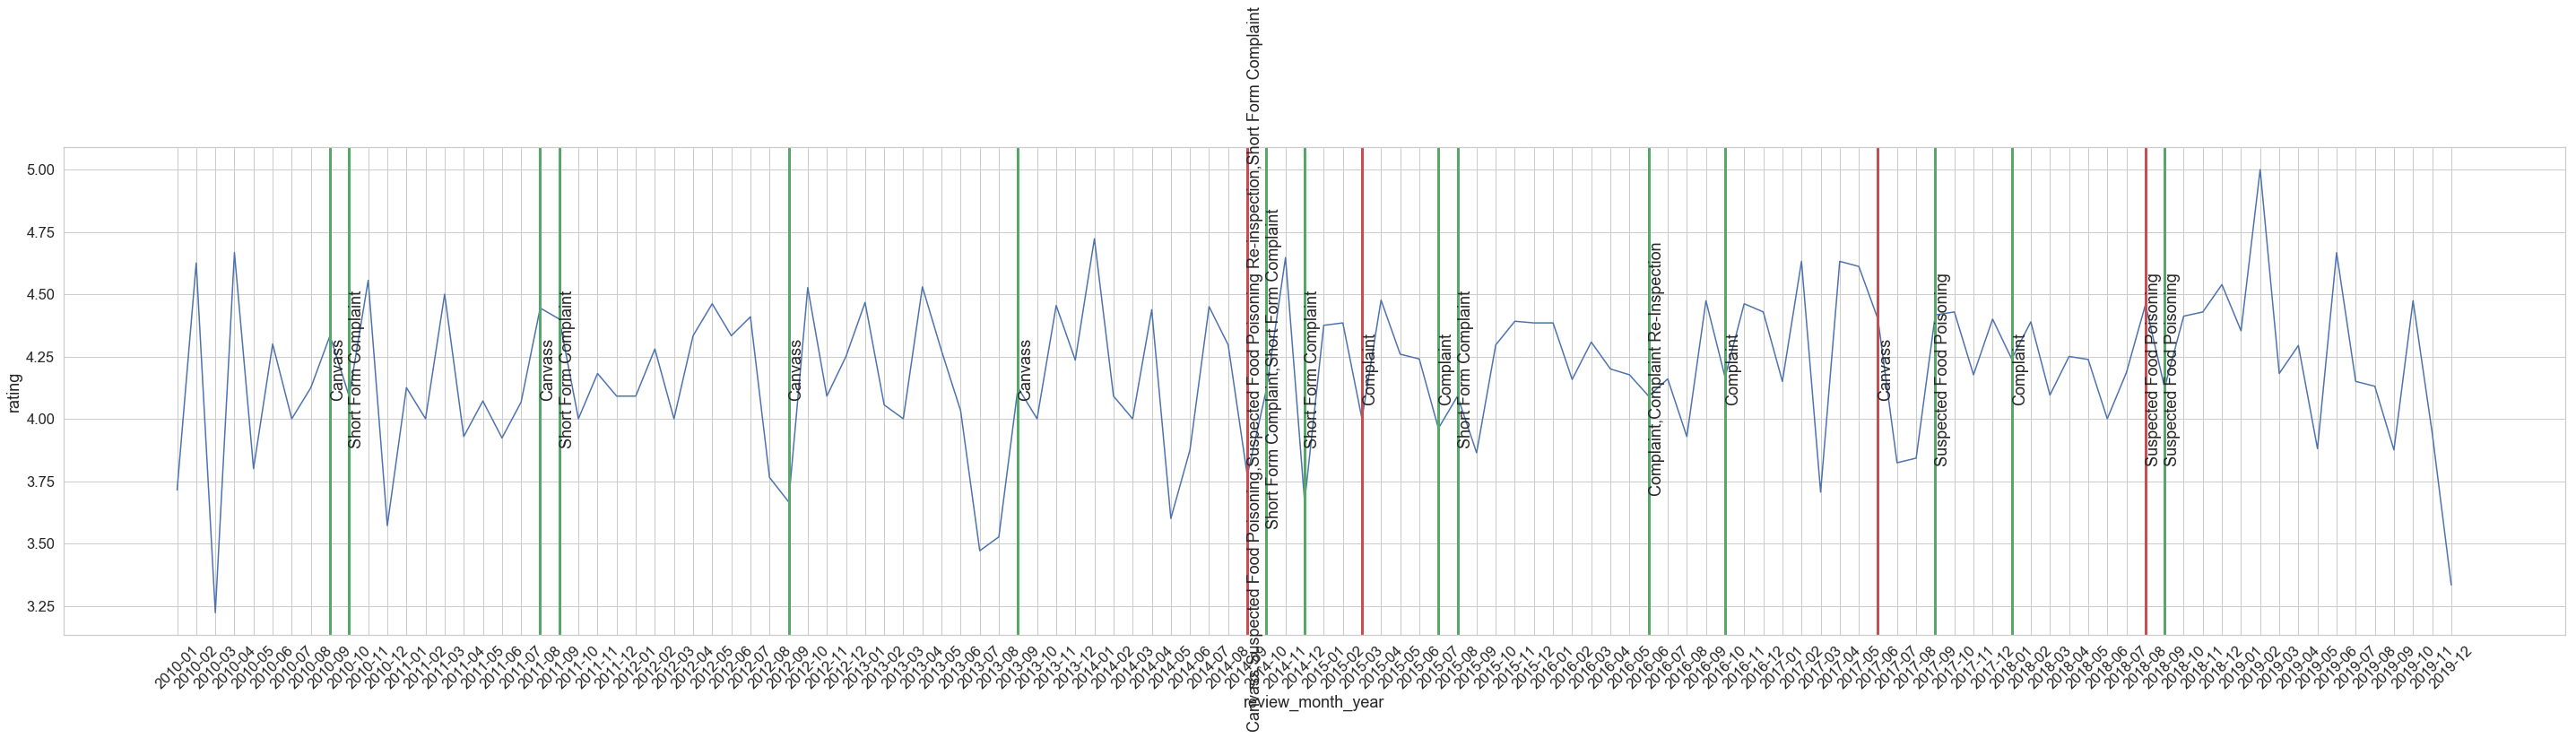

In [657]:
plt.figure(figsize=(50,10))
ax = sns.lineplot(x="review_month_year", y="rating", data=shaws1)
ax.set_xticklabels(shaws1.review_month_year.values.tolist(), rotation=45)
for index, row in shaws_inspections1.iterrows():
    
    if row.Pass == True :
        color = 'g'
    elif row.Fail == True :
        color == 'r'
    elif row['Pass w/ Conditions'] == True :
        color = 'r'
        
    plt.axvline(x=row['inspection_month_year'], color=color, linestyle='-', linewidth=3)
    
for index, row in insp_types.iterrows():
    text(row['inspection_month_year'], 4.2, row['Inspection Type exact'], rotation=90, verticalalignment='center')
plt.savefig('pp.png')

## observing the reviews before and after inspections :
2017-06

In [527]:
shaws.head()

datePublished                                        description  \
2149    2005-08-22  Best seafood I have ever had!  A little on the...   
2057    2005-08-22  Surprisingly, a top quality seafood palace in ...   
1282    2005-08-26  This well-established restaurant is one of the...   
1800    2005-09-09  If it wasn't for the food here, I would have d...   
2065    2005-09-14  being from the east coast I am pretty fussy ab...   

          author                     alias  rating  \
2149  Valerie S.  shaws-crab-house-chicago       5   
2057  Gourmet G.  shaws-crab-house-chicago       5   
1282     Bill M.  shaws-crab-house-chicago       5   
1800      Dee W.  shaws-crab-house-chicago       4   
2065     Doug p.  shaws-crab-house-chicago       5   

                                   description_filtered  sentiment_analysis  \
2149  best seafood ever little pricey side well wort...            0.323207   
2057  surprisingly top quality seafood palace shadow...            0.048864   
1282  wellestablished restaurant one primetime seafo...            0.290741   
1800  wasnt food would ditched blind date long ago c...            0.232143   
2065  east coast pretty fussy seafood say place top ...            0.375000   

     review_month_year  
2149           2005-08  
2057           2005-08  
1282           2005-08  
1800           2005-09  
2065           2005-09

In [541]:
shaws2 = shaws[shaws['review_month_year'].isin(['2014-07','2014-06', '2014-05', '2014-04'])].sort_values(by=['sentiment_analysis'])

In [542]:
shaws2[:10].description.values.tolist()

["**AYCE** Sunday Brunch review.\n\nPricey, but choices are great & almost everything was pretty wonderful.  Was worth it for me b/c I focused on the cold bar.... hehe\n\nIt's split into sections: hot food, cold bar, misc, omelette & sweets\n\nHighlights:\nCold bar: Oysters, King Crab legs, spicy tuna rolls & cocktail shrimp.  (most of my belly was fed here).....  =9  \nHot food: Bacon on crack (OMG).  They have steamed crab legs, but I'd get it from the cold bar.  The hot ones, are a lil salty & mushy\nMisc: Ceviche, Lox & Caprese\nOmelette station: Create your omelette or pancake\nSweets: Cake pop.  Chocolate cakeyfudgy greatness.\n\nDrinks:\nAdd your own stuffz bloody mary's\nBlood Orange Mimosas\n\nOnly thing is all the crab legs are cut weird.  You get the weird parts (which can be discarded - no biggie).  But they cut around the joint instead of at the joint.  WEIRD.  Just means, gotta get more, I guess & more work to crack.  =P",
 "We ate here for Mother's day weekend on a Satur

### Giordanos


In [442]:
reviews.alias.unique()

array(['shaws-crab-house-chicago', "Giordano's", 'ghareeb-nawaz-chicago',
       'ginos-east-magnificent-mile-chicago',
       'iyanze-restaurant-bar-and-cafe-chicago-2', 'chilis-too-chicago-3',
       'dominos-pizza-chicago-22', 'mcdonalds-chicago-70',
       'mcdonalds-chicago-95', 'mcdonalds-chicago-19',
       'chipotle-mexican-grill-chicago-29', 'giordanos-chicago-19'],
      dtype=object)

In [443]:
giordanos = reviews[reviews['alias'] == "Giordano's"]

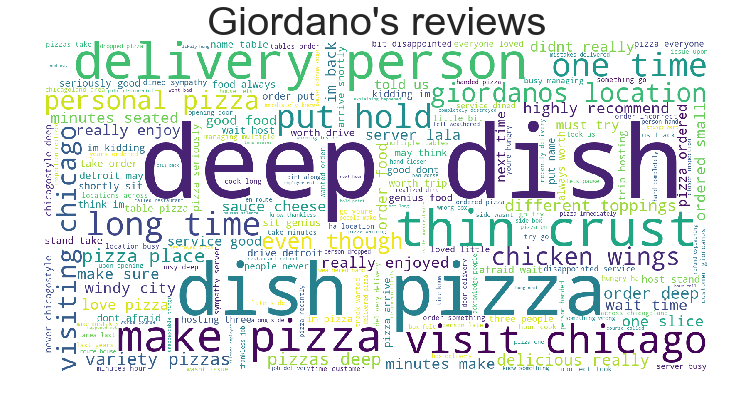

In [444]:
wc = WordCloud(background_color="white",width=1600, height=800, random_state=1, max_words=200)
# Join all strings together from the filtered description column to obtain all review text for the restaurant
wc.generate(' '.join(giordanos['description_filtered']))


plt.figure(figsize=(15,10))
# Add title to figure
plt.title("Giordano's reviews", fontsize=40)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=10)

In [445]:
# We get the 20 most occuring words over the reviews. 

# Pass the split_it list to instance of Counter class. 
splitted = giordanos['description_filtered'].apply(lambda x: x.split()).to_list()
flatten = [item for sublist in splitted for item in sublist]
counter = Counter(flatten) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = counter.most_common(20) 
most_occur

[('pizza', 6118),
 ('deep', 3192),
 ('dish', 3192),
 ('cheese', 2261),
 ('order', 1862),
 ('giordanos', 1729),
 ('chicago', 1729),
 ('time', 1596),
 ('wait', 1463),
 ('would', 1463),
 ('good', 1330),
 ('go', 1330),
 ('ordered', 1330),
 ('even', 1330),
 ('crust', 1330),
 ('service', 1197),
 ('us', 1197),
 ('food', 1064),
 ('location', 1064),
 ('minutes', 1064)]

In [446]:
#Now we add a column which has the sentiment values of the each review posted for BBQ Supply Co, to see how the 
#author of this review feels about the restaurant.

#Create Text Blob Object and draw out the sentiment of each review by returning a value between -1.0 (extreme negative) 
#and 1.0 (extreme positive).
giordanos['sentiment_analysis'] = giordanos['description_filtered'].apply(lambda x: TextBlob(x).sentiment.polarity)
giordanos = giordanos.sort_values(by='sentiment_analysis', ascending=True)
giordanos[:10]

datePublished                                        description  \
2318    2019-12-09  I have been a long time customer of Giordano's...   
4638    2019-12-09  I have been a long time customer of Giordano's...   
2618    2019-12-09  I have been a long time customer of Giordano's...   
3618    2019-12-09  I have been a long time customer of Giordano's...   
3238    2019-12-09  I have been a long time customer of Giordano's...   
2918    2019-12-09  I have been a long time customer of Giordano's...   
4318    2019-12-09  I have been a long time customer of Giordano's...   
3638    2019-12-09  I have been a long time customer of Giordano's...   
4618    2019-12-09  I have been a long time customer of Giordano's...   
3958    2019-12-09  I have been a long time customer of Giordano's...   

              author       alias  rating  \
2318  Christopher S.  Giordano's       1   
4638  Christopher S.  Giordano's       1   
2618  Christopher S.  Giordano's       1   
3618  Christopher S.  Giordano's       1   
3238  Christopher S.  Giordano's       1   
2918  Christopher S.  Giordano's       1   
4318  Christopher S.  Giordano's       1   
3638  Christopher S.  Giordano's       1   
4618  Christopher S.  Giordano's       1   
3958  Christopher S.  Giordano's       1   

                                   description_filtered  sentiment_analysis  
2318  long time customer giordanos locations across ...           -0.106349  
4638  long time customer giordanos locations across ...           -0.106349  
2618  long time customer giordanos locations across ...           -0.106349  
3618  long time customer giordanos locations across ...           -0.106349  
3238  long time customer giordanos locations across ...           -0.106349  
2918  long time customer giordanos locations across ...           -0.106349  
4318  long time customer giordanos locations across ...           -0.106349  
3638  long time customer giordanos locations across ...           -0.106349  
4618  long time customer giordanos locations across ...           -0.106349  
3958  long time customer giordanos locations across ...           -0.106349

In [447]:
# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in giordanos[:10]['description_filtered']]

# Download stopwords
#nltk.download('stopwords')
#stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


In [448]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

[('long', 'time'),
 ('time', 'customer'),
 ('customer', 'giordanos'),
 ('giordanos', 'locations'),
 ('locations', 'across'),
 ('across', 'chicagoland'),
 ('chicagoland', 'area'),
 ('area', 'last'),
 ('last', 'years'),
 ('years', 'ordered'),
 ('ordered', 'pizza'),
 ('pizza', 'recently'),
 ('recently', 'delivery'),
 ('delivery', 'delivery'),
 ('delivery', 'person'),
 ('person', 'late'),
 ('late', 'side'),
 ('side', 'wasnt'),
 ('wasnt', 'issue'),
 ('issue', 'upon'),
 ('upon', 'opening'),
 ('opening', 'door'),
 ('door', 'delivery'),
 ('delivery', 'person'),
 ('person', 'handed'),
 ('handed', 'pizza'),
 ('pizza', 'immediately'),
 ('immediately', 'knew'),
 ('knew', 'something'),
 ('something', 'wrong'),
 ('wrong', 'box'),
 ('box', 'felt'),
 ('felt', 'weathered'),
 ('weathered', 'hand'),
 ('hand', 'closer'),
 ('closer', 'inspection'),
 ('inspection', 'realized'),
 ('realized', 'dirt'),
 ('dirt', 'along'),
 ('along', 'side'),
 ('side', 'box'),
 ('box', 'delivery'),
 ('delivery', 'person'),
 ('

In [449]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('delivery', 'person'), 40),
 (('put', 'hold'), 20),
 (('long', 'time'), 10),
 (('time', 'customer'), 10),
 (('customer', 'giordanos'), 10),
 (('giordanos', 'locations'), 10),
 (('locations', 'across'), 10),
 (('across', 'chicagoland'), 10),
 (('chicagoland', 'area'), 10),
 (('area', 'last'), 10),
 (('last', 'years'), 10),
 (('years', 'ordered'), 10),
 (('ordered', 'pizza'), 10),
 (('pizza', 'recently'), 10),
 (('recently', 'delivery'), 10),
 (('delivery', 'delivery'), 10),
 (('person', 'late'), 10),
 (('late', 'side'), 10),
 (('side', 'wasnt'), 10),
 (('wasnt', 'issue'), 10)]

bi = []
for i in range(len(bigrams)) :
    if bigrams[i][0] == 'bad' or bigrams[i][1] == 'food':
        print(bigrams[i])
        bi.append(bigrams[i])

bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

In [450]:
bi = []
for i in range(len(bigrams)) :
    if (bigrams[i][0] == 'food' and negative_words.negative.str.contains(bigrams[i][1]).any()) or (negative_words.negative.str.contains(bigrams[i][0]).any() and bigrams[i][1] == 'food') or bigrams[i][0] == 'food' or bigrams[i][1] == 'food':
        print(bigrams[i])
        bi.append(bigrams[i])

In [451]:
bigram_counts = collections.Counter(bi)

In [452]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

Empty DataFrame
Columns: [bigram, count]
Index: []

In [239]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(25, 20))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

IndexError: list index out of range

### plot evolution of ratings per month

In [ ]:
giordanos.sort_values('datePublished', ascending=True, inplace=True)
giordanos['review_month_year'] = giordanos.datePublished.apply(lambda x : x[:7])

In [ ]:
giordanos.review_month_year.unique()

In [ ]:
giordanos.groupby('review_month_year')['rating'].count()

In [ ]:
plt.figure(figsize=(10,5))
giordanos.groupby('review_month_year')['rating'].count().plot(kind='bar')

In [ ]:
plt.figure(figsize=(10,5))
giordanos.groupby('review_month_year')['rating'].mean().plot()

### chipotle


In [280]:
chipotle = reviews[reviews['alias'] == "chipotle-mexican-grill-chicago-29"]

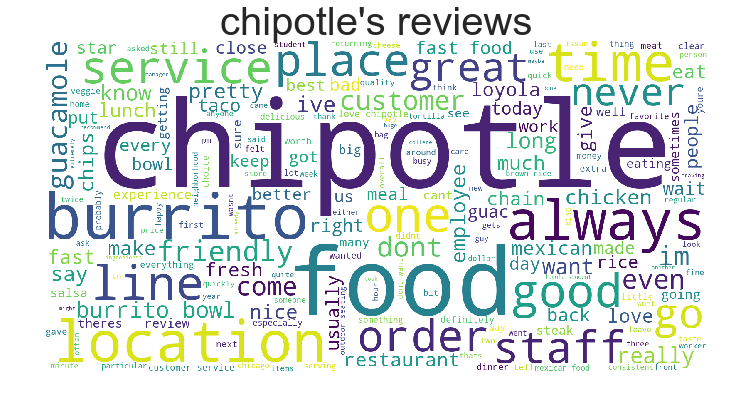

In [281]:
wc = WordCloud(background_color="white",width=1600, height=800, random_state=1, max_words=200)
# Join all strings together from the filtered description column to obtain all review text for the restaurant
wc.generate(' '.join(chipotle['description_filtered']))


plt.figure(figsize=(15,10))
# Add title to figure
plt.title("chipotle's reviews", fontsize=40)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=10)

In [282]:
# We get the 20 most occuring words over the reviews. 

# Pass the split_it list to instance of Counter class. 
splitted = chipotle['description_filtered'].apply(lambda x: x.split()).to_list()
flatten = [item for sublist in splitted for item in sublist]
counter = Counter(flatten) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = counter.most_common(20) 
most_occur

[('chipotle', 115),
 ('food', 86),
 ('burrito', 66),
 ('always', 46),
 ('location', 43),
 ('get', 42),
 ('service', 39),
 ('like', 38),
 ('good', 32),
 ('one', 31),
 ('staff', 30),
 ('line', 30),
 ('time', 29),
 ('bowl', 28),
 ('fast', 28),
 ('go', 27),
 ('place', 27),
 ('dont', 27),
 ('order', 26),
 ('great', 25)]

In [283]:
#Now we add a column which has the sentiment values of the each review posted for BBQ Supply Co, to see how the 
#author of this review feels about the restaurant.

#Create Text Blob Object and draw out the sentiment of each review by returning a value between -1.0 (extreme negative) 
#and 1.0 (extreme positive).
chipotle['sentiment_analysis'] = chipotle['description_filtered'].apply(lambda x: TextBlob(x).sentiment.polarity)
chipotle = chipotle.sort_values(by='sentiment_analysis', ascending=True)
chipotle[:10]

datePublished                                        description  \
8513    2014-03-08  Horrible customer service they even refused to...   
8503    2015-09-10  Worst chipotle ever. Never prepared for lunch ...   
8492    2016-07-05  This location never ceases to disappoint. Afte...   
8526    2013-10-08  Horrible customer service. Employees rush cust...   
8461    2018-06-17  I came to Chipotle for a late night meal and o...   
8562    2011-03-04  Worst service!!!  Food under-cooked, overcooke...   
8468    2018-12-16  Got a the steak burrito today and the meat was...   
8532    2009-07-21  My roommate and I are regulars here. It's disg...   
8460    2019-02-01  By far THE worst chipotle ever... their people...   
8502    2015-11-05  The quality of the food is inconsistent. Somet...   

          author                              alias  rating  \
8513     Tony M.  chipotle-mexican-grill-chicago-29       1   
8503  Leticia G.  chipotle-mexican-grill-chicago-29       1   
8492    Jason S.  chipotle-mexican-grill-chicago-29       2   
8526   Angela D.  chipotle-mexican-grill-chicago-29       1   
8461     Adis N.  chipotle-mexican-grill-chicago-29       1   
8562     Lisa S.  chipotle-mexican-grill-chicago-29       1   
8468    Usama H.  chipotle-mexican-grill-chicago-29       2   
8532    Chris M.  chipotle-mexican-grill-chicago-29       4   
8460    Eliza G.  chipotle-mexican-grill-chicago-29       1   
8502     Dave P.  chipotle-mexican-grill-chicago-29       3   

                                   description_filtered  sentiment_analysis  
8513  horrible customer service even refused cut bur...           -0.583333  
8503  worst chipotle ever never prepared lunch hours...           -0.500000  
8492  location never ceases disappoint sixmonth hiat...           -0.471429  
8526  horrible customer service employees rush custo...           -0.412500  
8461  came chipotle late night meal ordered go meal ...           -0.325000  
8562  worst service food undercooked overcooked dont...           -0.230000  
8468  got steak burrito today meat cold wrote chipot...           -0.202083  
8532  roommate regulars disgusting quite honest food...           -0.193750  
8460  far worst chipotle ever people rude care deliv...           -0.173469  
8502  quality food inconsistent sometimes ive gotten...           -0.170000

In [284]:
# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in chipotle[:10]['description_filtered']]

# Download stopwords
#nltk.download('stopwords')
#stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


In [285]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

[('horrible', 'customer'),
 ('customer', 'service'),
 ('service', 'even'),
 ('even', 'refused'),
 ('refused', 'cut'),
 ('cut', 'burrito'),
 ('burrito', 'half'),
 ('half', 'told'),
 ('told', 'use'),
 ('use', 'plastic'),
 ('plastic', 'knife'),
 ('knife', 'napkins'),
 ('napkins', 'tore'),
 ('tore', 'burrito'),
 ('burrito', 'practically'),
 ('practically', 'made'),
 ('made', 'burrito'),
 ('burrito', 'bowl'),
 ('bowl', 'smh')]

In [286]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('burrito', 'bowl'), 3),
 (('worst', 'chipotle'), 3),
 (('horrible', 'customer'), 2),
 (('customer', 'service'), 2),
 (('chipotle', 'ever'), 2),
 (('come', 'back'), 2),
 (('customers', 'line'), 2),
 (('service', 'food'), 2),
 (('steak', 'burrito'), 2),
 (('service', 'even'), 1),
 (('even', 'refused'), 1),
 (('refused', 'cut'), 1),
 (('cut', 'burrito'), 1),
 (('burrito', 'half'), 1),
 (('half', 'told'), 1),
 (('told', 'use'), 1),
 (('use', 'plastic'), 1),
 (('plastic', 'knife'), 1),
 (('knife', 'napkins'), 1),
 (('napkins', 'tore'), 1)]

bi = []
for i in range(len(bigrams)) :
    if bigrams[i][0] == 'bad' or bigrams[i][1] == 'food':
        print(bigrams[i])
        bi.append(bigrams[i])

bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

In [287]:
bi = []
for i in range(len(bigrams)) :
    if (bigrams[i][0] == 'food' and negative_words.negative.str.contains(bigrams[i][1]).any()) or (negative_words.negative.str.contains(bigrams[i][0]).any() and bigrams[i][1] == 'food') or (bigrams[i][0] == 'food' or bigrams[i][1] == 'food'):
        print(bigrams[i])
        bi.append(bigrams[i])

('tree', 'food')
('food', 'already')
('mixed', 'food')
('food', 'leaf')
('service', 'food')
('food', 'undercooked')
('honest', 'food')
('food', 'fact')
('service', 'food')
('quality', 'food')
('food', 'inconsistent')


In [288]:
bigram_counts = collections.Counter(bi)

In [289]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

bigram  count
0       (service, food)      2
1          (tree, food)      1
2       (food, already)      1
3         (mixed, food)      1
4          (food, leaf)      1
5   (food, undercooked)      1
6        (honest, food)      1
7          (food, fact)      1
8       (quality, food)      1
9  (food, inconsistent)      1

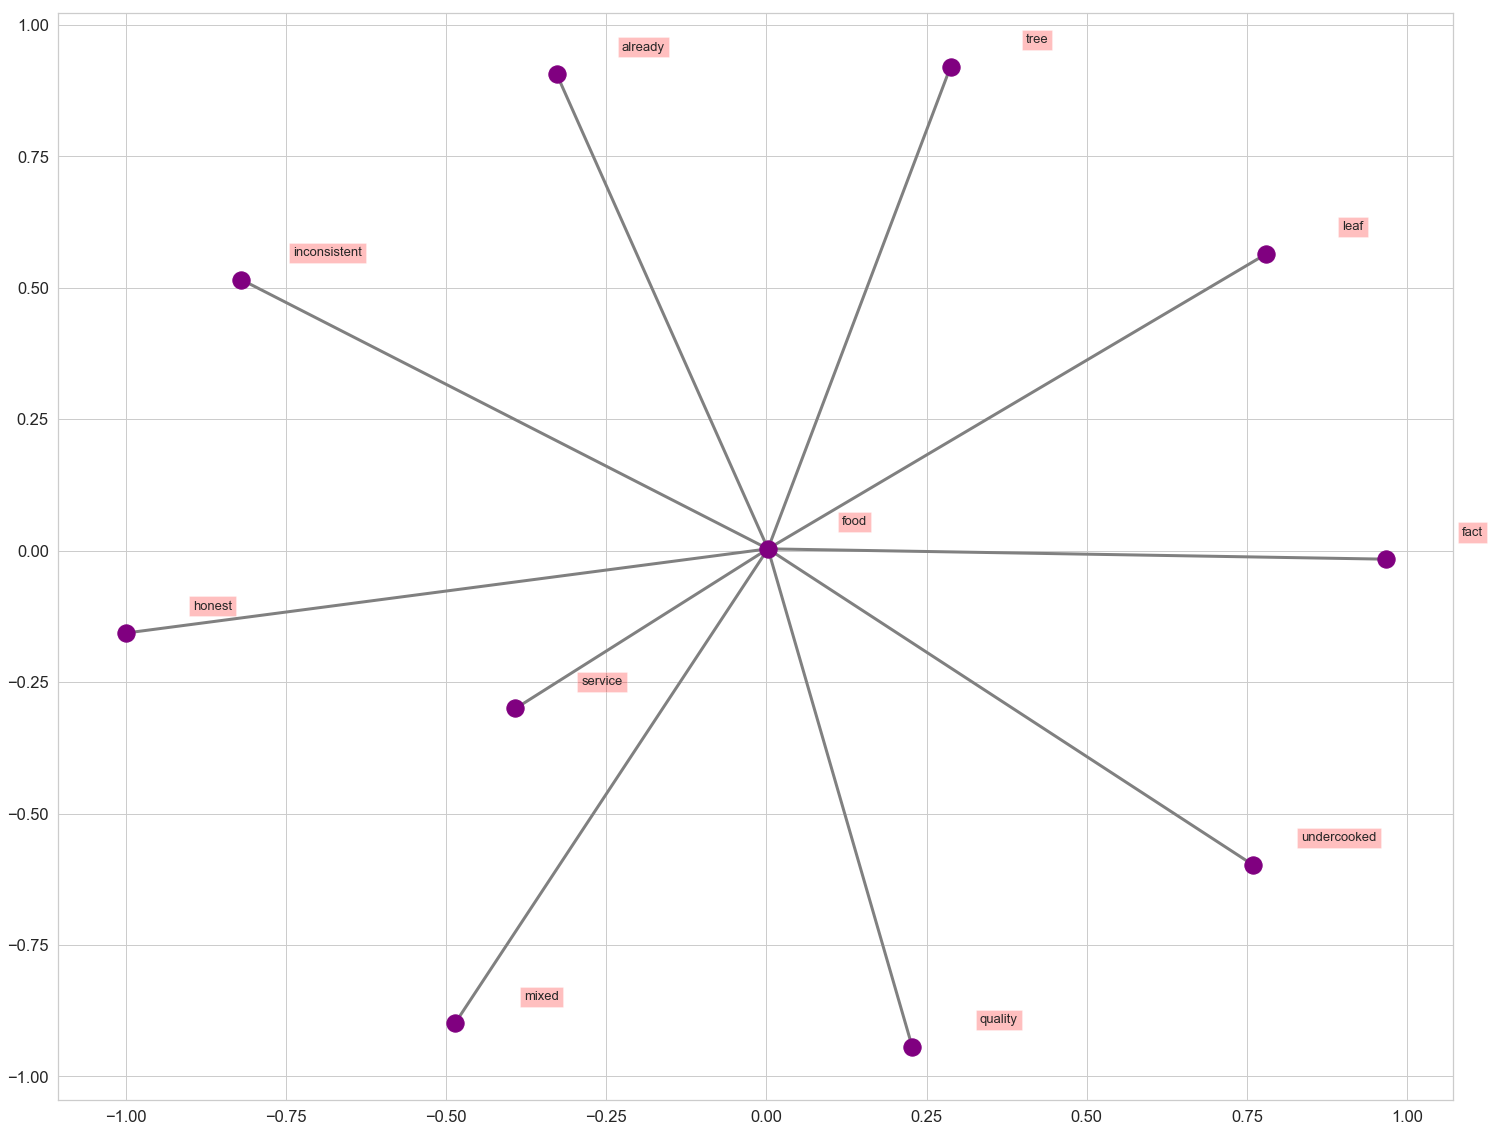

In [290]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(25, 20))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

### plot evolution of ratings per month

In [291]:
chipotle.sort_values('datePublished', ascending=True, inplace=True)
chipotle['review_month_year'] = chipotle.datePublished.apply(lambda x : x[:7])

In [292]:
chipotle.review_month_year.unique()

array(['2007-09', '2007-10', '2007-12', '2008-01', '2008-03', '2008-06',
       '2008-08', '2008-09', '2008-11', '2009-01', '2009-04', '2009-05',
       '2009-07', '2009-09', '2009-11', '2010-01', '2010-04', '2010-07',
       '2010-08', '2010-09', '2010-10', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-08', '2011-09', '2011-10', '2012-01', '2012-07',
       '2012-09', '2013-01', '2013-03', '2013-06', '2013-08', '2013-09',
       '2013-10', '2013-11', '2014-01', '2014-02', '2014-03', '2014-05',
       '2014-06', '2014-07', '2014-08', '2014-10', '2015-01', '2015-03',
       '2015-04', '2015-05', '2015-06', '2015-09', '2015-10', '2015-11',
       '2016-01', '2016-03', '2016-05', '2016-06', '2016-07', '2016-09',
       '2016-10', '2016-12', '2017-01', '2017-06', '2017-07', '2017-08',
       '2017-12', '2018-01', '2018-02', '2018-03', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-10', '2018-11', '2018-12', '2019-01',
       '2019-02', '2019-03', '2019-04', '2019-05', 

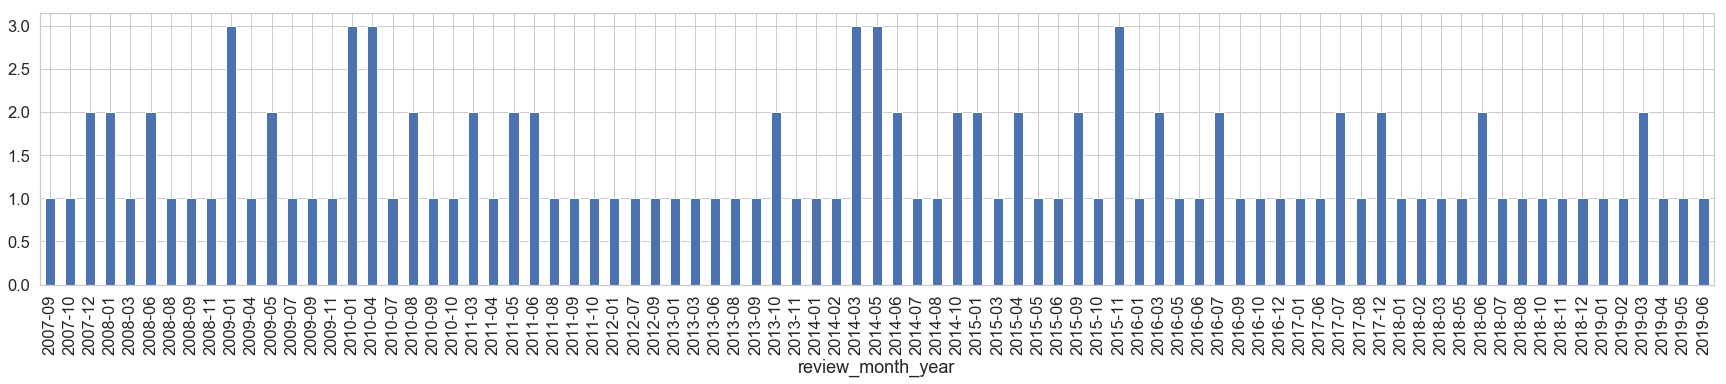

In [293]:
plt.figure(figsize=(30,5))
chipotle.groupby('review_month_year')['rating'].count().plot(kind='bar')

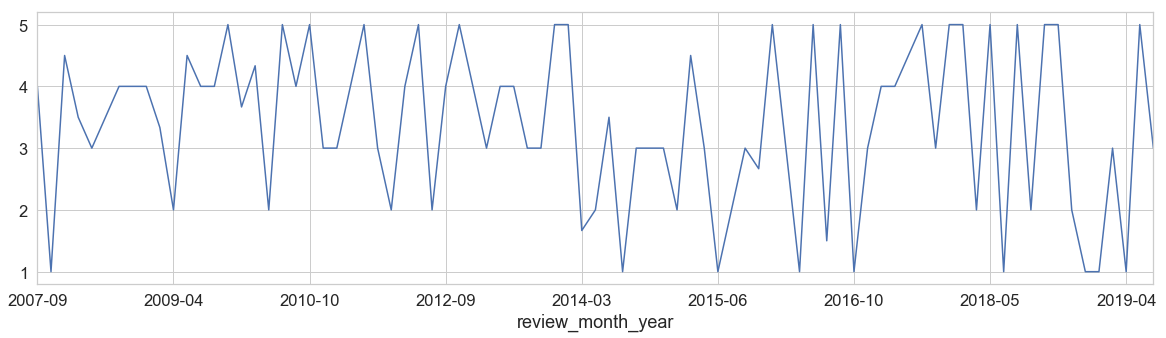

In [294]:
plt.figure(figsize=(20,5))
chipotle.groupby('review_month_year')['rating'].mean().plot()

### chilis


In [295]:
chilis = reviews[reviews['alias'] == "chilis-too-chicago-3"]

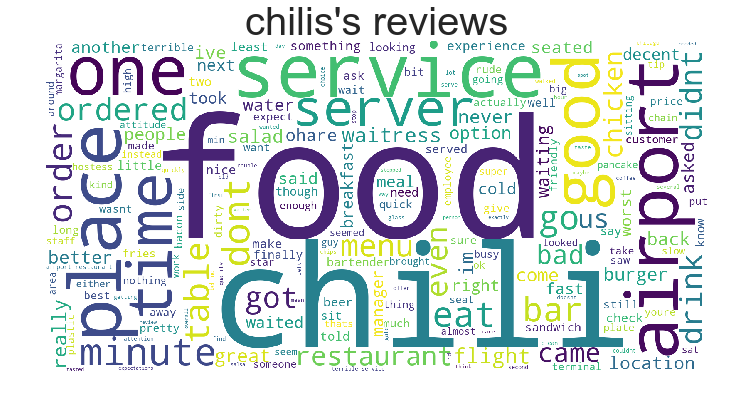

In [296]:
wc = WordCloud(background_color="white",width=1600, height=800, random_state=1, max_words=200)
# Join all strings together from the filtered description column to obtain all review text for the restaurant
wc.generate(' '.join(chilis['description_filtered']))


plt.figure(figsize=(15,10))
# Add title to figure
plt.title("chilis's reviews", fontsize=40)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=10)

In [297]:
# We get the 20 most occuring words over the reviews. 

# Pass the split_it list to instance of Counter class. 
splitted = chilis['description_filtered'].apply(lambda x: x.split()).to_list()
flatten = [item for sublist in splitted for item in sublist]
counter = Counter(flatten) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = counter.most_common(20) 
most_occur

[('food', 131),
 ('chilis', 93),
 ('service', 93),
 ('airport', 78),
 ('get', 78),
 ('good', 65),
 ('one', 60),
 ('place', 58),
 ('minutes', 53),
 ('time', 47),
 ('dont', 46),
 ('like', 44),
 ('server', 41),
 ('order', 41),
 ('eat', 41),
 ('menu', 40),
 ('would', 39),
 ('bar', 39),
 ('go', 38),
 ('ordered', 37)]

In [298]:
#Now we add a column which has the sentiment values of the each review posted for BBQ Supply Co, to see how the 
#author of this review feels about the restaurant.

#Create Text Blob Object and draw out the sentiment of each review by returning a value between -1.0 (extreme negative) 
#and 1.0 (extreme positive).
chilis['sentiment_analysis'] = chilis['description_filtered'].apply(lambda x: TextBlob(x).sentiment.polarity)
chilis = chilis.sort_values(by='sentiment_analysis', ascending=True)
chilis[:10]

datePublished                                        description  \
8104    2017-09-14  Terrible service. Waited 20 mins after flaggin...   
8044    2019-07-21  Absolutely horrible!!! Service stank and the w...   
8196    2014-04-17  I get that I'm not going for fancy. But soggy ...   
8173    2014-07-12  Extremely slow!!! I have 45 minutes between fl...   
8027    2019-12-01  The food was terrible. The bar tender was slow...   
8150    2015-07-01  Absolutely terrible.  Stay away.  Terrible ser...   
8093    2016-10-08  This is one of the worst chilis, service is ho...   
8162    2016-12-19  Don't order the chicken enchilada soup. It's d...   
8132    2016-09-08  Worst Chili's ever. No chicken crispers? Come ...   
8026    2019-11-04  Don't bother!!! I ordered the egg rolls and ch...   

            author                 alias  rating  \
8104  Alan Paul P.  chilis-too-chicago-3       1   
8044          J B.  chilis-too-chicago-3       2   
8196          T L.  chilis-too-chicago-3       1   
8173    Xiaoxue G.  chilis-too-chicago-3       1   
8027       Ryan S.  chilis-too-chicago-3       1   
8150      Kevin B.  chilis-too-chicago-3       1   
8093       Jose C.  chilis-too-chicago-3       1   
8162       Kate B.  chilis-too-chicago-3       1   
8132      Billy M.  chilis-too-chicago-3       1   
8026       Anna A.  chilis-too-chicago-3       1   

                                   description_filtered  sentiment_analysis  
8104  terrible service waited mins flagging waitress...           -1.000000  
8044  absolutely horrible service stank worst bloody...           -0.933333  
8196  get im going fancy soggy bread cold fries horr...           -0.800000  
8173  extremely slow minutes flight eat food takes m...           -0.650000  
8027  food terrible bar tender slow even worse food ...           -0.616667  
8150  absolutely terrible stay away terrible service...           -0.527083  
8093  one worst chilis service horrible took min fin...           -0.470000  
8162  dont order chicken enchilada soup disgusting c...           -0.428571  
8132  worst chilis ever chicken crispers come poor s...           -0.400000  
8026  dont bother ordered egg rolls chicken strips c...           -0.397143

In [299]:
# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in chilis[:10]['description_filtered']]

# Download stopwords
#nltk.download('stopwords')
#stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


In [300]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

[('terrible', 'service'),
 ('service', 'waited'),
 ('waited', 'mins'),
 ('mins', 'flagging'),
 ('flagging', 'waitresses'),
 ('waitresses', 'never'),
 ('never', 'offered'),
 ('offered', 'refill'),
 ('refill', 'drink'),
 ('drink', 'either')]

In [301]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('terrible', 'service'), 3),
 (('worst', 'chilis'), 2),
 (('service', 'waited'), 1),
 (('waited', 'mins'), 1),
 (('mins', 'flagging'), 1),
 (('flagging', 'waitresses'), 1),
 (('waitresses', 'never'), 1),
 (('never', 'offered'), 1),
 (('offered', 'refill'), 1),
 (('refill', 'drink'), 1),
 (('drink', 'either'), 1),
 (('absolutely', 'horrible'), 1),
 (('horrible', 'service'), 1),
 (('service', 'stank'), 1),
 (('stank', 'worst'), 1),
 (('worst', 'bloody'), 1),
 (('bloody', 'mary'), 1),
 (('mary', 'ever'), 1),
 (('ever', 'avoid'), 1),
 (('avoid', 'costs'), 1)]

bi = []
for i in range(len(bigrams)) :
    if bigrams[i][0] == 'bad' or bigrams[i][1] == 'food':
        print(bigrams[i])
        bi.append(bigrams[i])

In [302]:
bi = []
for i in range(len(bigrams)) :
    if (bigrams[i][0] == 'food' and negative_words.negative.str.contains(bigrams[i][1]).any()) or (negative_words.negative.str.contains(bigrams[i][0]).any() and bigrams[i][1] == 'food') or (bigrams[i][0] == 'food' or bigrams[i][1] == 'food'):
        print(bigrams[i])
        bi.append(bigrams[i])

('eat', 'food')
('food', 'takes')
('cook', 'food')
('food', 'get')
('food', 'terrible')
('worse', 'food')
('food', 'presidents')
('terrible', 'food')
('food', 'barely')
('drink', 'food')
('food', 'order')
('cold', 'food')
('food', 'beer')


In [303]:
bigram_counts = collections.Counter(bi)

In [304]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

bigram  count
0          (eat, food)      1
1        (food, takes)      1
2         (cook, food)      1
3          (food, get)      1
4     (food, terrible)      1
5        (worse, food)      1
6   (food, presidents)      1
7     (terrible, food)      1
8       (food, barely)      1
9        (drink, food)      1
10       (food, order)      1
11        (cold, food)      1
12        (food, beer)      1

bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

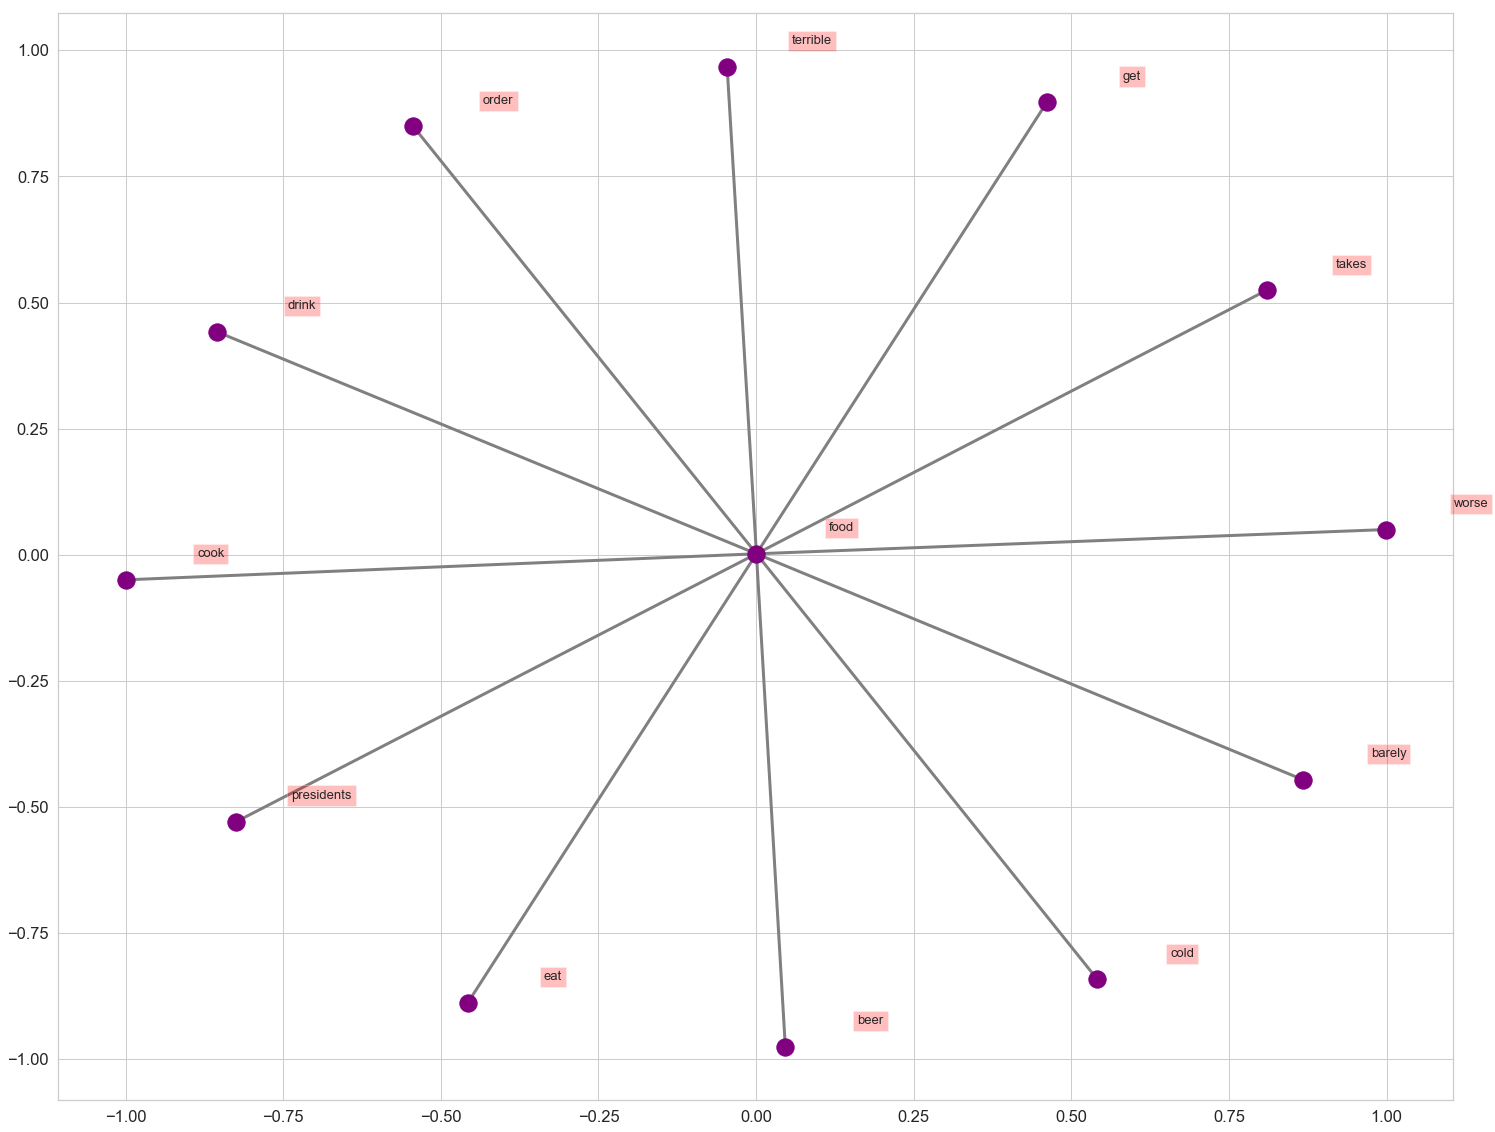

In [305]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(25, 20))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

### plot evolution of ratings per month

In [306]:
chilis.sort_values('datePublished', ascending=True, inplace=True)
chilis['review_month_year'] = chilis.datePublished.apply(lambda x : x[:7])

In [307]:
chilis.review_month_year.unique()

array(['2012-05', '2012-06', '2012-08', '2012-11', '2013-01', '2013-02',
       '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-09',
       '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03',
       '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-10',
       '2014-11', '2015-02', '2015-04', '2015-05', '2015-06', '2015-07',
       '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01',
       '2016-02', '2016-03', '2016-05', '2016-06', '2016-07', '2016-08',
       '2016-09', '2016-10', '2016-12', '2017-03', '2017-04', '2017-05',
       '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11',
       '2017-12', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-12', '2019-01',
       '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07',
       '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'],
      dtype=object)

In [308]:
chilis.groupby('review_month_year')['rating'].count()

review_month_year
2012-05    2
2012-06    1
2012-08    2
2012-11    1
2013-01    1
          ..
2019-08    3
2019-09    4
2019-10    3
2019-11    2
2019-12    2
Name: rating, Length: 77, dtype: int64

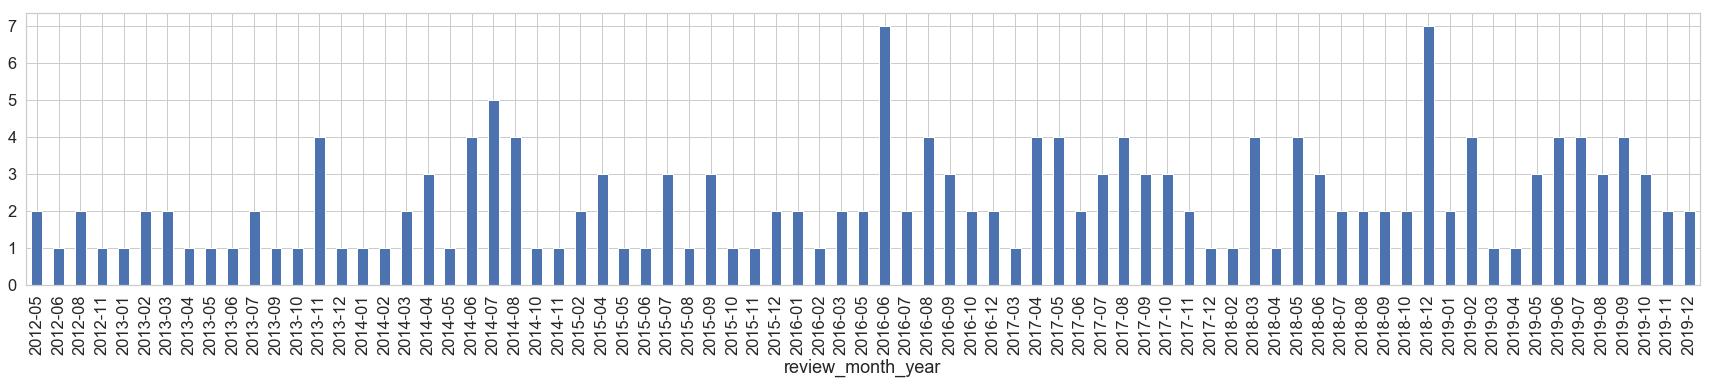

In [309]:
plt.figure(figsize=(30,5))
chilis.groupby('review_month_year')['rating'].count().plot(kind='bar')

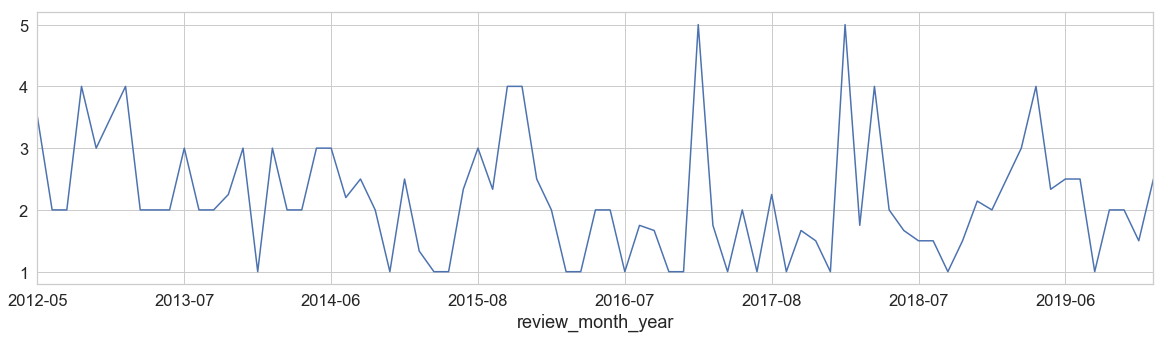

In [310]:
plt.figure(figsize=(20,5))
chilis.groupby('review_month_year')['rating'].mean().plot()

### iyanze


In [311]:
reviews.alias.unique()

array(['shaws-crab-house-chicago', "Giordano's", 'ghareeb-nawaz-chicago',
       'ginos-east-magnificent-mile-chicago',
       'iyanze-restaurant-bar-and-cafe-chicago-2', 'chilis-too-chicago-3',
       'dominos-pizza-chicago-22', 'mcdonalds-chicago-70',
       'mcdonalds-chicago-95', 'mcdonalds-chicago-19',
       'chipotle-mexican-grill-chicago-29'], dtype=object)

In [312]:
iyanze = reviews[reviews['alias'] == "iyanze-restaurant-bar-and-cafe-chicago-2"]

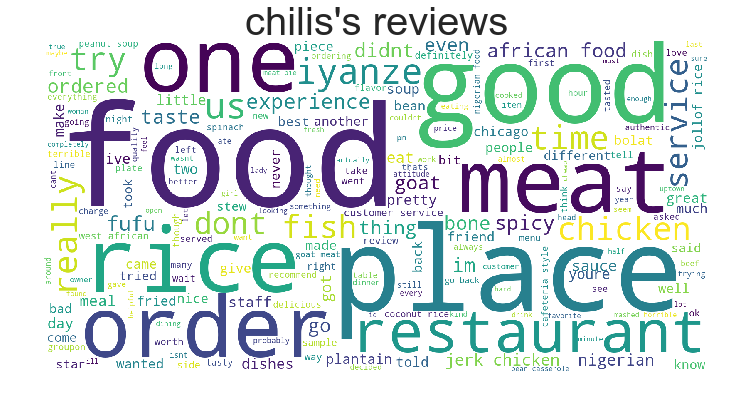

In [313]:
wc = WordCloud(background_color="white",width=1600, height=800, random_state=1, max_words=200)
# Join all strings together from the filtered description column to obtain all review text for the restaurant
wc.generate(' '.join(iyanze['description_filtered']))


plt.figure(figsize=(15,10))
# Add title to figure
plt.title("chilis's reviews", fontsize=40)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=10)

In [314]:
# We get the 20 most occuring words over the reviews. 

# Pass the split_it list to instance of Counter class. 
splitted = iyanze['description_filtered'].apply(lambda x: x.split()).to_list()
flatten = [item for sublist in splitted for item in sublist]
counter = Counter(flatten) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = counter.most_common(20) 
most_occur

[('food', 182),
 ('place', 95),
 ('rice', 83),
 ('good', 81),
 ('meat', 64),
 ('chicken', 58),
 ('one', 54),
 ('african', 51),
 ('order', 50),
 ('like', 49),
 ('service', 48),
 ('would', 43),
 ('get', 43),
 ('us', 42),
 ('iyanze', 41),
 ('goat', 38),
 ('really', 37),
 ('soup', 37),
 ('go', 37),
 ('restaurant', 36)]

In [315]:
#Now we add a column which has the sentiment values of the each review posted for BBQ Supply Co, to see how the 
#author of this review feels about the restaurant.

#Create Text Blob Object and draw out the sentiment of each review by returning a value between -1.0 (extreme negative) 
#and 1.0 (extreme positive).
iyanze['sentiment_analysis'] = iyanze['description_filtered'].apply(lambda x: TextBlob(x).sentiment.polarity)
iyanze = iyanze.sort_values(by='sentiment_analysis', ascending=True)
iyanze[:10]

datePublished                                        description  \
7957    2015-03-18  Terrible service  . The woman who prepared our...   
7921    2019-03-05  Terrible food and service. Went the other day ...   
7994    2013-11-28  I called day before thanksgiving to place an o...   
7966    2012-06-05  WARNING: this place is cafeteria style, do not...   
7959    2013-05-24  We came into this place at 8pm on a Thursday e...   
7951    2016-02-13  Terrible experience!!!\n\nThis place is incred...   
7937    2017-05-10  I'm from Nigeria and can tell you that we do n...   
7932    2019-01-02  I don't know how this place stays in business,...   
7989    2010-06-28  This review is based on what I had at Taste of...   
7954    2014-03-19  First, I was never able to use my Groupon - so...   

            author                                     alias  rating  \
7957      Tlafi K.  iyanze-restaurant-bar-and-cafe-chicago-2       1   
7921      Andre M.  iyanze-restaurant-bar-and-cafe-chicago-2       1   
7994      Funmi J.  iyanze-restaurant-bar-and-cafe-chicago-2       1   
7966       Chad V.  iyanze-restaurant-bar-and-cafe-chicago-2       1   
7959  Stephanie C.  iyanze-restaurant-bar-and-cafe-chicago-2       1   
7951        Amy R.  iyanze-restaurant-bar-and-cafe-chicago-2       1   
7937     Aisosa O.  iyanze-restaurant-bar-and-cafe-chicago-2       1   
7932      Vital E.  iyanze-restaurant-bar-and-cafe-chicago-2       1   
7989    Sabrina M.  iyanze-restaurant-bar-and-cafe-chicago-2       2   
7954       Raji A.  iyanze-restaurant-bar-and-cafe-chicago-2       1   

                                   description_filtered  sentiment_analysis  
7957  terrible service woman prepared go order attit...           -0.500000  
7921  terrible food service went day one men worked ...           -0.400000  
7994  called day thanksgiving place order dozen meat...           -0.266667  
7966  warning place cafeteria style come sitdown din...           -0.250000  
7959  came place pm thursday evening single soul war...           -0.247482  
7951  terrible experience place incredibly disorgani...           -0.191667  
7937  im nigeria tell serve dry meat sits vats day a...           -0.171875  
7932  dont know place stays business food horrible e...           -0.170833  
7989  review based taste chicago based wont likely t...           -0.147571  
7954  first never able use groupon one star food did...           -0.131282

In [316]:
# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in iyanze[:10]['description_filtered']]



# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


In [317]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

[('terrible', 'service'),
 ('service', 'woman'),
 ('woman', 'prepared'),
 ('prepared', 'go'),
 ('go', 'order'),
 ('order', 'attitude'),
 ('attitude', 'food'),
 ('food', 'goat'),
 ('goat', 'meat'),
 ('meat', 'bones'),
 ('bones', 'fat'),
 ('fat', 'jalof'),
 ('jalof', 'rice'),
 ('rice', 'tasted'),
 ('tasted', 'like'),
 ('like', 'night'),
 ('night', 'greasy'),
 ('greasy', 'sad'),
 ('sad', 'dont'),
 ('dont', 'give'),
 ('give', 'damn'),
 ('damn', 'customer'),
 ('customer', 'service'),
 ('service', 'zero'),
 ('zero', 'tolerance'),
 ('tolerance', 'place'),
 ('place', 'go'),
 ('go', 'back')]

In [318]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('jerk', 'chicken'), 6),
 (('customer', 'service'), 4),
 (('use', 'groupon'), 3),
 (('meat', 'bones'), 2),
 (('go', 'back'), 2),
 (('service', 'terrible'), 2),
 (('sits', 'vats'), 2),
 (('vats', 'day'), 2),
 (('one', 'star'), 2),
 (('gotten', 'food'), 2),
 (('groupon', 'ordered'), 2),
 (('sides', 'drinks'), 2),
 (('service', 'bad'), 2),
 (('bite', 'andbone'), 2),
 (('charcoal', 'bits'), 2),
 (('another', 'jerk'), 2),
 (('didnt', 'even'), 2),
 (('weeks', 'ago'), 2),
 (('terrible', 'service'), 1),
 (('service', 'woman'), 1)]

bi = []
for i in range(len(bigrams)) :
    if bigrams[i][0] == 'bad' or bigrams[i][1] == 'food':
        print(bigrams[i])
        bi.append(bigrams[i])

bi = []
for i in range(len(bigrams)) :
    if (bigrams[i][0] == 'food' and bigrams[i][1] == negative_words.negative.any()) or (bigrams[i][0] == negative_words.negative.any() and bigrams[i][1] == 'food'):
        print(bigrams[i])
        bi.append(bigrams[i])

bi = []
for i in range(len(bigrams)) :
    if (bigrams[i][0] == negative_words.negative.any() or bigrams[i][1] == negative_words.negative.any()) :
        print(bigrams[i])
        bi.append(bigrams[i])

bigrams[i][0]

bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

bi = []
for i in range(len(bigrams)) :
    if (bigrams[i][0] == 'food' and negative_words.negative.str.contains(bigrams[i][1]).any()) or (negative_words.negative.str.contains(bigrams[i][0]).any() and bigrams[i][1] == 'food') or (bigrams[i][0] == 'food' or bigrams[i][1] == 'food'):
        print(bigrams[i])
        bi.append(bigrams[i])

bigram_counts = collections.Counter(bi)

bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

In [319]:
bi = []
for i in range(len(bigrams)) :
    if (bigrams[i][0] == 'food' and negative_words.negative.str.contains(bigrams[i][1]).any()) or (negative_words.negative.str.contains(bigrams[i][0]).any() and bigrams[i][1] == 'food') or (bigrams[i][0] == 'food' or bigrams[i][1] == 'food'):
        print(bigrams[i])
        bi.append(bigrams[i])

('attitude', 'food')
('food', 'goat')
('terrible', 'food')
('food', 'service')
('complained', 'food')
('food', 'worthless')
('slow', 'food')
('food', 'also')
('tasting', 'food')
('food', 'dont')
('african', 'food')
('food', 'please')
('gotten', 'food')
('food', 'cafeteriastyle')
('gotten', 'food')
('food', 'disappointment')
('bad', 'food')
('food', 'bad')
('rude', 'food')
('food', 'insult')
('business', 'food')
('food', 'horrible')
('restaurant', 'food')
('food', 'cold')
('star', 'food')
('food', 'didnt')
('price', 'food')
('food', 'ive')


In [320]:
bigram_counts = collections.Counter(bi)

In [321]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

bigram  count
0           (gotten, food)      2
1         (attitude, food)      1
2             (food, goat)      1
3         (terrible, food)      1
4          (food, service)      1
5       (complained, food)      1
6        (food, worthless)      1
7             (slow, food)      1
8             (food, also)      1
9          (tasting, food)      1
10            (food, dont)      1
11         (african, food)      1
12          (food, please)      1
13  (food, cafeteriastyle)      1
14  (food, disappointment)      1
15             (bad, food)      1
16             (food, bad)      1
17            (rude, food)      1
18          (food, insult)      1
19        (business, food)      1

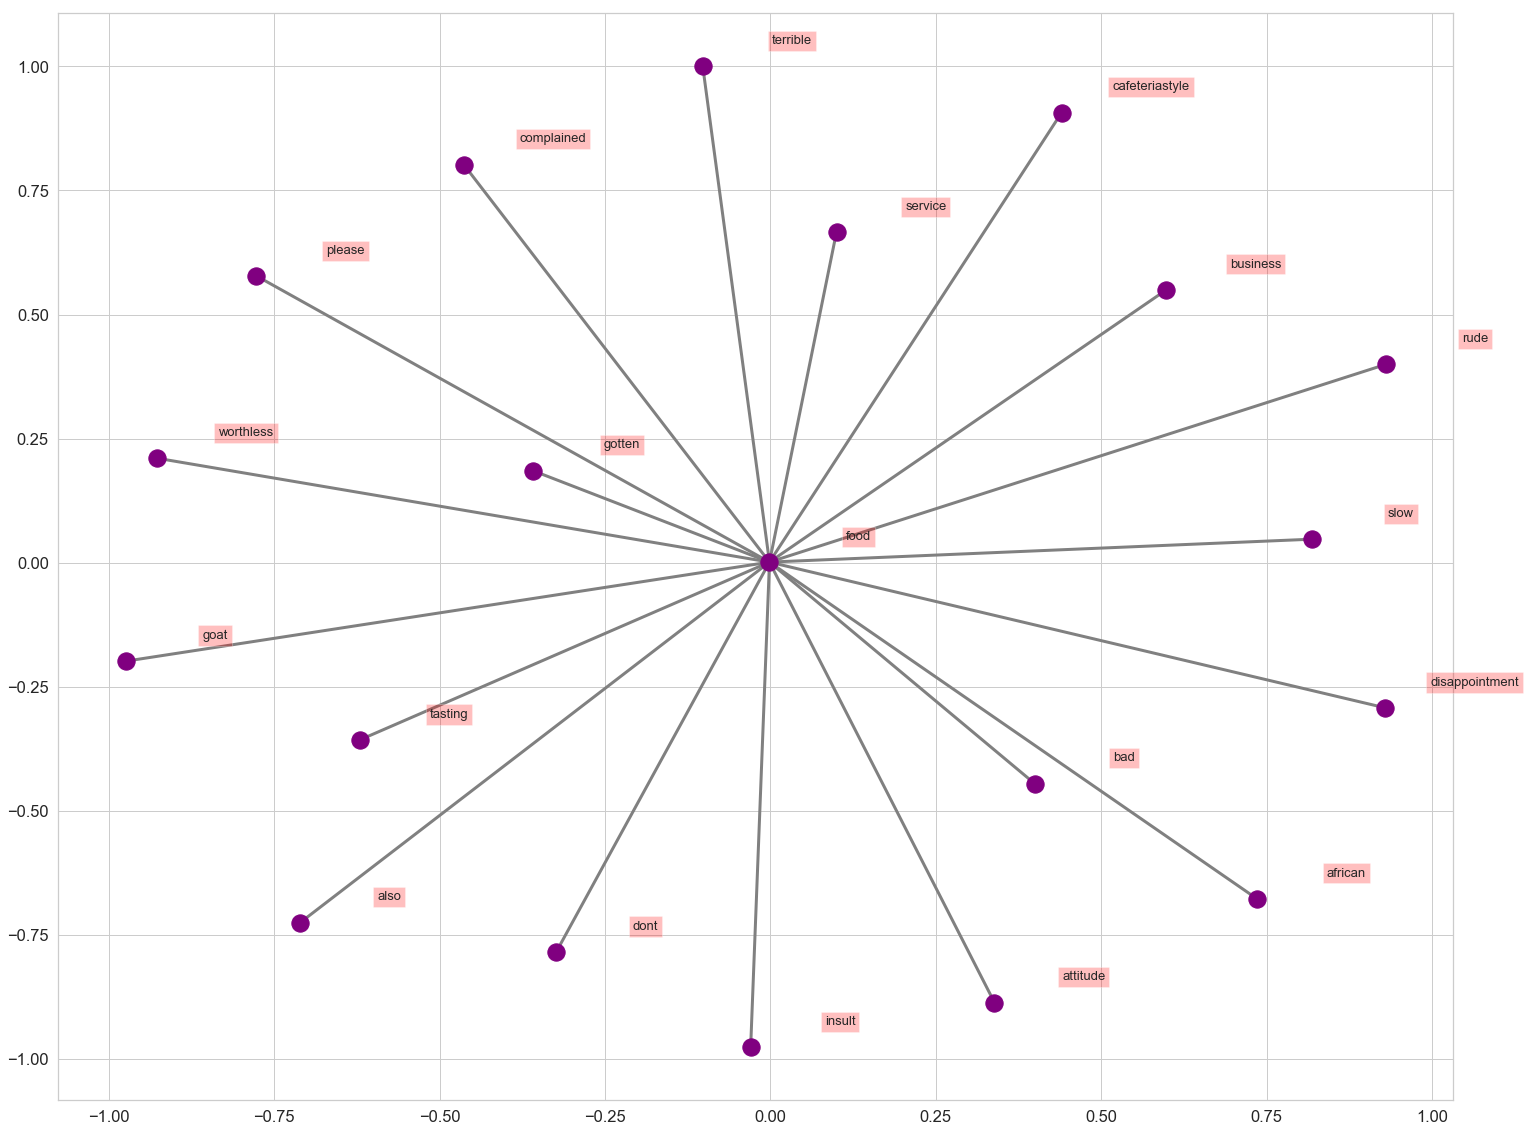

In [322]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(25, 20))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

### plot evolution of ratings per month

In [323]:
iyanze.sort_values('datePublished', ascending=True, inplace=True)
iyanze['review_month_year'] = iyanze.datePublished.apply(lambda x : x[:7])

In [324]:
iyanze.review_month_year.unique()

array(['2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-10',
       '2009-11', '2009-12', '2010-01', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-12', '2011-01', '2011-03',
       '2011-04', '2011-06', '2011-08', '2011-09', '2012-01', '2012-02',
       '2012-04', '2012-06', '2012-11', '2012-12', '2013-01', '2013-03',
       '2013-05', '2013-07', '2013-10', '2013-11', '2014-01', '2014-02',
       '2014-03', '2014-06', '2014-07', '2015-03', '2015-06', '2015-07',
       '2015-09', '2015-12', '2016-02', '2016-04', '2016-05', '2016-06',
       '2016-10', '2017-01', '2017-04', '2017-05', '2017-07', '2017-08',
       '2017-09', '2017-11', '2018-02', '2018-04', '2018-06', '2018-07',
       '2018-09', '2018-10', '2018-11', '2019-01', '2019-03', '2019-04',
       '2019-07', '2019-10'], dtype=object)

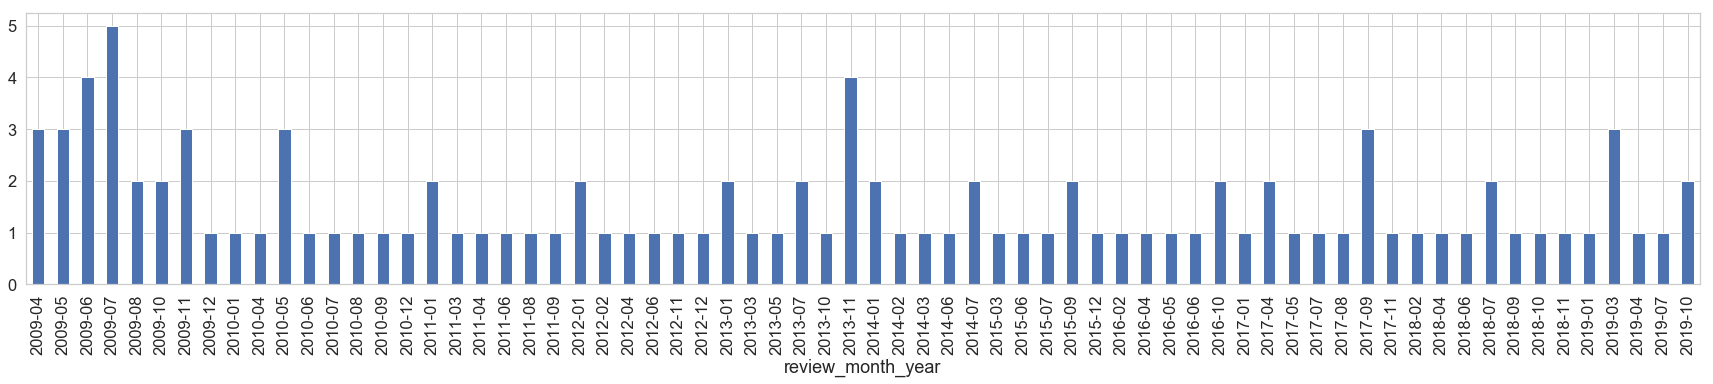

In [325]:
plt.figure(figsize=(30,5))
iyanze.groupby('review_month_year')['rating'].count().plot(kind='bar')

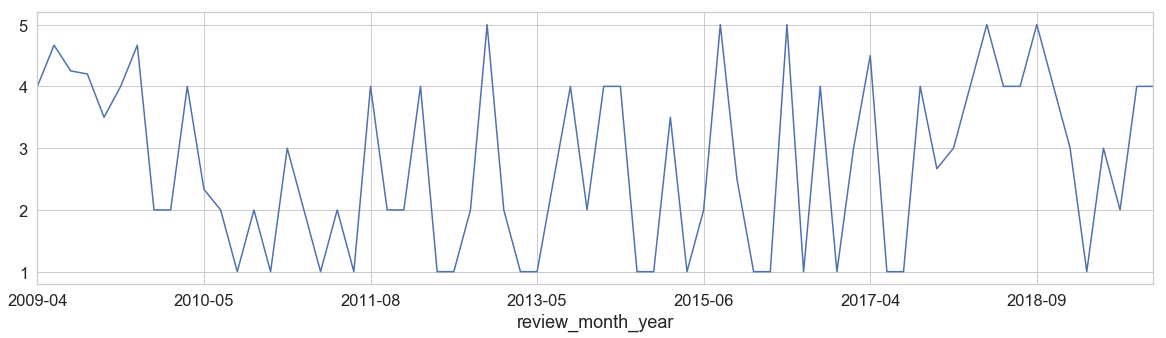

In [326]:
plt.figure(figsize=(20,5))
iyanze.groupby('review_month_year')['rating'].mean().plot()

### iyanze


In [327]:
reviews.alias.unique()

array(['shaws-crab-house-chicago', "Giordano's", 'ghareeb-nawaz-chicago',
       'ginos-east-magnificent-mile-chicago',
       'iyanze-restaurant-bar-and-cafe-chicago-2', 'chilis-too-chicago-3',
       'dominos-pizza-chicago-22', 'mcdonalds-chicago-70',
       'mcdonalds-chicago-95', 'mcdonalds-chicago-19',
       'chipotle-mexican-grill-chicago-29'], dtype=object)

In [328]:
dominos = reviews[reviews['alias'] == "dominos-pizza-chicago-22"]

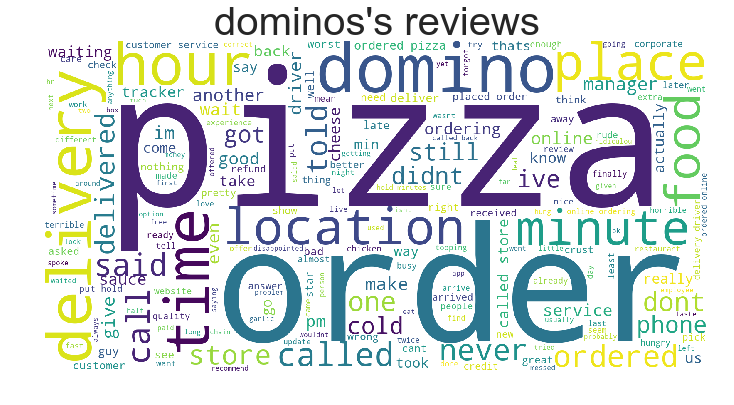

In [329]:
wc = WordCloud(background_color="white",width=1600, height=800, random_state=1, max_words=200)
# Join all strings together from the filtered description column to obtain all review text for the restaurant
wc.generate(' '.join(dominos['description_filtered']))


plt.figure(figsize=(15,10))
# Add title to figure
plt.title("dominos's reviews", fontsize=40)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=10)

In [330]:
# We get the 20 most occuring words over the reviews. 

# Pass the split_it list to instance of Counter class. 
splitted = dominos['description_filtered'].apply(lambda x: x.split()).to_list()
flatten = [item for sublist in splitted for item in sublist]
counter = Counter(flatten) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = counter.most_common(20) 
most_occur

[('pizza', 308),
 ('order', 221),
 ('dominos', 116),
 ('delivery', 105),
 ('called', 104),
 ('ordered', 91),
 ('minutes', 82),
 ('store', 74),
 ('said', 69),
 ('time', 69),
 ('food', 68),
 ('location', 67),
 ('would', 65),
 ('place', 63),
 ('call', 58),
 ('online', 55),
 ('get', 55),
 ('never', 55),
 ('hours', 53),
 ('told', 53)]

In [331]:
#Now we add a column which has the sentiment values of the each review posted for BBQ Supply Co, to see how the 
#author of this review feels about the restaurant.

#Create Text Blob Object and draw out the sentiment of each review by returning a value between -1.0 (extreme negative) 
#and 1.0 (extreme positive).
dominos['sentiment_analysis'] = dominos['description_filtered'].apply(lambda x: TextBlob(x).sentiment.polarity)
dominos = dominos.sort_values(by='sentiment_analysis', ascending=True)
dominos[:10]

datePublished                                        description  \
8341    2017-08-04  literally the worst dominoes ever. ordered my ...   
8254    2017-10-27  Poooorrrrrrr customer service skills. Oh my be...   
8314    2016-09-19  By FAR, the worst delivery experience I have e...   
8283    2016-09-26  From order to delivery: 2 hours and 23 minutes...   
8277    2017-01-01  Can you give Less than one star cause the serv...   
8286    2015-10-18  Horrible. We placed our order at 6:55 and were...   
8200    2019-12-09  This place is the worst place ever, they have ...   
8226    2018-09-05  Ordered pizza at 10:30 pm. Called at 11:30 pm ...   
8215    2019-05-21  Avoid at all costs...probably the worst experi...   
8321    2016-03-14  Bought 1 medium pizza. The delivery took 1 hou...   

           author                     alias  rating  \
8341     Grant C.  dominos-pizza-chicago-22       1   
8254     Reina A.  dominos-pizza-chicago-22       1   
8314   Michael S.  dominos-pizza-chicago-22       1   
8283     Frank L.  dominos-pizza-chicago-22       2   
8277     Isaac B.  dominos-pizza-chicago-22       1   
8286   Natasha S.  dominos-pizza-chicago-22       1   
8200   Ousmane C.  dominos-pizza-chicago-22       1   
8226    Conrad M.  dominos-pizza-chicago-22       1   
8215  Jermaine K.  dominos-pizza-chicago-22       1   
8321     Barry T.  dominos-pizza-chicago-22       1   

                                   description_filtered  sentiment_analysis  
8341  literally worst dominoes ever ordered pizza st...           -0.850000  
8254  poooorrrrrrr customer service skills oh beeeej...           -0.700000  
8314  far worst delivery experience ever ordered sai...           -0.633333  
8283  order delivery hours minutes called store loca...           -0.600000  
8277  give less one star cause service horrible tell...           -0.583333  
8286  horrible placed order told minutes pizza shows...           -0.562500  
8200  place worst place ever charged double amount c...           -0.525000  
8226  ordered pizza pm called pm said way called sor...           -0.525000  
8215  avoid costsprobably worst experience ive resta...           -0.516667  
8321  bought medium pizza delivery took hour mixed o...           -0.500000

In [332]:
# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in dominos[:10]['description_filtered']]


# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


In [333]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

[('literally', 'worst'),
 ('worst', 'dominoes'),
 ('dominoes', 'ever'),
 ('ever', 'ordered'),
 ('ordered', 'pizza'),
 ('pizza', 'still'),
 ('still', 'havent'),
 ('havent', 'heard'),
 ('heard', 'anything'),
 ('anything', 'delivery'),
 ('delivery', 'driver'),
 ('driver', 'may'),
 ('may', 'never'),
 ('never', 'orders'),
 ('orders', 'dominos'),
 ('dominos', 'bad')]

In [334]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('ever', 'ordered'), 2),
 (('ordered', 'pizza'), 2),
 (('way', 'called'), 2),
 (('literally', 'worst'), 1),
 (('worst', 'dominoes'), 1),
 (('dominoes', 'ever'), 1),
 (('pizza', 'still'), 1),
 (('still', 'havent'), 1),
 (('havent', 'heard'), 1),
 (('heard', 'anything'), 1),
 (('anything', 'delivery'), 1),
 (('delivery', 'driver'), 1),
 (('driver', 'may'), 1),
 (('may', 'never'), 1),
 (('never', 'orders'), 1),
 (('orders', 'dominos'), 1),
 (('dominos', 'bad'), 1),
 (('poooorrrrrrr', 'customer'), 1),
 (('customer', 'service'), 1),
 (('service', 'skills'), 1)]

bi = []
for i in range(len(bigrams)) :
    if bigrams[i][0] == 'bad' or bigrams[i][1] == 'food':
        print(bigrams[i])
        bi.append(bigrams[i])

bi = []
for i in range(len(bigrams)) :
    if (bigrams[i][0] == 'food' and bigrams[i][1] == negative_words.negative.any()) or (bigrams[i][0] == negative_words.negative.any() and bigrams[i][1] == 'food'):
        print(bigrams[i])
        bi.append(bigrams[i])

bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

In [335]:
negative_words[:2]

negative
0  abnormal
1   abolish

bi = []
for i in range(len(bigrams)) :
    if (bigrams[i][0] == 'food' or bigrams[i][1] == negative_words.negative.any() or bigrams[i][0] == negative_words.negative.any() or bigrams[i][1] == 'food'):
        print(bigrams[i])
        bi.append(bigrams[i])

In [336]:
bi = []
for i in range(len(bigrams)) :
    if (bigrams[i][0] == 'food' and negative_words.negative.str.contains(bigrams[i][1]).any()) or (negative_words.negative.str.contains(bigrams[i][0]).any() and bigrams[i][1] == 'food') or (bigrams[i][0] == 'food' or bigrams[i][1] == 'food'):
        print(bigrams[i])
        bi.append(bigrams[i])

('told', 'food')
('food', 'way')


In [337]:
bigram_counts = collections.Counter(bi)

In [338]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

bigram  count
0  (told, food)      1
1   (food, way)      1

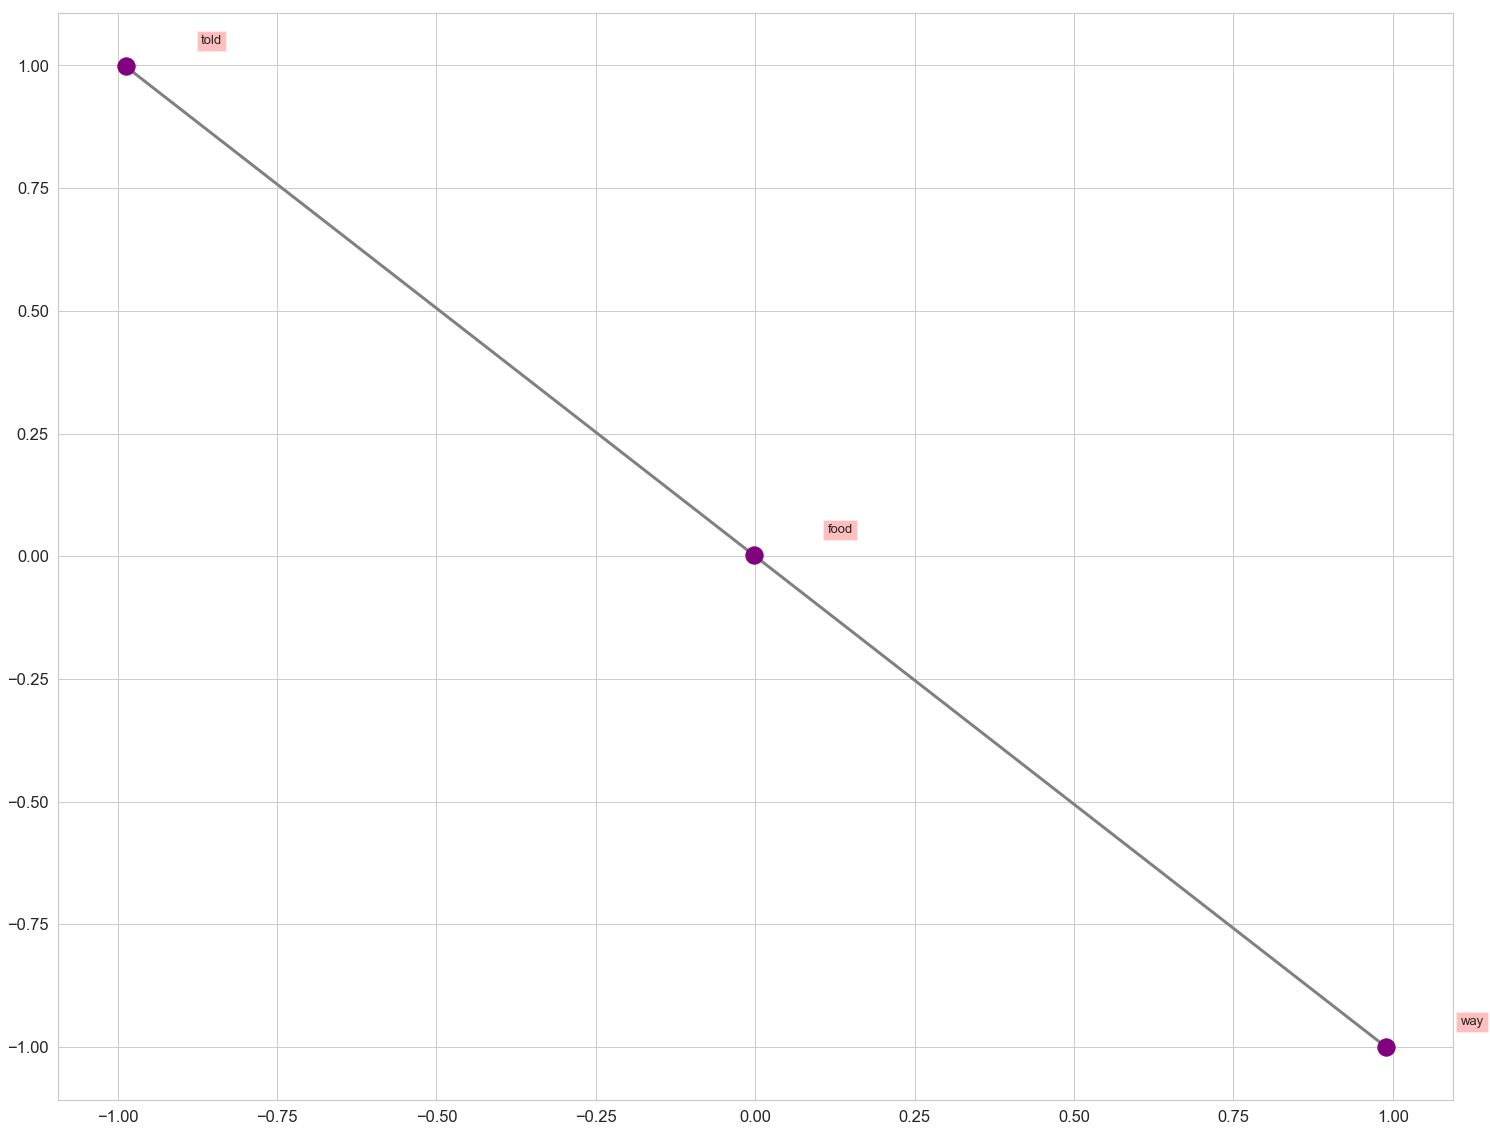

In [339]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(25, 20))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

### plot evolution of ratings per month

In [340]:
dominos.sort_values('datePublished', ascending=True, inplace=True)
dominos['review_month_year'] = dominos.datePublished.apply(lambda x : x[:7])

In [341]:
dominos.review_month_year.unique()

array(['2005-10', '2005-12', '2008-07', '2008-11', '2009-01', '2009-03',
       '2009-04', '2009-09', '2010-01', '2010-03', '2010-04', '2010-11',
       '2010-12', '2011-02', '2011-04', '2011-07', '2012-04', '2012-09',
       '2012-11', '2013-01', '2013-04', '2013-05', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-04', '2014-05', '2014-06', '2014-08',
       '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02',
       '2015-04', '2015-07', '2015-10', '2015-11', '2015-12', '2016-01',
       '2016-03', '2016-04', '2016-05', '2016-07', '2016-08', '2016-09',
       '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-08', '2017-09', '2017-10',
       '2017-11', '2017-12', '2018-02', '2018-05', '2018-07', '2018-08',
       '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02',
       '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
       '2019-09', '2019-10', '2019-11', '2019-12'],

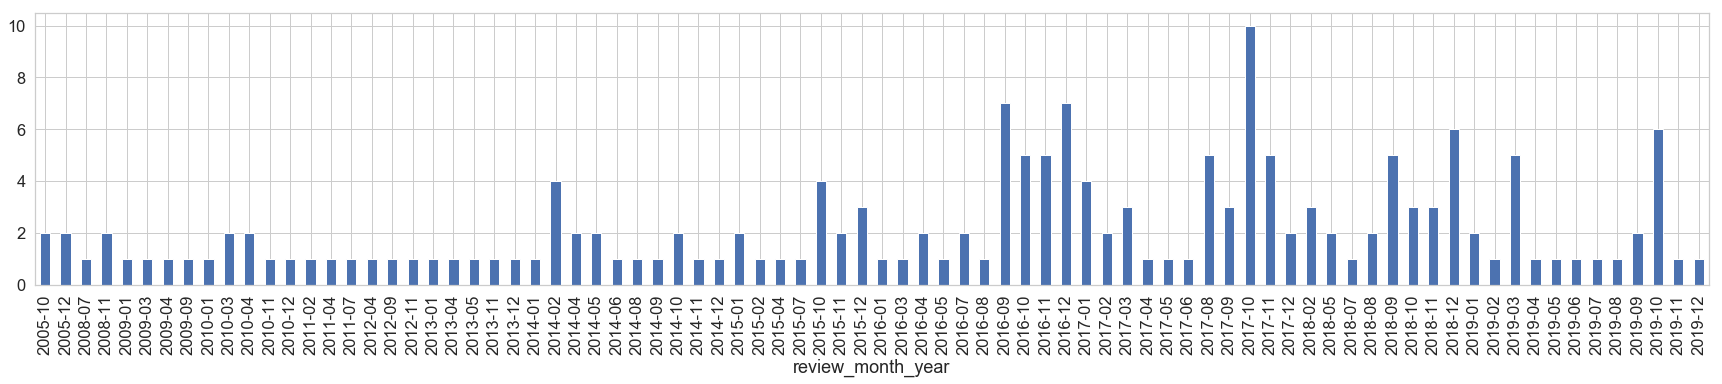

In [342]:
plt.figure(figsize=(30,5))
dominos.groupby('review_month_year')['rating'].count().plot(kind='bar')

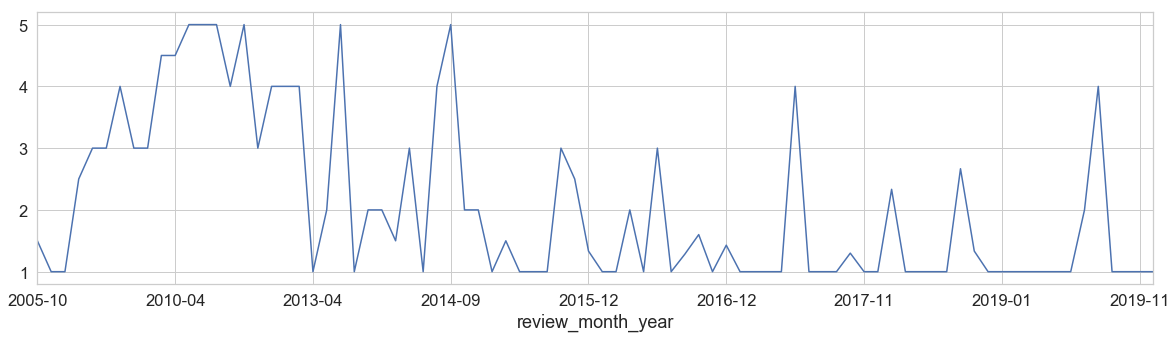

In [343]:
plt.figure(figsize=(20,5))
dominos.groupby('review_month_year')['rating'].mean().plot()

### mcdo19


In [344]:
reviews.alias.unique()

array(['shaws-crab-house-chicago', "Giordano's", 'ghareeb-nawaz-chicago',
       'ginos-east-magnificent-mile-chicago',
       'iyanze-restaurant-bar-and-cafe-chicago-2', 'chilis-too-chicago-3',
       'dominos-pizza-chicago-22', 'mcdonalds-chicago-70',
       'mcdonalds-chicago-95', 'mcdonalds-chicago-19',
       'chipotle-mexican-grill-chicago-29'], dtype=object)

In [345]:
mcdo19 = reviews[reviews['alias'] == "mcdonalds-chicago-19"]

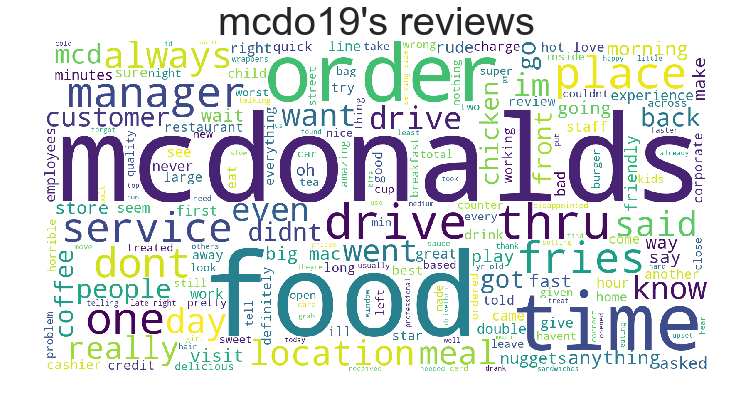

In [346]:
wc = WordCloud(background_color="white",width=1600, height=800, random_state=1, max_words=200)
# Join all strings together from the filtered description column to obtain all review text for the restaurant
wc.generate(' '.join(mcdo19['description_filtered']))


plt.figure(figsize=(15,10))
# Add title to figure
plt.title("mcdo19's reviews", fontsize=40)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=10)

In [347]:
# We get the 20 most occuring words over the reviews. 

# Pass the split_it list to instance of Counter class. 
splitted = mcdo19['description_filtered'].apply(lambda x: x.split()).to_list()
flatten = [item for sublist in splitted for item in sublist]
counter = Counter(flatten) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = counter.most_common(20) 
most_occur

[('mcdonalds', 25),
 ('drive', 23),
 ('food', 23),
 ('get', 17),
 ('thru', 16),
 ('order', 15),
 ('one', 13),
 ('place', 13),
 ('fries', 12),
 ('time', 12),
 ('service', 11),
 ('dont', 11),
 ('always', 11),
 ('manager', 10),
 ('said', 10),
 ('location', 10),
 ('even', 9),
 ('meal', 9),
 ('like', 9),
 ('really', 8)]

In [348]:
#Now we add a column which has the sentiment values of the each review posted for BBQ Supply Co, to see how the 
#author of this review feels about the restaurant.

#Create Text Blob Object and draw out the sentiment of each review by returning a value between -1.0 (extreme negative) 
#and 1.0 (extreme positive).
mcdo19['sentiment_analysis'] = mcdo19['description_filtered'].apply(lambda x: TextBlob(x).sentiment.polarity)
mcdo19 = mcdo19.sort_values(by='sentiment_analysis', ascending=True)
mcdo19[:10]

datePublished                                        description  \
8426    2018-12-08  Worst McDonalds I have ever been to late night...   
8428    2017-03-23  My lord this is the worse McDonald's. I have. ...   
8423    2019-07-24  Today I was treated abhorrently at this restau...   
8435    2017-06-26  Worst experience ever \nTotal wait, at nearly ...   
8441    2013-01-12  Just about the worst McDonald's I've been too....   
8431    2015-07-05  15 minutes waiting  for a Asian salad no chick...   
8450    2012-02-15  Ghetto. Some hunnie jumped from the end of one...   
8446    2015-07-30  Just went through the drive thru, it's 10am on...   
8434    2018-06-28  Went to McDonald's because I hadn't eaten all ...   
8422    2019-10-15  Drive through order taker was rude and impatie...   

          author                 alias  rating  \
8426    Brian M.  mcdonalds-chicago-19       1   
8428    David Z.  mcdonalds-chicago-19       1   
8423   Raquel S.  mcdonalds-chicago-19       1   
8435      Zak J.  mcdonalds-chicago-19       1   
8441  Brandon M.  mcdonalds-chicago-19       1   
8431     Cely R.  mcdonalds-chicago-19       1   
8450   Mary K W.  mcdonalds-chicago-19       1   
8446        A S.  mcdonalds-chicago-19       1   
8434  Barbara M.  mcdonalds-chicago-19       1   
8422        B C.  mcdonalds-chicago-19       1   

                                   description_filtered  sentiment_analysis  
8426  worst mcdonalds ever late night prepare wait m...           -0.433333  
8428  lord worse mcdonalds even drive thru time morn...           -0.350000  
8423  today treated abhorrently restaurant upon arri...           -0.281510  
8435  worst experience ever total wait nearly pm eve...           -0.280000  
8441  worst mcdonalds ive really manager way makes e...           -0.255000  
8431  minutes waiting asian salad chicken said ready...           -0.250000  
8450  ghetto hunnie jumped end one line front anothe...           -0.233333  
8446  went drive thru thursday morning could hear sp...           -0.233333  
8434  went mcdonalds hadnt eaten day going treat big...           -0.220588  
8422  drive order taker rude impatient neglected tel...           -0.133333

In [349]:

# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in mcdo19[:10]['description_filtered']]


# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


In [350]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

[('worst', 'mcdonalds'),
 ('mcdonalds', 'ever'),
 ('ever', 'late'),
 ('late', 'night'),
 ('night', 'prepare'),
 ('prepare', 'wait'),
 ('wait', 'minutes'),
 ('minutes', 'order'),
 ('order', 'total'),
 ('total', 'joke'),
 ('joke', 'close')]

In [351]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('big', 'mac'), 6),
 (('drive', 'thru'), 3),
 (('worst', 'mcdonalds'), 2),
 (('traffic', 'get'), 2),
 (('chicken', 'mcnuggets'), 2),
 (('mcdonalds', 'ever'), 1),
 (('ever', 'late'), 1),
 (('late', 'night'), 1),
 (('night', 'prepare'), 1),
 (('prepare', 'wait'), 1),
 (('wait', 'minutes'), 1),
 (('minutes', 'order'), 1),
 (('order', 'total'), 1),
 (('total', 'joke'), 1),
 (('joke', 'close'), 1),
 (('lord', 'worse'), 1),
 (('worse', 'mcdonalds'), 1),
 (('mcdonalds', 'even'), 1),
 (('even', 'drive'), 1),
 (('thru', 'time'), 1)]

bi = []
for i in range(len(bigrams)) :
    if bigrams[i][0] == 'bad' or bigrams[i][1] == 'food':
        print(bigrams[i])
        bi.append(bigrams[i])

bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

bi = []
for i in range(len(bigrams)) :
    if (bigrams[i][0] == 'food' or bigrams[i][1] == negative_words.negative.any() or bigrams[i][0] == negative_words.negative.any() or bigrams[i][1] == 'food'):
        print(bigrams[i])
        bi.append(bigrams[i])

In [352]:
bi = []
for i in range(len(bigrams)) :
    if (bigrams[i][0] == 'food' and negative_words.negative.str.contains(bigrams[i][1]).any()) or (negative_words.negative.str.contains(bigrams[i][0]).any() and bigrams[i][1] == 'food') or (bigrams[i][0] == 'food' or bigrams[i][1] == 'food'):
        print(bigrams[i])
        bi.append(bigrams[i])

('serve', 'food')
('initial', 'food')
('food', 'order')
('received', 'food')
('food', 'forgot')
('couldnt', 'food')
('food', 'replied')
('away', 'food')
('food', 'asked')
('rules', 'food')
('food', 'drink')
('get', 'food')
('food', 'takes')


In [353]:
bigram_counts = collections.Counter(bi)

In [354]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

bigram  count
0      (serve, food)      1
1    (initial, food)      1
2      (food, order)      1
3   (received, food)      1
4     (food, forgot)      1
5    (couldnt, food)      1
6    (food, replied)      1
7       (away, food)      1
8      (food, asked)      1
9      (rules, food)      1
10     (food, drink)      1
11       (get, food)      1
12     (food, takes)      1

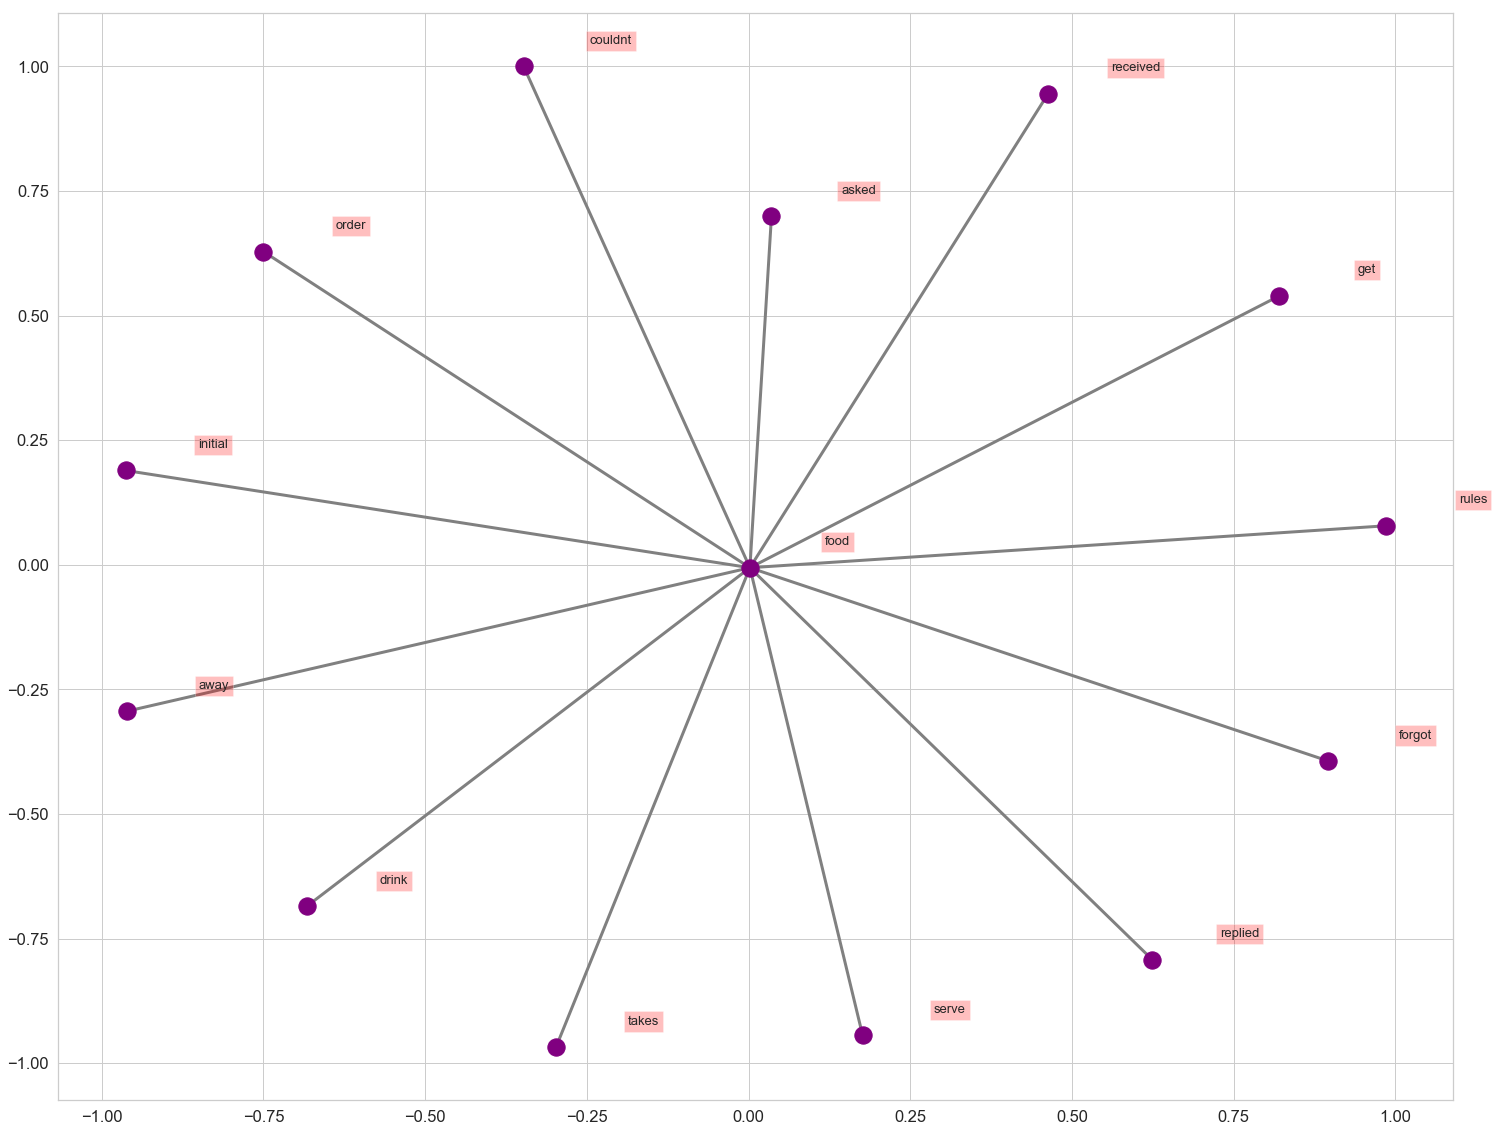

In [355]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(25, 20))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

### plot evolution of ratings per month

In [356]:
mcdo19.sort_values('datePublished', ascending=True, inplace=True)
mcdo19['review_month_year'] = mcdo19.datePublished.apply(lambda x : x[:7])

In [357]:
mcdo19.review_month_year.unique()

array(['2007-07', '2007-10', '2009-08', '2010-02', '2011-01', '2011-03',
       '2011-04', '2011-11', '2012-02', '2012-07', '2012-11', '2013-01',
       '2013-02', '2013-08', '2013-12', '2014-04', '2014-06', '2014-08',
       '2015-02', '2015-07', '2016-07', '2017-03', '2017-06', '2017-10',
       '2018-03', '2018-06', '2018-07', '2018-10', '2018-12', '2019-01',
       '2019-03', '2019-07', '2019-09', '2019-10'], dtype=object)

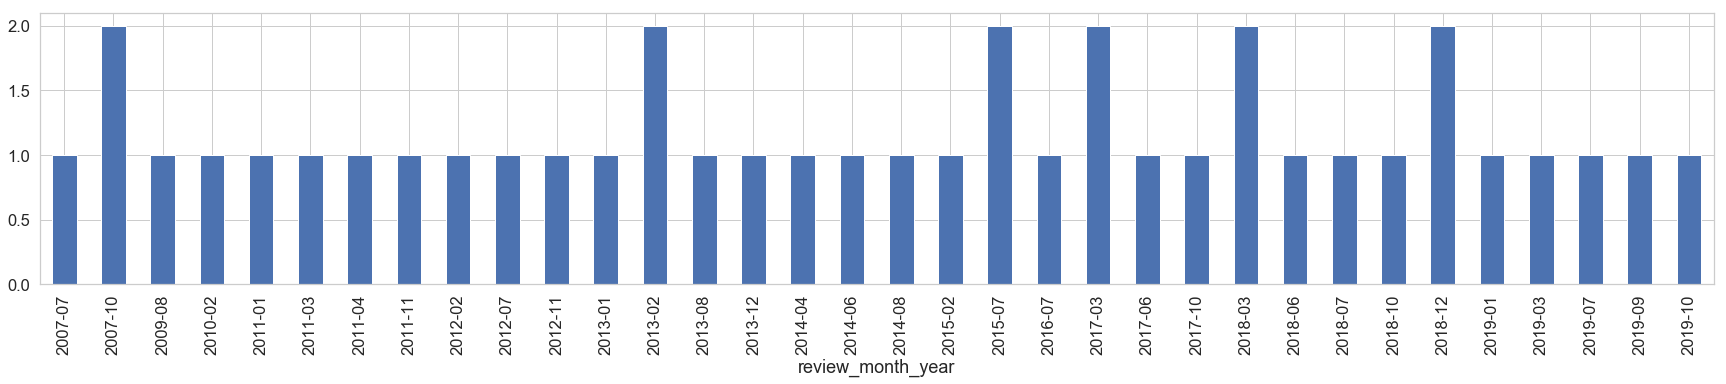

In [358]:
plt.figure(figsize=(30,5))
mcdo19.groupby('review_month_year')['rating'].count().plot(kind='bar')

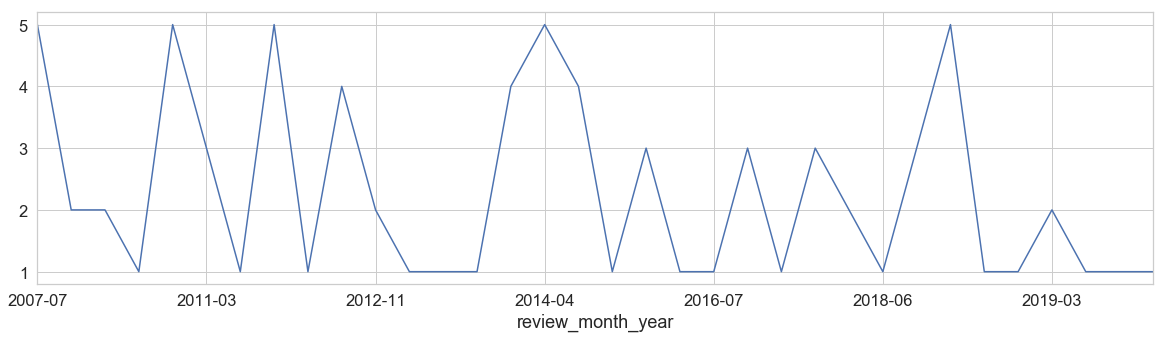

In [359]:
plt.figure(figsize=(20,5))
mcdo19.groupby('review_month_year')['rating'].mean().plot()

### mcdo70


In [360]:
reviews.alias.unique()

array(['shaws-crab-house-chicago', "Giordano's", 'ghareeb-nawaz-chicago',
       'ginos-east-magnificent-mile-chicago',
       'iyanze-restaurant-bar-and-cafe-chicago-2', 'chilis-too-chicago-3',
       'dominos-pizza-chicago-22', 'mcdonalds-chicago-70',
       'mcdonalds-chicago-95', 'mcdonalds-chicago-19',
       'chipotle-mexican-grill-chicago-29'], dtype=object)

In [361]:
mcdo70 = reviews[reviews['alias'] == "mcdonalds-chicago-70"]

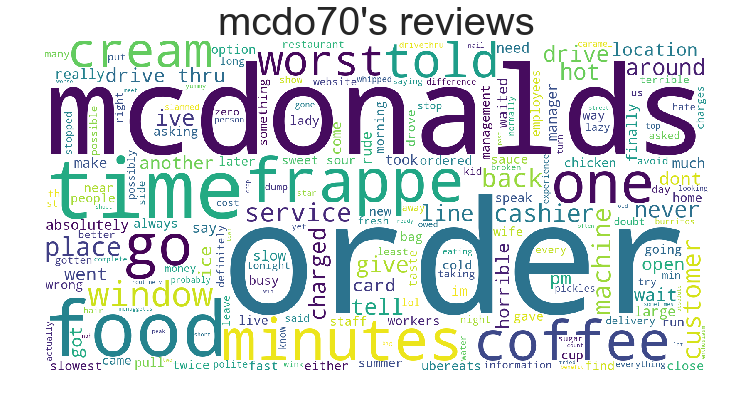

In [362]:
wc = WordCloud(background_color="white",width=1600, height=800, random_state=1, max_words=200)
# Join all strings together from the filtered description column to obtain all review text for the restaurant
wc.generate(' '.join(mcdo70['description_filtered']))


plt.figure(figsize=(15,10))
# Add title to figure
plt.title("mcdo70's reviews", fontsize=40)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=10)

In [363]:
# We get the 20 most occuring words over the reviews. 

# Pass the split_it list to instance of Counter class. 
splitted = mcdo70['description_filtered'].apply(lambda x: x.split()).to_list()
flatten = [item for sublist in splitted for item in sublist]
counter = Counter(flatten) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = counter.most_common(20) 
most_occur

[('order', 17),
 ('mcdonalds', 15),
 ('drive', 10),
 ('food', 10),
 ('one', 9),
 ('go', 9),
 ('minutes', 9),
 ('frappe', 9),
 ('get', 8),
 ('ever', 8),
 ('coffee', 8),
 ('time', 7),
 ('told', 7),
 ('cream', 7),
 ('worst', 7),
 ('service', 6),
 ('place', 6),
 ('back', 6),
 ('machine', 6),
 ('cashier', 6)]

In [364]:
#Now we add a column which has the sentiment values of the each review posted for BBQ Supply Co, to see how the 
#author of this review feels about the restaurant.

#Create Text Blob Object and draw out the sentiment of each review by returning a value between -1.0 (extreme negative) 
#and 1.0 (extreme positive).
mcdo70['sentiment_analysis'] = mcdo70['description_filtered'].apply(lambda x: TextBlob(x).sentiment.polarity)
mcdo70 = mcdo70.sort_values(by='sentiment_analysis', ascending=True)
mcdo70[:10]

datePublished                                        description  \
8382    2018-08-19  Worst place ever. Very slow and rude employees...   
8392    2013-04-27  They are always out of something or their ice ...   
8395    2011-07-06  This was possibly my worst experience at a McD...   
8389    2016-01-27  Shameful!  The staff is beyond pathetic and la...   
8378    2018-11-04  Horrible service. The kid at the second window...   
8380    2018-04-02  Possibly the worst mcdonalds ive been to. I wo...   
8394    2016-01-12  I was in the drive thru and it was absolutely ...   
8381    2017-10-28  This place is on my route home. Stop here a fe...   
8391    2014-07-29  This place is run by idiots. Everytime I've go...   
8375    2019-08-31  This is the absolute worse McDonalds! They def...   

          author                 alias  rating  \
8382   Nathan M.  mcdonalds-chicago-70       1   
8392  Giselle K.  mcdonalds-chicago-70       1   
8395     John V.  mcdonalds-chicago-70       1   
8389     Paul B.  mcdonalds-chicago-70       1   
8378     Erik G.  mcdonalds-chicago-70       1   
8380    Karlo B.  mcdonalds-chicago-70       1   
8394     Desi L.  mcdonalds-chicago-70       1   
8381  Vincent J.  mcdonalds-chicago-70       2   
8391    Kerry O.  mcdonalds-chicago-70       1   
8375    Keila L.  mcdonalds-chicago-70       1   

                                   description_filtered  sentiment_analysis  
8382  worst place ever slow rude employees least thi...           -0.483333  
8392  always something ice cream machine broken coff...           -0.433333  
8395  possibly worst experience mcdonalds first man ...           -0.278571  
8389  shameful staff beyond pathetic lazy uninterest...           -0.234458  
8378  horrible service kid second window absolutely ...           -0.218182  
8380  possibly worst mcdonalds ive work close locati...           -0.215000  
8394  drive thru absolutely horrible line minutes ca...           -0.182353  
8381  place route home stop times month least never ...           -0.158750  
8391  place run idiots everytime ive gone drive thru...           -0.154167  
8375  absolute worse mcdonalds definitely meet mcdon...           -0.150000

In [365]:

# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in mcdo70[:10]['description_filtered']]


# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


In [366]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

[('worst', 'place'),
 ('place', 'ever'),
 ('ever', 'slow'),
 ('slow', 'rude'),
 ('rude', 'employees'),
 ('employees', 'least'),
 ('least', 'third'),
 ('third', 'summer'),
 ('summer', 'stopped'),
 ('stopped', 'ice'),
 ('ice', 'crean'),
 ('crean', 'none'),
 ('none', 'one'),
 ('one', 'time'),
 ('time', 'summer'),
 ('summer', 'summer'),
 ('summer', 'worst'),
 ('worst', 'mc'),
 ('mc', 'ever'),
 ('ever', 'stopped')]

In [367]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('drive', 'thru'), 4),
 (('ice', 'cream'), 3),
 (('customer', 'service'), 3),
 (('sweet', 'sour'), 3),
 (('one', 'time'), 2),
 (('machine', 'broken'), 2),
 (('possibly', 'worst'), 2),
 (('waited', 'minutes'), 2),
 (('order', 'wrong'), 2),
 (('sour', 'sauce'), 2),
 (('absolutely', 'horrible'), 2),
 (('much', 'possible'), 2),
 (('slammed', 'window'), 2),
 (('came', 'back'), 2),
 (('go', 'back'), 2),
 (('worst', 'place'), 1),
 (('place', 'ever'), 1),
 (('ever', 'slow'), 1),
 (('slow', 'rude'), 1),
 (('rude', 'employees'), 1)]

bi = []
for i in range(len(bigrams)) :
    if bigrams[i][0] == 'poison' or bigrams[i][1] == 'food':
        print(bigrams[i])
        bi.append(bigrams[i])

bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

bi = []
for i in range(len(bigrams)) :
    if bigrams[i][0] == 'food' or bigrams[i][1] == 'food':
        print(bigrams[i])
        bi.append(bigrams[i])

bi = []
for i in range(len(bigrams)) :
    if (bigrams[i][0] == 'food' or bigrams[i][1] == negative_words.negative.any() or bigrams[i][0] == negative_words.negative.any() or bigrams[i][1] == 'food'):
        print(bigrams[i])
        bi.append(bigrams[i])

In [368]:
bi = []
for i in range(len(bigrams)) :
    if (bigrams[i][0] == 'food' and negative_words.negative.str.contains(bigrams[i][1]).any()) or (negative_words.negative.str.contains(bigrams[i][0]).any() and bigrams[i][1] == 'food') or (bigrams[i][0] == 'food' or bigrams[i][1] == 'food'):
        print(bigrams[i])
        bi.append(bigrams[i])

('childrens', 'food')
('food', 'get')
('throws', 'food')
('food', 'bag')
('done', 'food')
('food', 'cold')
('cold', 'food')
('food', 'inadequate')


In [369]:
bigram_counts = collections.Counter(bi)

In [370]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

bigram  count
0   (childrens, food)      1
1         (food, get)      1
2      (throws, food)      1
3         (food, bag)      1
4        (done, food)      1
5        (food, cold)      1
6        (cold, food)      1
7  (food, inadequate)      1

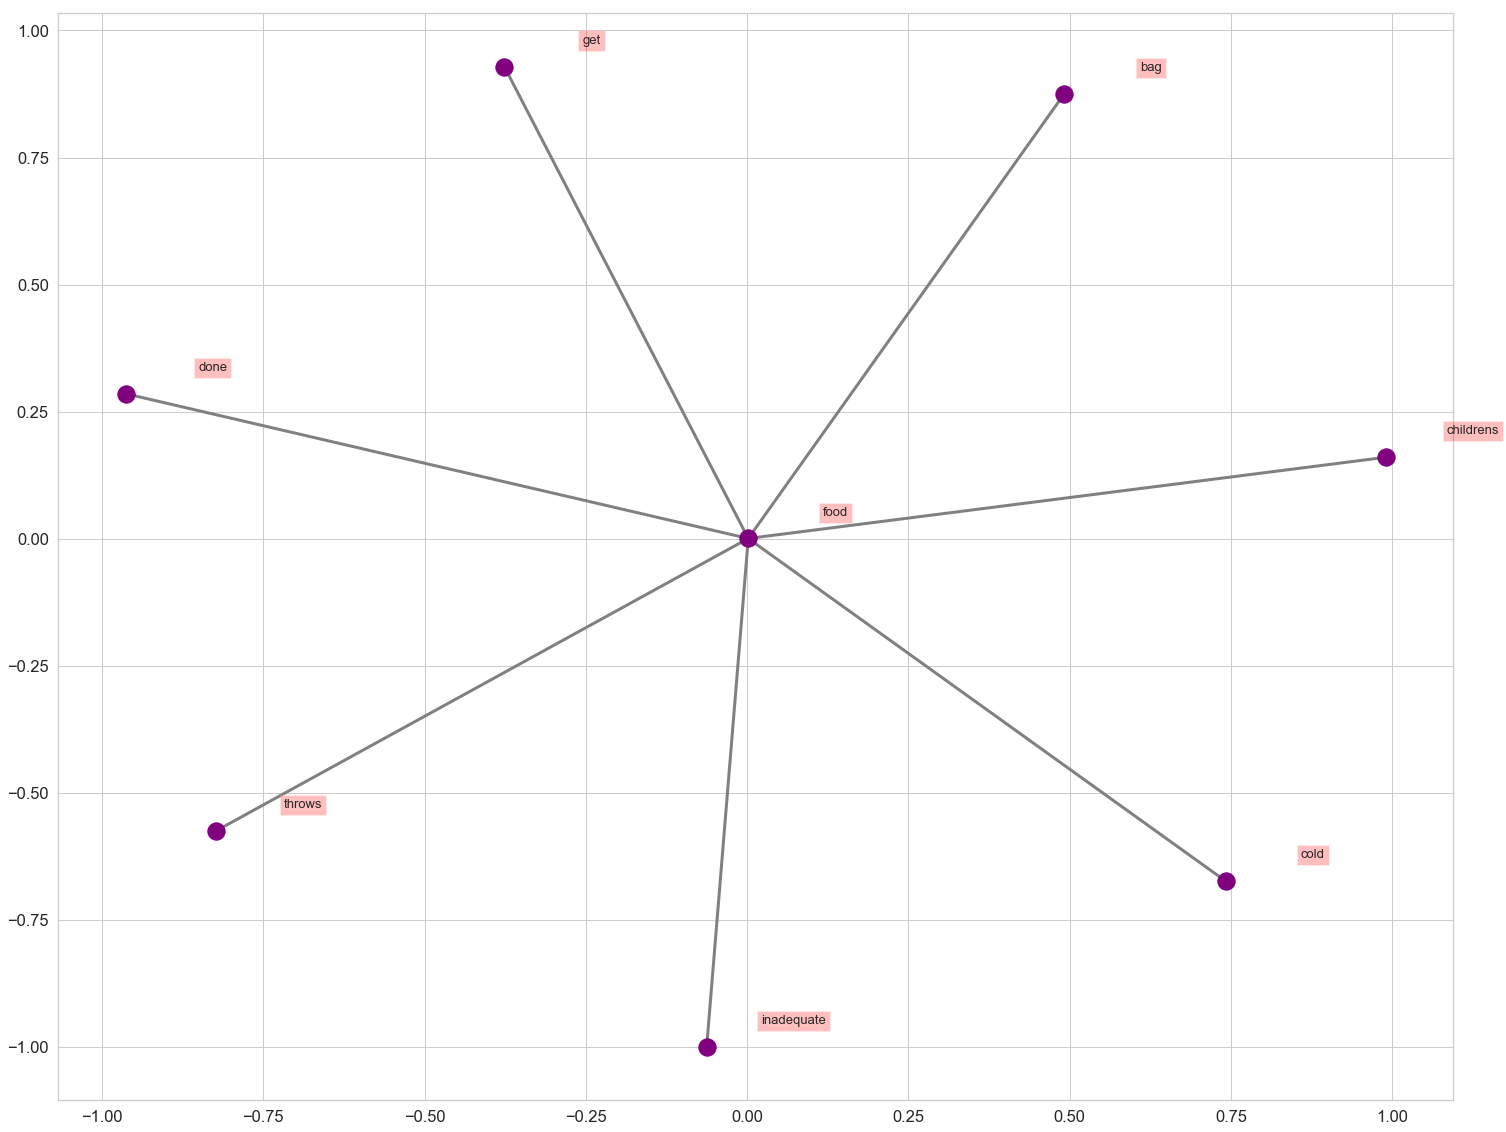

In [371]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(25, 20))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

### plot evolution of ratings per month

In [372]:
mcdo70.sort_values('datePublished', ascending=True, inplace=True)
mcdo70['review_month_year'] = mcdo70.datePublished.apply(lambda x : x[:7])

In [373]:
mcdo70.review_month_year.unique()

array(['2010-05', '2010-07', '2011-07', '2012-04', '2013-04', '2014-07',
       '2015-06', '2015-12', '2016-01', '2016-07', '2016-08', '2017-02',
       '2017-04', '2017-10', '2018-04', '2018-08', '2018-11', '2019-01',
       '2019-03', '2019-08'], dtype=object)

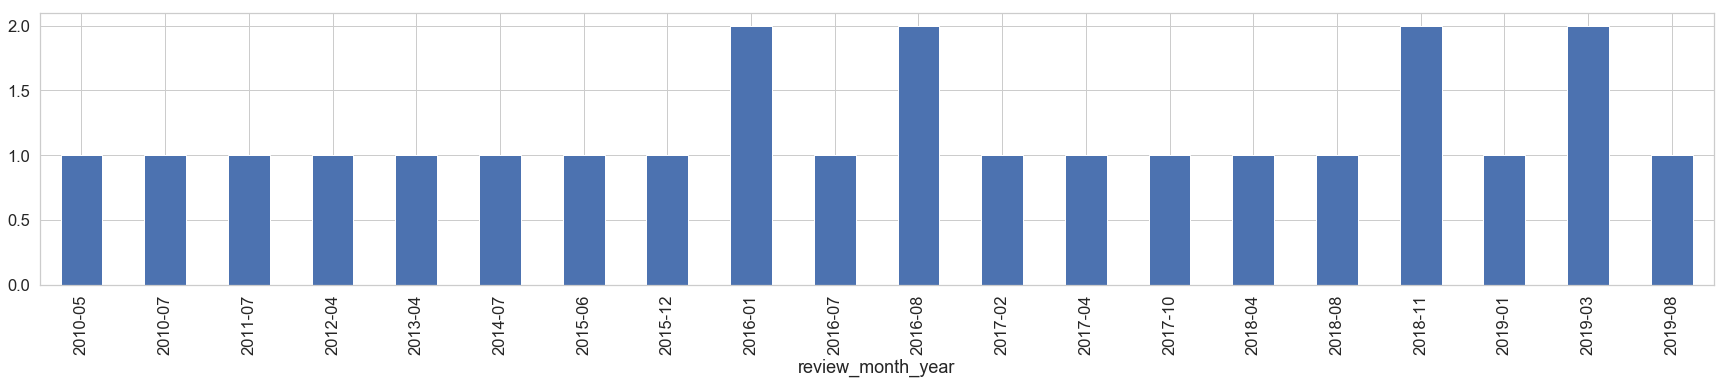

In [374]:
plt.figure(figsize=(30,5))
mcdo70.groupby('review_month_year')['rating'].count().plot(kind='bar')

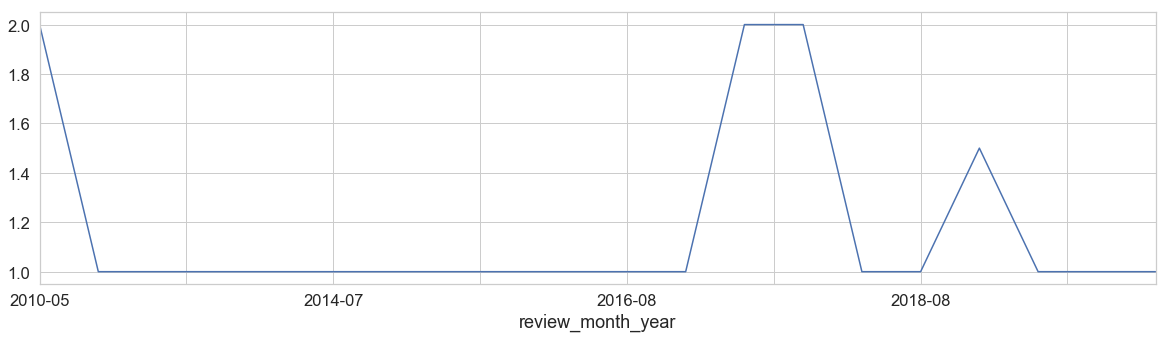

In [375]:
plt.figure(figsize=(20,5))
mcdo70.groupby('review_month_year')['rating'].mean().plot()

### mcdo95


In [376]:
reviews.alias.unique()

array(['shaws-crab-house-chicago', "Giordano's", 'ghareeb-nawaz-chicago',
       'ginos-east-magnificent-mile-chicago',
       'iyanze-restaurant-bar-and-cafe-chicago-2', 'chilis-too-chicago-3',
       'dominos-pizza-chicago-22', 'mcdonalds-chicago-70',
       'mcdonalds-chicago-95', 'mcdonalds-chicago-19',
       'chipotle-mexican-grill-chicago-29'], dtype=object)

In [377]:
mcdo95 = reviews[reviews['alias'] == "mcdonalds-chicago-95"]

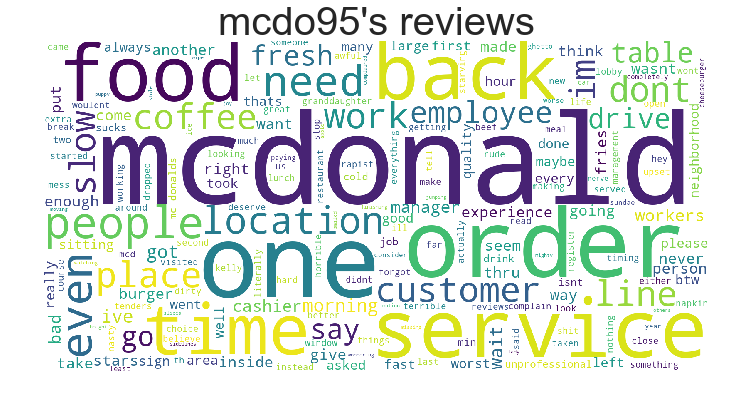

In [378]:
wc = WordCloud(background_color="white",width=1600, height=800, random_state=1, max_words=200)
# Join all strings together from the filtered description column to obtain all review text for the restaurant
wc.generate(' '.join(mcdo95['description_filtered']))


plt.figure(figsize=(15,10))
# Add title to figure
plt.title("mcdo95's reviews", fontsize=40)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=10)

In [379]:
# We get the 20 most occuring words over the reviews. 

# Pass the split_it list to instance of Counter class. 
splitted = mcdo95['description_filtered'].apply(lambda x: x.split()).to_list()
flatten = [item for sublist in splitted for item in sublist]
counter = Counter(flatten) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = counter.most_common(20) 
most_occur

[('mcdonalds', 21),
 ('get', 15),
 ('one', 12),
 ('service', 12),
 ('food', 11),
 ('back', 11),
 ('like', 10),
 ('order', 10),
 ('people', 9),
 ('even', 9),
 ('location', 8),
 ('ever', 8),
 ('im', 7),
 ('slow', 7),
 ('time', 7),
 ('place', 7),
 ('work', 7),
 ('coffee', 7),
 ('dont', 7),
 ('say', 6)]

In [380]:
#Now we add a column which has the sentiment values of the each review posted for BBQ Supply Co, to see how the 
#author of this review feels about the restaurant.

#Create Text Blob Object and draw out the sentiment of each review by returning a value between -1.0 (extreme negative) 
#and 1.0 (extreme positive).
mcdo95['sentiment_analysis'] = mcdo95['description_filtered'].apply(lambda x: TextBlob(x).sentiment.polarity)
mcdo95 = mcdo95.sort_values(by='sentiment_analysis', ascending=True)
mcdo95[:10]

datePublished                                        description  \
8400    2019-04-13  Person working the drive through this morning ...   
8416    2014-08-08  How can someone scrw up an order. When you giv...   
8407    2016-09-29  They deserve no stars management sucks the cre...   
8415    2016-04-01  If this isn't by far the worse McDonald's like...   
8417    2014-11-26  Worst place I've ever been to in my life I wai...   
8413    2015-06-04  This McDonald's has the worse service I have e...   
8418    2012-08-15  I just left Comer's Children Hospital with a s...   
8403    2019-08-17  This is the worst location I've ever been too!...   
8399    2019-10-27  Just had a terrible experience. Why is everyth...   
8401    2019-08-14  Another "Cash only" McDonalds early in the mor...   

              author                 alias  rating  \
8400      Richard N.  mcdonalds-chicago-95       1   
8416         mike s.  mcdonalds-chicago-95       1   
8407        Keith S.  mcdonalds-chicago-95       1   
8415        Kitty C.  mcdonalds-chicago-95       2   
8417       Dillon J.  mcdonalds-chicago-95       1   
8413        David H.  mcdonalds-chicago-95       1   
8418     Danielle W.  mcdonalds-chicago-95       1   
8403        Alisa N.  mcdonalds-chicago-95       1   
8399  Christopher J.  mcdonalds-chicago-95       1   
8401    Francisco G.  mcdonalds-chicago-95       1   

                                   description_filtered  sentiment_analysis  
8400  person working drive morning terrible nasty sp...           -0.367347  
8416  someone scrw order give order number assigned ...           -0.358333  
8407  deserve stars management sucks crew sucks food...           -0.322368  
8415  isnt far worse mcdonalds like man least get na...           -0.303125  
8417  worst place ive ever life waited minutes two c...           -0.266234  
8413  mcdonalds worse service ever seen mcdonalds wa...           -0.251587  
8418  left comers children hospital sick year sleepy...           -0.227381  
8403  worst location ive ever please dont go wish wo...           -0.225000  
8399  terrible experience everything sign put inform...           -0.186147  
8401  another cash mcdonalds early morning almost ev...           -0.147222

In [381]:

# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in mcdo95[:10]['description_filtered']]


# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


In [382]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

[('person', 'working'),
 ('working', 'drive'),
 ('drive', 'morning'),
 ('morning', 'terrible'),
 ('terrible', 'nasty'),
 ('nasty', 'spoke'),
 ('spoke', 'managers'),
 ('managers', 'twice'),
 ('twice', 'short'),
 ('short', 'time'),
 ('time', 'line'),
 ('line', 'refuse'),
 ('refuse', 'complain'),
 ('complain', 'leave'),
 ('leave', 'fear'),
 ('fear', 'choice'),
 ('choice', 'quality'),
 ('quality', 'employees'),
 ('employees', 'limited'),
 ('limited', 'individual'),
 ('individual', 'like'),
 ('like', 'directly'),
 ('directly', 'interface'),
 ('interface', 'consumers'),
 ('consumers', 'handle'),
 ('handle', 'money'),
 ('money', 'represents'),
 ('represents', 'dangerous'),
 ('dangerous', 'combination')]

In [383]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('every', 'morning'), 2),
 (('ive', 'ever'), 2),
 (('going', 'back'), 2),
 (('person', 'working'), 1),
 (('working', 'drive'), 1),
 (('drive', 'morning'), 1),
 (('morning', 'terrible'), 1),
 (('terrible', 'nasty'), 1),
 (('nasty', 'spoke'), 1),
 (('spoke', 'managers'), 1),
 (('managers', 'twice'), 1),
 (('twice', 'short'), 1),
 (('short', 'time'), 1),
 (('time', 'line'), 1),
 (('line', 'refuse'), 1),
 (('refuse', 'complain'), 1),
 (('complain', 'leave'), 1),
 (('leave', 'fear'), 1),
 (('fear', 'choice'), 1),
 (('choice', 'quality'), 1)]

bi = []
for i in range(len(bigrams)) :
    if bigrams[i][0] == 'food' or bigrams[i][1] == 'food':
        print(bigrams[i])
        bi.append(bigrams[i])

In [384]:
bi = []
for i in range(len(bigrams)) :
    if (bigrams[i][0] == 'food' and negative_words.negative.str.contains(bigrams[i][1]).any()) or (negative_words.negative.str.contains(bigrams[i][0]).any() and bigrams[i][1] == 'food') or (bigrams[i][0] == 'food' or bigrams[i][1] == 'food'):
        print(bigrams[i])
        bi.append(bigrams[i])

('order', 'food')
('food', 'cold')
('sucks', 'food')
('food', 'sucks')
('situation', 'food')
('food', 'awful')
('bad', 'food')
('food', 'bad')


In [385]:
bigram_counts = collections.Counter(bi)

In [386]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

bigram  count
0      (order, food)      1
1       (food, cold)      1
2      (sucks, food)      1
3      (food, sucks)      1
4  (situation, food)      1
5      (food, awful)      1
6        (bad, food)      1
7        (food, bad)      1

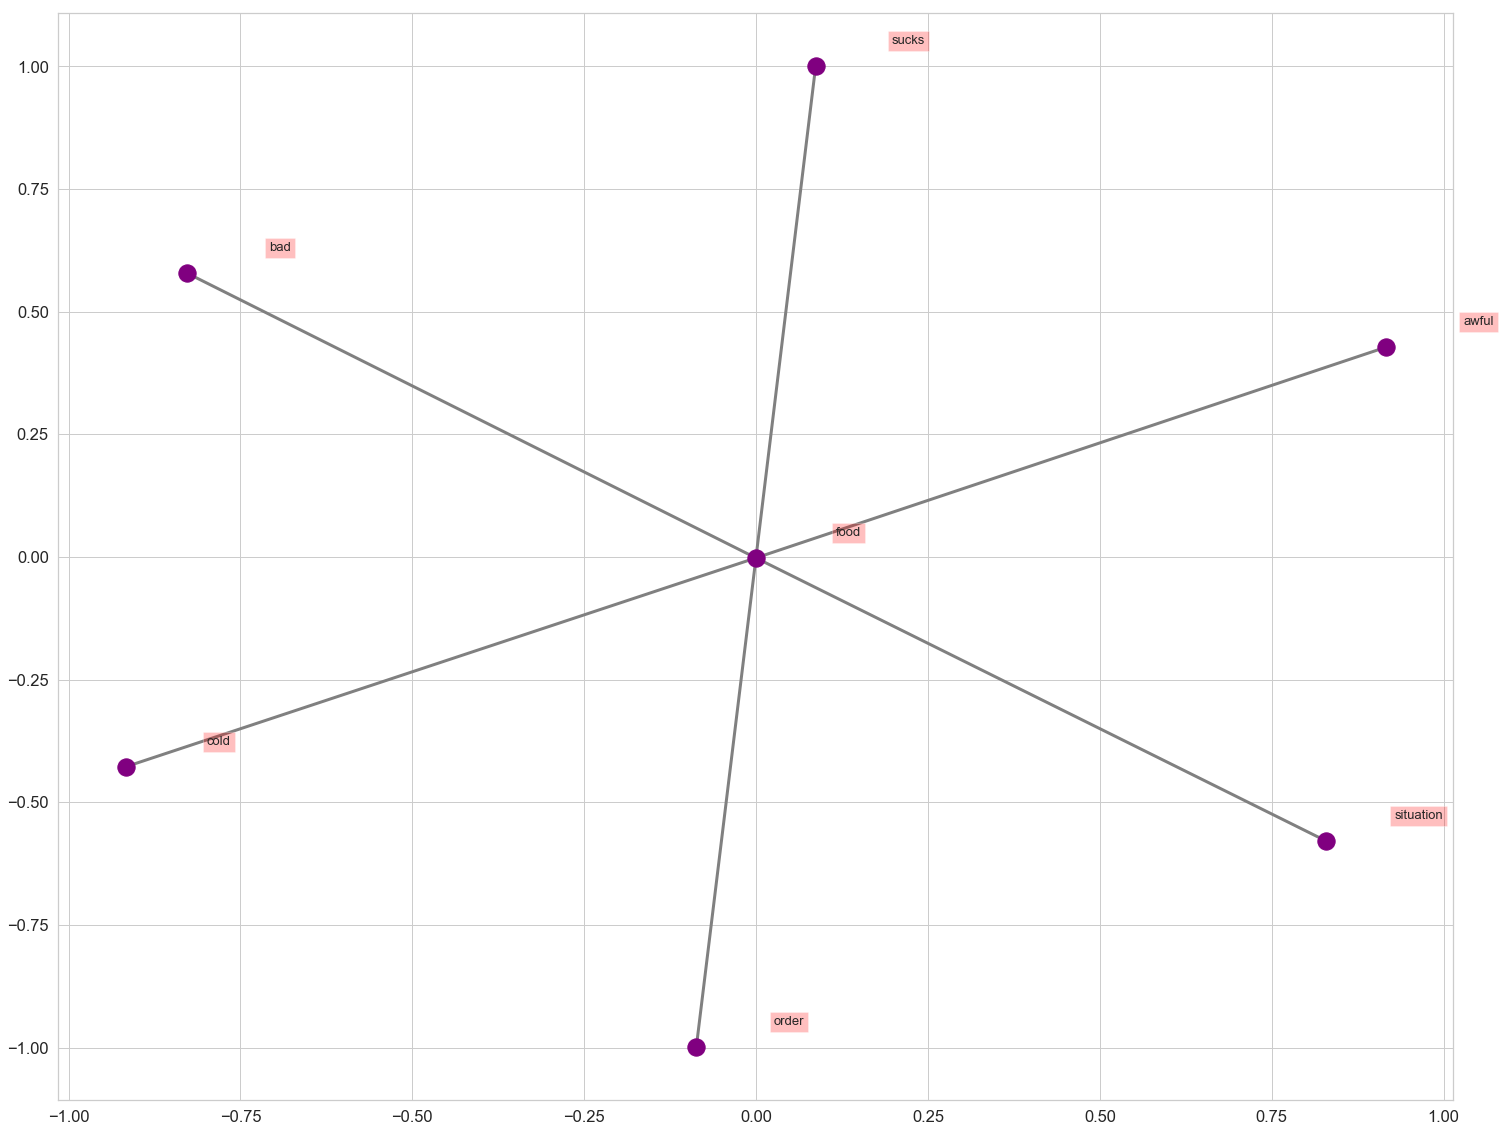

In [387]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(25, 20))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

### plot evolution of ratings per month

In [388]:
mcdo95.sort_values('datePublished', ascending=True, inplace=True)
mcdo95['review_month_year'] = mcdo95.datePublished.apply(lambda x : x[:7])

In [389]:
mcdo95.review_month_year.unique()

array(['2012-08', '2014-05', '2014-08', '2014-11', '2015-01', '2015-06',
       '2015-09', '2016-03', '2016-04', '2016-09', '2016-12', '2017-01',
       '2017-12', '2018-04', '2018-06', '2018-09', '2019-02', '2019-04',
       '2019-08', '2019-10'], dtype=object)

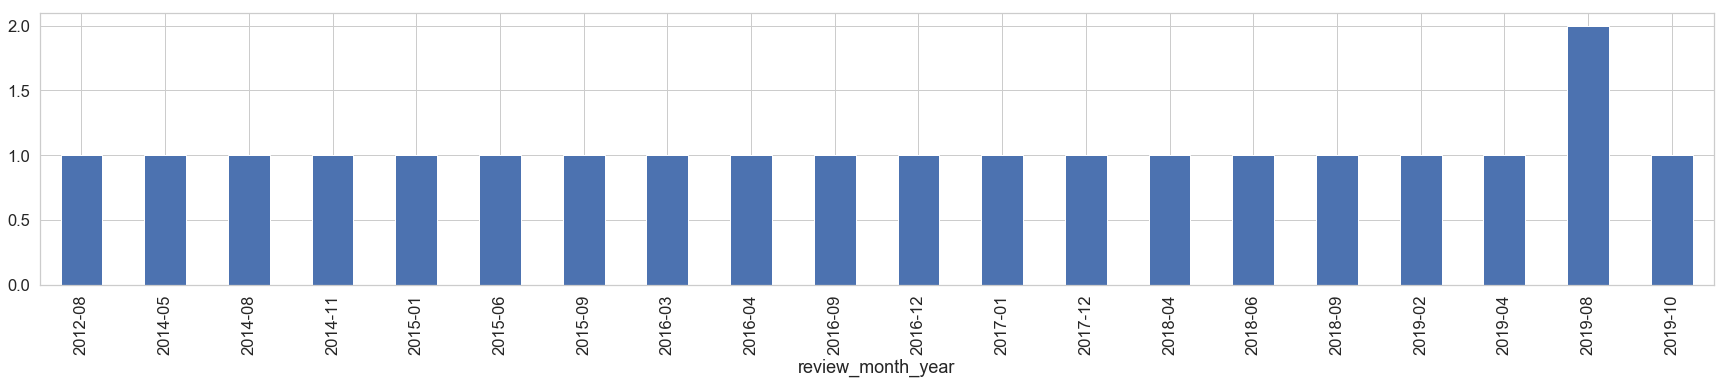

In [390]:
plt.figure(figsize=(30,5))
mcdo95.groupby('review_month_year')['rating'].count().plot(kind='bar')

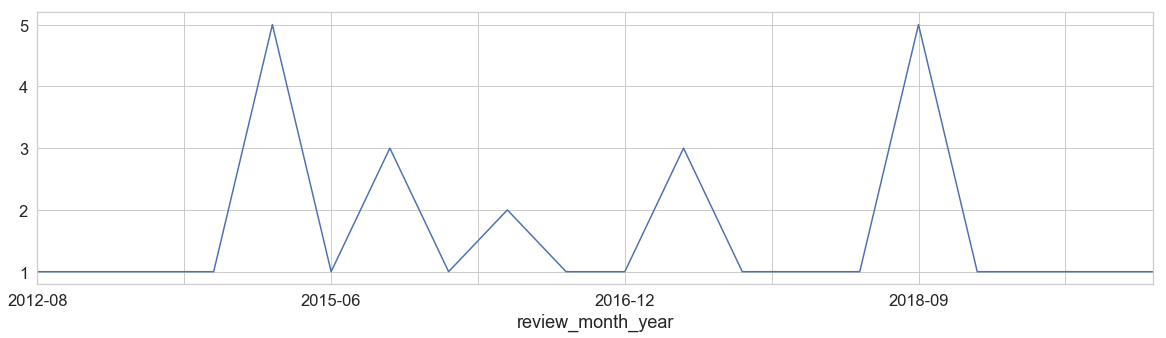

In [391]:
plt.figure(figsize=(20,5))
mcdo95.groupby('review_month_year')['rating'].mean().plot()

## giordanos-chicago-19

In [400]:
reviews.alias.unique()

array(['shaws-crab-house-chicago', "Giordano's", 'ghareeb-nawaz-chicago',
       'ginos-east-magnificent-mile-chicago',
       'iyanze-restaurant-bar-and-cafe-chicago-2', 'chilis-too-chicago-3',
       'dominos-pizza-chicago-22', 'mcdonalds-chicago-70',
       'mcdonalds-chicago-95', 'mcdonalds-chicago-19',
       'chipotle-mexican-grill-chicago-29', 'giordanos-chicago-19'],
      dtype=object)

In [401]:
giordanos19 = reviews[reviews['alias'] == "giordanos-chicago-19"]
giordanos19.head()

datePublished                                        description  \
8574    2019-12-01  Nice restaurant. Plenty of TVs. Nice bar area....   
8575    2019-09-01  0/10 \n\nNEVER order online. Their system brea...   
8576    2019-08-03  Oh Chicago, oh Chicago!\n\nI have had a many o...   
8577    2019-09-27  Our first deep dish of the trip and we patient...   
8578    2019-12-11  We were in a rush to get to a 7:30 show.  We s...   

          author                 alias  rating  \
8574    Steve B.  giordanos-chicago-19       4   
8575   Andrew M.  giordanos-chicago-19       1   
8576  Matthew L.  giordanos-chicago-19       5   
8577   Denise L.  giordanos-chicago-19       4   
8578      Tom N.  giordanos-chicago-19       5   

                                   description_filtered  
8574  nice restaurant plenty tvs nice bar area avera...  
8575  never order online system breaks drops order h...  
8576  oh chicago oh chicago many pizzas many places ...  
8577  first deep dish trip patiently waited minutes ...  
8578  rush get show sat prior order pizza food order...

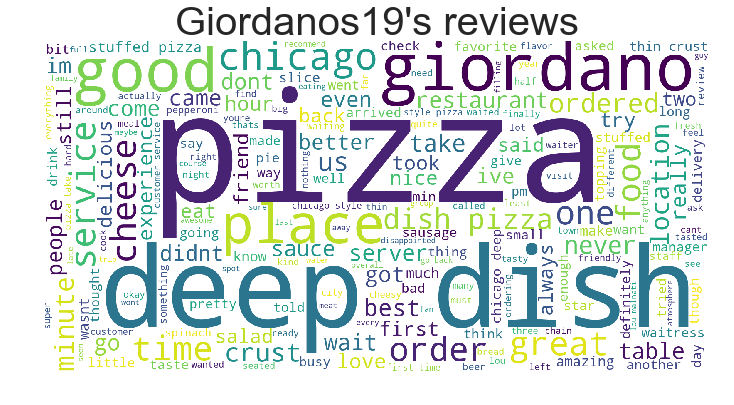

In [404]:
wc = WordCloud(background_color="white",width=1600, height=800, random_state=1, max_words=200)
# Join all strings together from the filtered description column to obtain all review text for the restaurant
wc.generate(' '.join(giordanos19['description_filtered']))


plt.figure(figsize=(15,10))
# Add title to figure
plt.title("Giordanos19's reviews", fontsize=40)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=10)

In [405]:
# We get the 20 most occuring words over the reviews. 

# Pass the split_it list to instance of Counter class. 
splitted = giordanos19['description_filtered'].apply(lambda x: x.split()).to_list()
flatten = [item for sublist in splitted for item in sublist]
counter = Counter(flatten) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = counter.most_common(20) 
most_occur

[('pizza', 975),
 ('deep', 358),
 ('dish', 347),
 ('chicago', 305),
 ('giordanos', 277),
 ('good', 268),
 ('service', 214),
 ('time', 210),
 ('crust', 186),
 ('cheese', 183),
 ('place', 181),
 ('minutes', 172),
 ('like', 167),
 ('would', 166),
 ('us', 165),
 ('order', 157),
 ('great', 156),
 ('food', 155),
 ('one', 154),
 ('get', 147)]

In [406]:
#Now we add a column which has the sentiment values of the each review posted for BBQ Supply Co, to see how the 
#author of this review feels about the restaurant.

#Create Text Blob Object and draw out the sentiment of each review by returning a value between -1.0 (extreme negative) 
#and 1.0 (extreme positive).
giordanos19['sentiment_analysis'] = giordanos19['description_filtered'].apply(lambda x: TextBlob(x).sentiment.polarity)
giordanos19 = giordanos19.sort_values(by='sentiment_analysis', ascending=True)
giordanos19[:10]

datePublished                                        description  \
8705    2018-08-10  Absolutely the worst service I've ever had fro...   
8796    2016-12-04  Don't even try to message the people from Gior...   
8760    2017-07-29  Terrible service. Ordered delivery and was est...   
8820    2015-01-10  Worst service ever. I'm 10 minutes down the ro...   
8712    2018-01-01  Used to be our go-to, but unfortunately keep h...   
8691    2017-10-22  The worst Giordanos I have ever had! We ordere...   
8628    2019-04-23  Terrible customer service. When we asked about...   
8677    2018-06-24  Awful. Waited for a table only to have to flag...   
8985    2013-06-23  We dined at this location late night on June 2...   
8954    2015-08-15  Terrible.  Never gave us silverware, finally c...   

          author                 alias  rating  \
8705     Dave F.  giordanos-chicago-19       1   
8796        J R.  giordanos-chicago-19       1   
8760      Ann K.  giordanos-chicago-19       1   
8820    Jerry M.  giordanos-chicago-19       1   
8712   Amanda B.  giordanos-chicago-19       2   
8691      Pat J.  giordanos-chicago-19       1   
8628     Zach S.  giordanos-chicago-19       1   
8677     Dani F.  giordanos-chicago-19       1   
8985     Paul T.  giordanos-chicago-19       1   
8954  chicago u.  giordanos-chicago-19       1   

                                   description_filtered  sentiment_analysis  
8705  absolutely worst service ive ever pizza restau...           -1.000000  
8796  dont even try message people giordanos comment...           -0.700000  
8760  terrible service ordered delivery estimated mi...           -0.533333  
8820  worst service ever im minutes road ordered pm ...           -0.500000  
8712  used goto unfortunately keep problems months a...           -0.500000  
8691  worst giordanos ever ordered deep dish underco...           -0.500000  
8628  terrible customer service asked swapping peppe...           -0.444444  
8677  awful waited table flag someone order drink to...           -0.440000  
8985  dined location late night june ordered skinny ...           -0.437500  
8954  terrible never gave us silverware finally came...           -0.400000

In [407]:
# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in giordanos19[:10]['description_filtered']]

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


In [408]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

[('absolutely', 'worst'),
 ('worst', 'service'),
 ('service', 'ive'),
 ('ive', 'ever'),
 ('ever', 'pizza'),
 ('pizza', 'restaurant'),
 ('restaurant', 'quit'),
 ('quit', 'lying'),
 ('lying', 'us'),
 ('us', 'cant'),
 ('cant', 'deliver'),
 ('deliver', 'promised'),
 ('promised', 'times'),
 ('times', 'shut'),
 ('shut', 'hell'),
 ('hell', 'horrible')]

In [409]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('worst', 'service'), 2),
 (('terrible', 'service'), 2),
 (('still', 'delivery'), 2),
 (('delivery', 'called'), 2),
 (('told', 'would'), 2),
 (('minutes', 'pizza'), 2),
 (('thin', 'crust'), 2),
 (('absolutely', 'worst'), 1),
 (('service', 'ive'), 1),
 (('ive', 'ever'), 1),
 (('ever', 'pizza'), 1),
 (('pizza', 'restaurant'), 1),
 (('restaurant', 'quit'), 1),
 (('quit', 'lying'), 1),
 (('lying', 'us'), 1),
 (('us', 'cant'), 1),
 (('cant', 'deliver'), 1),
 (('deliver', 'promised'), 1),
 (('promised', 'times'), 1),
 (('times', 'shut'), 1)]

bi = []
for i in range(len(bigrams)) :
    if bigrams[i][0] == 'food' or bigrams[i][1] == 'food':
        print(bigrams[i])
        bi.append(bigrams[i])

In [410]:
bi = []
for i in range(len(bigrams)) :
    if (bigrams[i][0] == 'food' and negative_words.negative.str.contains(bigrams[i][1]).any()) or (negative_words.negative.str.contains(bigrams[i][0]).any() and bigrams[i][1] == 'food') or (bigrams[i][0] == 'food' or bigrams[i][1] == 'food'):
        print(bigrams[i])
        bi.append(bigrams[i])

('review', 'food')
('food', 'ever')


In [411]:
bigram_counts = collections.Counter(bi)

In [412]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

bigram  count
0  (review, food)      1
1    (food, ever)      1

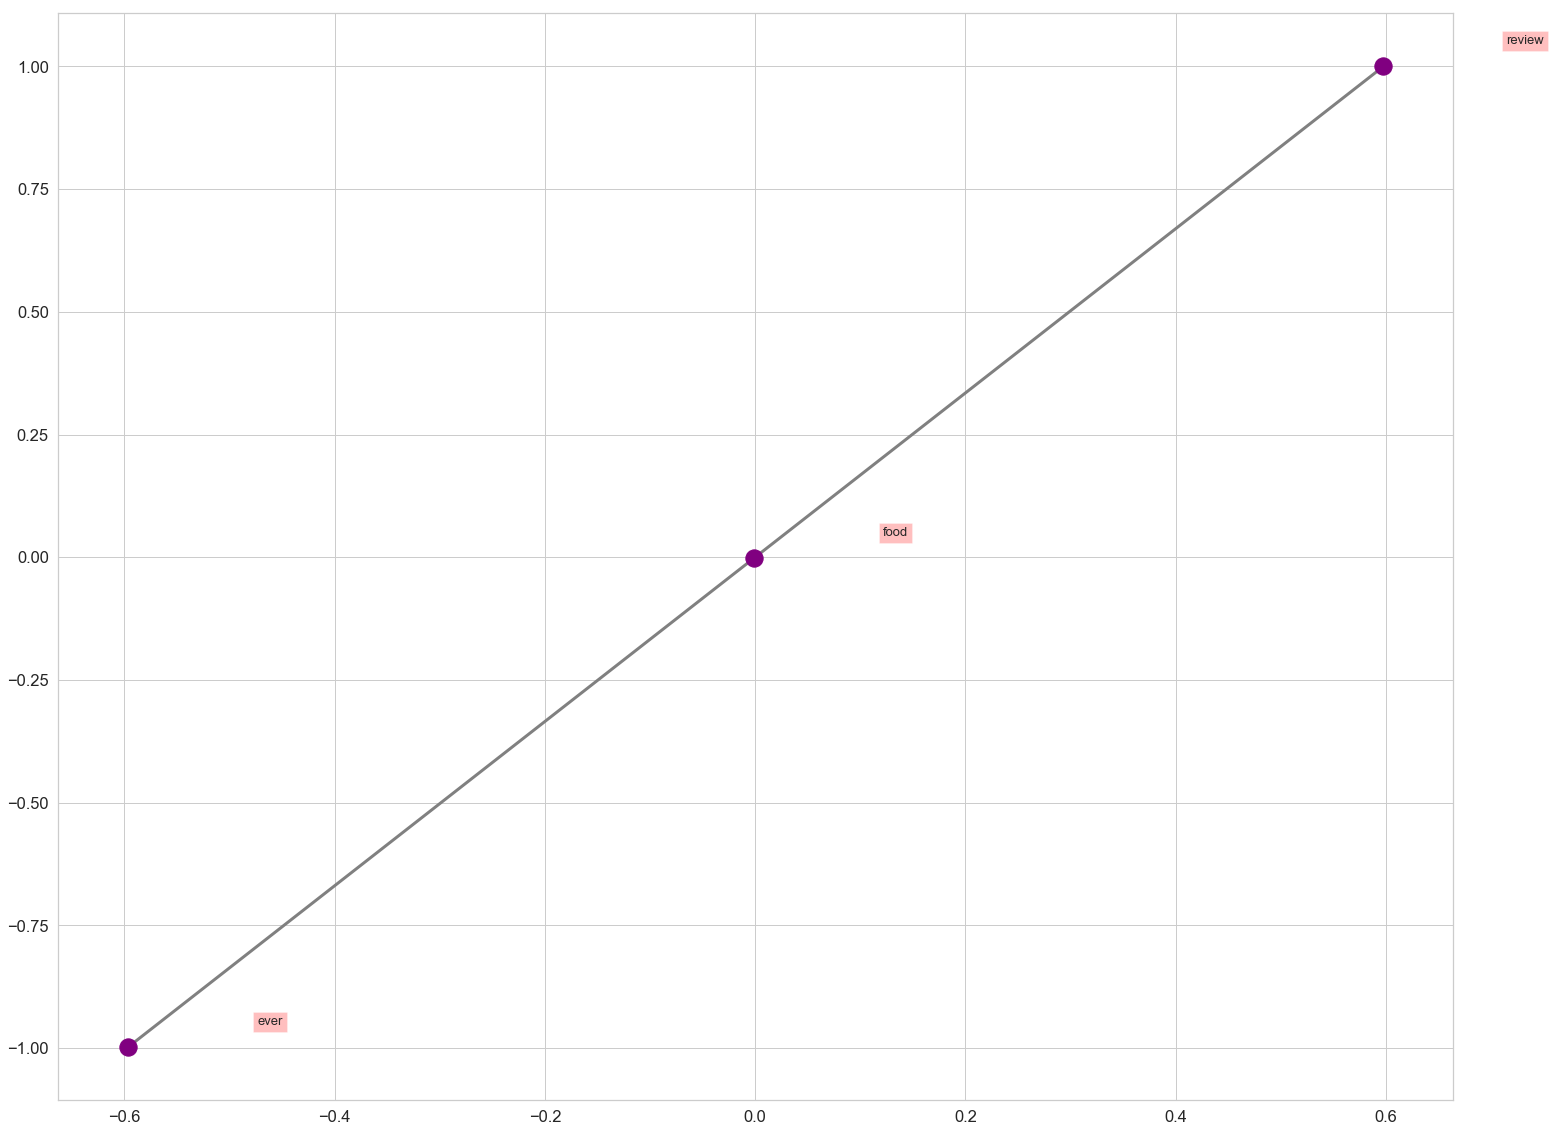

In [413]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(25, 20))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

### plot evolution of ratings per month

In [677]:
giordanos19.sort_values('datePublished', ascending=True, inplace=True)
giordanos19['review_month_year'] = giordanos19.datePublished.apply(lambda x : x[:7])

In [678]:
giordanos19.review_month_year.unique()

array(['2005-09', '2005-10', '2005-11', '2005-12', '2006-03', '2006-07',
       '2006-08', '2006-10', '2006-11', '2007-01', '2007-02', '2007-03',
       '2007-04', '2007-05', '2007-06', '2007-07', '2007-09', '2007-10',
       '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06',
       '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12',
       '2009-01', '2009-02', '2009-04', '2009-05', '2009-06', '2009-07',
       '2009-08', '2009-09', '2009-10', '2009-11', '2010-01', '2010-02',
       '2010-04', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10',
       '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04',
       '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10',
       '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04',
       '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10',
       '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04',
       '2013-05', '2013-06', '2013-07', '2013-08', 

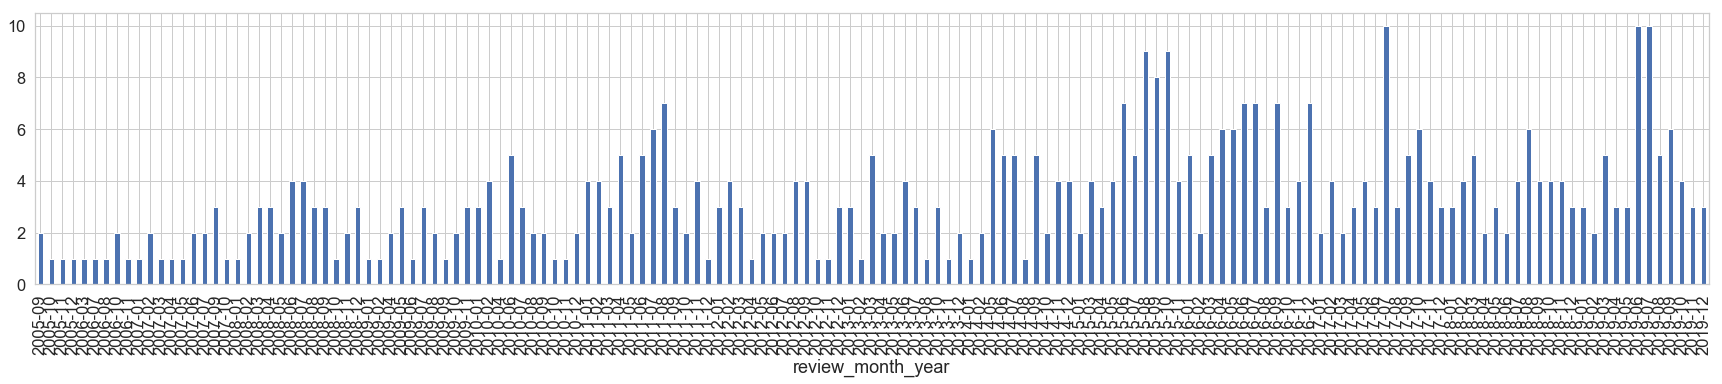

In [679]:
plt.figure(figsize=(30,5))
giordanos19.groupby('review_month_year')['rating'].count().plot(kind='bar')

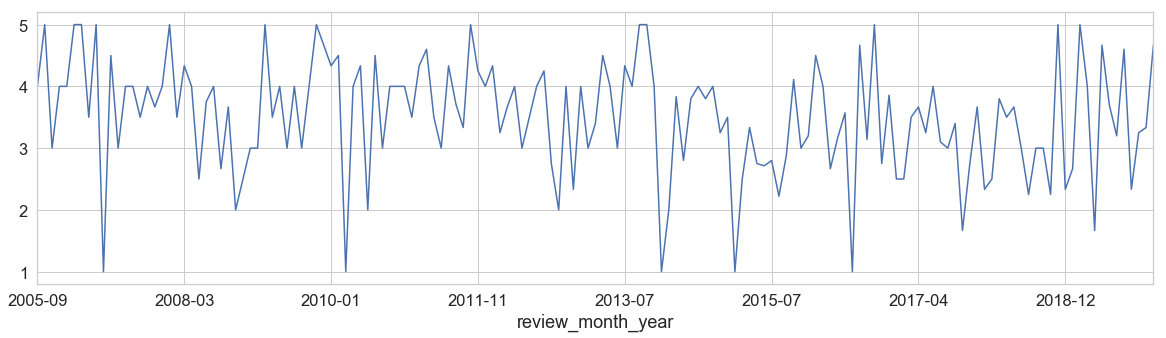

In [680]:
plt.figure(figsize=(20,5))
giordanos19.groupby('review_month_year')['rating'].mean().plot()

### Adding inspection dates to the plot

In [681]:
giordanos19_inspections = pd.read_csv('giordanos_Belomont.csv').drop(columns = 'Unnamed: 0')
giordanos19_inspections.head()

Inspection ID                   DBA Name   AKA Name  License #  \
0         176272  giordanos enterprises inc  Giordanos    16301.0   
1         176461  giordanos enterprises inc  Giordanos    16301.0   
2         250550  giordanos enterprises inc  Giordanos    16301.0   
3        1138287  giordanos enterprises inc  Giordanos    16301.0   
4        1229703       giordanos on belmont  Giordanos  2138485.0   

  Facility Type           Risk                  Address      Zip  \
0    restaurant  Risk 1 (High)       1040 W BELMONT AVE  60657.0   
1    restaurant  Risk 1 (High)       1040 W BELMONT AVE  60657.0   
2    restaurant  Risk 1 (High)       1040 W BELMONT AVE  60657.0   
3    restaurant  Risk 1 (High)       1040 W BELMONT AVE  60657.0   
4    restaurant  Risk 1 (High)  1036-1040 W BELMONT AVE  60657.0   

  Inspection Date Inspection Type  ...  \
0      2010-02-17         canvass  ...   
1      2010-03-02    consultation  ...   
2      2010-06-03  food poisoning  ...   
3      2012-05-18         canvass  ...   
4      2012-06-19         license  ...   

                                     Violation title  \
0  ['FOOD PROTECTED DURING STORAGE, PREPARATION, ...   
1  ['CLEAN MULTI-USE UTENSILS AND SINGLE SERVICE ...   
2  ['POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATURE...   
3  ['FOOD (ICE) DISPENSING UTENSILS, WASH CLOTHS ...   
4  ['CLEAN MULTI-USE UTENSILS AND SINGLE SERVICE ...   

                                  Violation comments  Violation score minor  \
0  ['All food should be properly protected from c...                      2   
1  ['VIOLATION WAS CDI ON 2/17/10.', 'All food an...                      2   
2  ['All cold food shall be stored at a temperatu...                      2   
3  ['INSIDE OF ICE MAKER NOT CLEAN. INSTRUCTED TO...                      1   
4  ['TABLE TOP CAN OPENER MUST BE CLEANED AFTER E...                      4   

   Violation score serious Violation score critical  Risk number  \
0                        1                        0            1   
1                        0                        0            1   
2                        0                        1            1   
3                        0                        0            1   
4                        0                        0            1   

      Inspection Type exact   Fail   Pass Pass w/ Conditions  
0                   Canvass  False  False               True  
1              Consultation  False  False               True  
2  Suspected Food Poisoning  False  False               True  
3                   Canvass  False   True              False  
4        License-Task Force  False   True              False  

[5 rows x 29 columns]

In [682]:
giordanos19_inspections['inspection_month_year'] = giordanos19_inspections['Inspection Date'].apply(lambda x : x[:7]) 
giordanos19_inspections.head()

Inspection ID                   DBA Name   AKA Name  License #  \
0         176272  giordanos enterprises inc  Giordanos    16301.0   
1         176461  giordanos enterprises inc  Giordanos    16301.0   
2         250550  giordanos enterprises inc  Giordanos    16301.0   
3        1138287  giordanos enterprises inc  Giordanos    16301.0   
4        1229703       giordanos on belmont  Giordanos  2138485.0   

  Facility Type           Risk                  Address      Zip  \
0    restaurant  Risk 1 (High)       1040 W BELMONT AVE  60657.0   
1    restaurant  Risk 1 (High)       1040 W BELMONT AVE  60657.0   
2    restaurant  Risk 1 (High)       1040 W BELMONT AVE  60657.0   
3    restaurant  Risk 1 (High)       1040 W BELMONT AVE  60657.0   
4    restaurant  Risk 1 (High)  1036-1040 W BELMONT AVE  60657.0   

  Inspection Date Inspection Type  ...  \
0      2010-02-17         canvass  ...   
1      2010-03-02    consultation  ...   
2      2010-06-03  food poisoning  ...   
3      2012-05-18         canvass  ...   
4      2012-06-19         license  ...   

                                  Violation comments Violation score minor  \
0  ['All food should be properly protected from c...                     2   
1  ['VIOLATION WAS CDI ON 2/17/10.', 'All food an...                     2   
2  ['All cold food shall be stored at a temperatu...                     2   
3  ['INSIDE OF ICE MAKER NOT CLEAN. INSTRUCTED TO...                     1   
4  ['TABLE TOP CAN OPENER MUST BE CLEANED AFTER E...                     4   

   Violation score serious  Violation score critical Risk number  \
0                        1                         0           1   
1                        0                         0           1   
2                        0                         1           1   
3                        0                         0           1   
4                        0                         0           1   

      Inspection Type exact   Fail   Pass Pass w/ Conditions  \
0                   Canvass  False  False               True   
1              Consultation  False  False               True   
2  Suspected Food Poisoning  False  False               True   
3                   Canvass  False   True              False   
4        License-Task Force  False   True              False   

  inspection_month_year  
0               2010-02  
1               2010-03  
2               2010-06  
3               2012-05  
4               2012-06  

[5 rows x 30 columns]

In [683]:
giordanos19_inspections.sort_values('Inspection Date', ascending=True, inplace=True)
giordanos19_inspections['inspection_month_year'] = giordanos19_inspections['Inspection Date'].apply(lambda x : x[:7]) 
#convert strings to datetimes
#giordanos19_inspections['inspection_month_year'] = giordanos19_inspections['inspection_month_year'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m")) 
#giordanos19_inspections.head()

In [684]:
giordanos19_inspections1 = giordanos19_inspections[['Inspection ID','inspection_month_year', 'Inspection Type exact', 'Fail', 'Pass', 'Pass w/ Conditions' ]]
giordanos19_inspections1.head()

Inspection ID inspection_month_year     Inspection Type exact   Fail  \
0         176272               2010-02                   Canvass  False   
1         176461               2010-03              Consultation  False   
2         250550               2010-06  Suspected Food Poisoning  False   
3        1138287               2012-05                   Canvass  False   
4        1229703               2012-06        License-Task Force  False   

    Pass  Pass w/ Conditions  
0  False                True  
1  False                True  
2  False                True  
3   True               False  
4   True               False

In [685]:
insp_types = giordanos19_inspections1.groupby(['inspection_month_year'])['Inspection Type exact'].apply(lambda x: ','.join(x)).reset_index()
insp_types.head()

inspection_month_year                      Inspection Type exact
0               2010-02                                    Canvass
1               2010-03                               Consultation
2               2010-06                   Suspected Food Poisoning
3               2012-05                                    Canvass
4               2012-06  License-Task Force,Task Force Liquor 1475

In [686]:
from matplotlib.pyplot import text

In [694]:
giordanos191 = pd.DataFrame(giordanos19.groupby('review_month_year')['rating'].mean())
giordanos191.reset_index(inplace=True)
giordanos191.head()

review_month_year  rating
0           2005-09     4.0
1           2005-10     5.0
2           2005-11     3.0
3           2005-12     4.0
4           2006-03     4.0

In [695]:
giordanos191 = giordanos191[giordanos191.review_month_year >= '2009-11']
giordanos191.head()

review_month_year    rating
39           2009-11  4.666667
40           2010-01  4.333333
41           2010-02  4.500000
42           2010-04  1.000000
43           2010-06  4.000000

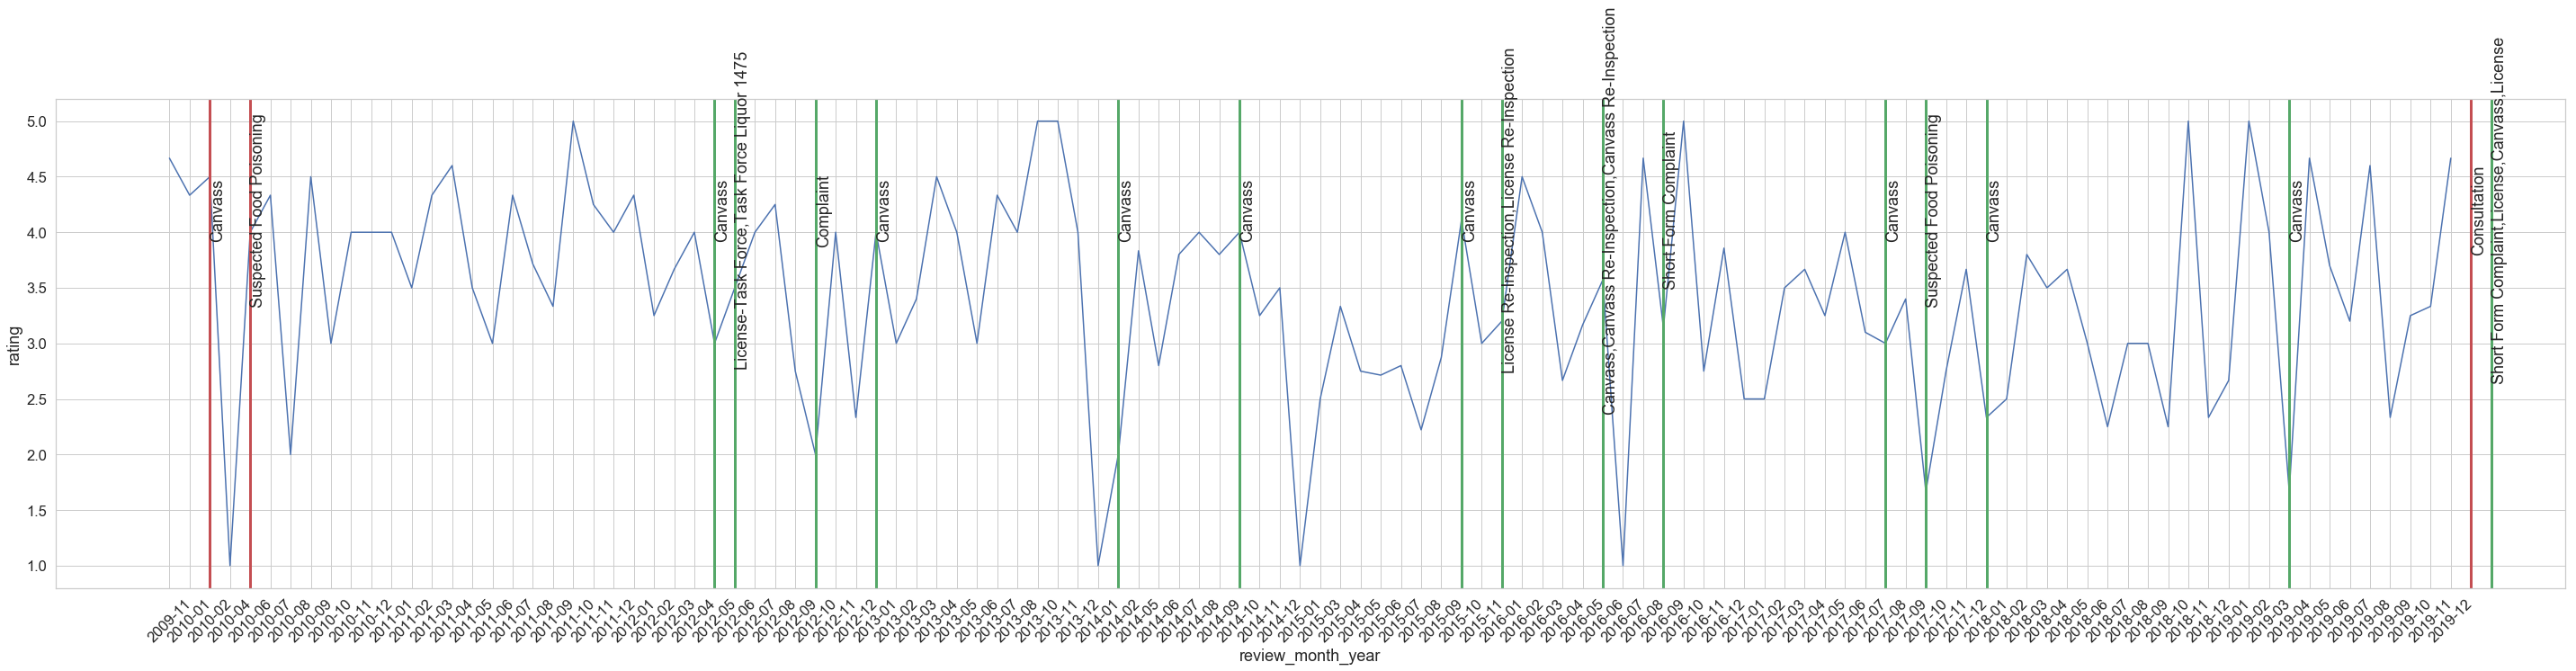

In [706]:
plt.figure(figsize=(50,10))
ax = sns.lineplot(x="review_month_year", y="rating", data=giordanos191)
ax.set_xticklabels(giordanos191.review_month_year.values.tolist(), rotation=45)
for index, row in giordanos19_inspections1.iterrows():
    
    if row.Pass == True :
        color = 'g'
    elif row.Fail == True :
        color == 'r'
    elif row['Pass w/ Conditions'] == True : 
        color = 'r'
        
    plt.axvline(x=row['inspection_month_year'], color=color, linestyle='-', linewidth=3)
    
for index, row in insp_types.iterrows():
    text(row['inspection_month_year'], 4.2, row['Inspection Type exact'], rotation=90, verticalalignment='center')
plt.savefig('plot_giordanos.png')